In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib, os
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *
import pandas as pd
pd.set_option('precision', 4)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_1/',
              model_directory+'/irv/stage_1/',
              model_directory+'/neural_networks/stage_1/',
              model_directory+'/docking/stage_1/']
k = 5

In [2]:
#setup gather matrix
gather_df = gather_dir_metrics(class_dirs[0], k)     
gather_df = gather_df.append(gather_dir_metrics(class_dirs[1], k))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[2], 20))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[3], k))

gather_df = gather_df.dropna(axis=0)

col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149)) + list(range(150, 183))
col_indices = [i for i in col_indices if 'Mean' not in gather_df.columns[i] and 'Median' not in gather_df.columns[i]]
metric_names = list(gather_df.columns.values[col_indices])

#setup comparison matrix and overlaps
dtk_dict = dtk_multi_metrics(gather_df)
dtk_analysis_dict = analyze_dtk_dict(dtk_dict)
mm_comp_dicts = get_mean_median_comps(gather_df)
agg_comp_dict = get_agg_comp(mm_comp_dicts, dtk_analysis_dict, mean_w=0, median_w=0, tukey_w=1)
overlapping_models = get_overlap(agg_comp_dict, N=1)

---
## Model Ordering by Metric (Best-to-Worst)
Shows table with model-winscore pairs in the cells.

In [3]:
ordered_df = get_model_ordering(agg_comp_dict, metric_names)
ordered_df

ROC AUC PriA-SSB AS               ROC AUC PriA-SSB FP               ROC AUC RMI-FANCM FP             BEDROC AUC PriA-SSB AS            BEDROC AUC PriA-SSB FP            BEDROC AUC RMI-FANCM FP       PR auc.integral PriA-SSB AS       PR auc.integral PriA-SSB FP      PR auc.integral RMI-FANCM FP              NEF_0.1 % PriA-SSB AS             NEF_0.1 % PriA-SSB FP            NEF_0.1 % RMI-FANCM FP             NEF_0.15 % PriA-SSB AS            NEF_0.15 % PriA-SSB FP           NEF_0.15 % RMI-FANCM FP              NEF_0.5 % PriA-SSB AS             NEF_0.5 % PriA-SSB FP             NEF_0.5 % RMI-FANCM FP                NEF_1 % PriA-SSB AS               NEF_1 % PriA-SSB FP               NEF_1 % RMI-FANCM FP                NEF_2 % PriA-SSB AS               NEF_2 % PriA-SSB FP               NEF_2 % RMI-FANCM FP                NEF_5 % PriA-SSB AS               NEF_5 % PriA-SSB FP               NEF_5 % RMI-FANCM FP               NEF_10 % PriA-SSB AS  \
0                 RandomForest_d, 1.0           SingleRegression_a, 1.0                RandomForest_a, 1.0            SingleRegression_b, 1.0           SingleRegression_b, 1.0                         IRV_d, 1.0       SingleClassification_b, 1.0           SingleRegression_b, 1.0       SingleClassification_b, 1.0        SingleClassification_b, 1.0           SingleRegression_b, 1.0           SingleRegression_b, 1.0                         IRV_e, 1.0           SingleRegression_b, 1.0                        IRV_a, 1.0        SingleClassification_a, 1.0           SingleRegression_b, 1.0        SingleClassification_b, 1.0                RandomForest_h, 1.0           SingleRegression_b, 1.0        SingleClassification_b, 1.0                RandomForest_h, 1.0           SingleRegression_a, 1.0        SingleClassification_a, 1.0            SingleRegression_b, 1.0           SingleRegression_a, 1.0                RandomForest_h, 1.0            SingleRegression_b, 1.0   
1                 RandomForest_h, 2.0           SingleRegression_b, 2.0                RandomForest_h, 1.0                RandomForest_c, 1.0           SingleRegression_a, 2.0                RandomForest_e, 1.0       SingleClassification_a, 1.0               Docking_hybrid, 2.0       SingleClassification_a, 1.0        SingleClassification_a, 1.0               Docking_hybrid, 1.0                        IRV_a, 1.0        SingleClassification_b, 1.0               Docking_hybrid, 1.0           SingleRegression_b, 2.0                RandomForest_h, 2.0               Docking_hybrid, 2.0        SingleClassification_a, 1.0        SingleClassification_a, 2.0           SingleRegression_a, 1.0        SingleClassification_a, 1.0        SingleClassification_a, 2.0                        IRV_e, 2.0                RandomForest_h, 1.0                RandomForest_b, 1.0           SingleRegression_b, 2.0                RandomForest_g, 1.0                RandomForest_c, 1.0   
2                 RandomForest_e, 2.0                        IRV_e, 3.0                RandomForest_g, 1.0                         IRV_b, 1.0                        IRV_e, 3.0         MultiClassification_b, 1.0        MultiClassification_a, 1.0                        IRV_a, 2.0        MultiClassification_b, 3.0         MultiClassification_b, 3.0                        IRV_a, 1.0       SingleClassification_a, 3.0        SingleClassification_a, 1.0                        IRV_a, 1.0       SingleClassification_b, 3.0            SingleRegression_b, 3.0                        IRV_a, 2.0                RandomForest_f, 1.0            SingleRegression_b, 3.0         ConsensusDocking_max, 3.0                RandomForest_h, 1.0            SingleRegression_b, 3.0           SingleRegression_b, 3.0                RandomForest_f, 1.0                         IRV_b, 1.0         ConsensusDocking_max, 3.0                RandomForest_e, 3.0            SingleRegression_a, 1.0   
3             SingleRegression_b, 4.0               RandomForest_h, 3.0                RandomForest_e, 1.0            SingleRe

---
## Metrics Most Similar to N-Hits

In [4]:
get_similar_to_nhits(agg_comp_dict, metric_names[:-21], metric_names[-21:])

n_hits_100 PriA-SSB AS                             n_hits_100 PriA-SSB FP n_hits_100 RMI-FANCM FP                             n_hits_250 PriA-SSB AS                             n_hits_250 PriA-SSB FP n_hits_250 RMI-FANCM FP                            n_hits_500 PriA-SSB AS                             n_hits_500 PriA-SSB FP n_hits_500 RMI-FANCM FP                            n_hits_1000 PriA-SSB AS                            n_hits_1000 PriA-SSB FP n_hits_1000 RMI-FANCM FP                 n_hits_2500 PriA-SSB AS                            n_hits_2500 PriA-SSB FP  n_hits_2500 RMI-FANCM FP                 n_hits_5000 PriA-SSB AS                            n_hits_5000 PriA-SSB FP n_hits_5000 RMI-FANCM FP n_hits_10000 PriA-SSB AS                           n_hits_10000 PriA-SSB FP                          n_hits_10000 RMI-FANCM FP
0                                  NEF_0.5 %, NEF_1 %  BEDROC AUC, PR auc.integral, NEF_0.1 %, NEF_0....                 NEF_1 %  BEDROC AUC, NEF_0.15 %, NEF_1 %, NEF_2 %, NEF_...  ROC AUC, NEF_0.1 %, NEF_0.15 %, NEF_1 %, NEF_2...                 NEF_2 %                                           NEF_1 %  ROC AUC, BEDROC AUC, PR auc.integral, NEF_0.1 ...                 NEF_5 %  ROC AUC, BEDROC AUC, PR auc.integral, NEF_0.1 ...  BEDROC AUC, PR auc.integral, NEF_0.1 %, NEF_0....        NEF_10 %, NEF AUC  BEDROC AUC, NEF_5 %, NEF_10 %, NEF AUC  ROC AUC, NEF_0.1 %, NEF_0.15 %, NEF_1 %, NEF_5...                  NEF_20 %  BEDROC AUC, NEF_5 %, NEF_10 %, NEF AUC  PR auc.integral, NEF_0.1 %, NEF_0.15 %, NEF_0....                 NEF_20 %                  NEF_5 %  ROC AUC, NEF_0.1 %, NEF_0.15 %, NEF_1 %, NEF_2...  ROC AUC, BEDROC AUC, PR auc.integral, NEF_0.1 ...
1   BEDROC AUC, NEF_0.15 %, NEF_2 %, NEF_5 %, NEF AUC                                   ROC AUC, NEF_5 %         PR auc.integral                                          NEF_0.5 %  BEDROC AUC, PR auc.integral, NEF_0.5 %, NEF_10...         PR auc.integral  BEDROC AUC, NEF_0.5 %, NEF_2 %, NEF_5 %, NEF AUC                                            NEF_2 %         PR auc.integral                              NEF_0.15 %, NEF_0.5 %                                   ROC AUC, NEF_5 %               BEDROC AUC                                NEF_20 %  BEDROC AUC, PR auc.integral, NEF_0.5 %, NEF_2 ...                   NEF AUC                                NEF_20 %                      BEDROC AUC, NEF_5 %, NEF_20 %                  NEF AUC      BEDROC AUC, NEF AUC   BEDROC AUC, PR auc.integral, NEF_0.5 %, NEF_10 %                                                   
2                                            NEF_10 %                                            NEF_2 %              NEF_0.15 %                                    PR auc.integral                                                           NEF_1 %, NEF_5 %                                          NEF_10 %                                                                 BEDROC AUC                                                                                               NEF_2 %                 NEF_20 %                        NEF_1 %, NEF_2 %                                                                      ROC AUC                        NEF_1 %, NEF_2 %                                   ROC AUC, NEF_2 %                 NEF_10 %       NEF_0.5 %, NEF_1 %                                                                                                      
3                                     PR auc.integral                                                                  NEF_0.1 %                                NEF_0.1 %, NEF_20 %                                                                 BEDROC AUC                                   PR auc.integral                                                                   NEF_10 %                                                                                                                        ROC AUC              PR auc.integral, NEF_0.5 %                 

---
## Overlapping top N models over all metrics

In [5]:
get_overlap(agg_comp_dict, N=1)

overlap_perc
RandomForest_h                     0.5435
SingleRegression_b                 0.2826
SingleClassification_a             0.2717
RandomForest_e                     0.2391
RandomForest_d                     0.2391
SingleClassification_b             0.2391
RandomForest_g                     0.2174
IRV_e                              0.2174
SingleRegression_a                 0.2174
MultiClassification_b              0.1630
RandomForest_f                     0.1630
RandomForest_a                     0.1522
RandomForest_b                     0.1522
RandomForest_c                     0.1304
IRV_d                              0.1196
MultiClassification_a              0.1087
IRV_a                              0.0870
IRV_b                              0.0870
IRV_c                              0.0761
Docking_rdocktot                   0.0326
Docking_fred                       0.0326
ConsensusDocking_max               0.0326
Docking_hybrid                     0.0326
ConsensusDocking_mean              0.0326
Docking_plants                     0.0326
Docking_surflex                    0.0326
Docking_smina                      0.0326
Docking_rdockint                   0.0326
ConsensusDocking_median            0.0326
Docking_dock6                      0.0326
LSTM_b                             0.0326
LSTM_a                             0.0326
ConsensusDocking_rocauc_opt        0.0326
ConsensusDocking_efr1_opt          0.0326
Docking_ad4                        0.0326

In [6]:
get_overlap(agg_comp_dict, N=5)

overlap_perc
RandomForest_h                     0.8804
RandomForest_g                     0.8261
RandomForest_d                     0.8043
RandomForest_e                     0.7935
RandomForest_b                     0.7174
RandomForest_c                     0.7174
RandomForest_a                     0.7174
SingleClassification_a             0.6304
MultiClassification_b              0.6196
IRV_e                              0.6196
SingleClassification_b             0.5870
SingleRegression_b                 0.5543
RandomForest_f                     0.5543
IRV_d                              0.4891
MultiClassification_a              0.4457
SingleRegression_a                 0.4348
IRV_b                              0.4130
IRV_c                              0.3913
IRV_a                              0.3804
Docking_rdockint                   0.2391
ConsensusDocking_median            0.2391
ConsensusDocking_max               0.2391
ConsensusDocking_rocauc_opt        0.2391
ConsensusDocking_mean              0.2391
Docking_hybrid                     0.2391
Docking_plants                     0.2391
Docking_fred                       0.2391
Docking_rdocktot                   0.2391
LSTM_a                             0.2391
Docking_smina                      0.2391
LSTM_b                             0.2391
Docking_dock6                      0.2391
Docking_surflex                    0.2391
ConsensusDocking_efr1_opt          0.2391
Docking_ad4                        0.2391

## Spearman's Rank-order correlation coefficient 

In [7]:
spearman_df, ordered_spearman_df = get_spearman_r(agg_comp_dict, metric_names[:-21], metric_names[-21:])

In [8]:
ordered_spearman_df

n_hits_100 PriA-SSB AS n_hits_100 PriA-SSB FP n_hits_100 RMI-FANCM FP n_hits_250 PriA-SSB AS n_hits_250 PriA-SSB FP n_hits_250 RMI-FANCM FP n_hits_500 PriA-SSB AS n_hits_500 PriA-SSB FP n_hits_500 RMI-FANCM FP n_hits_1000 PriA-SSB AS n_hits_1000 PriA-SSB FP n_hits_1000 RMI-FANCM FP n_hits_2500 PriA-SSB AS n_hits_2500 PriA-SSB FP n_hits_2500 RMI-FANCM FP n_hits_5000 PriA-SSB AS n_hits_5000 PriA-SSB FP n_hits_5000 RMI-FANCM FP n_hits_10000 PriA-SSB AS n_hits_10000 PriA-SSB FP n_hits_10000 RMI-FANCM FP
0               NEF_0.5 %              NEF_0.5 %                 NEF_1 %                NEF_1 %                NEF_2 %                 NEF_5 %              NEF_0.5 %                NEF AUC                 NEF_5 %                 NEF_5 %                NEF_10 %                 NEF_10 %                NEF_20 %                 NEF_5 %                 NEF_20 %                NEF_20 %                NEF_10 %                  NEF AUC                NEF_0.5 %                  NEF_5 %                   ROC AUC
1                 NEF_1 %        PR auc.integral                 NEF_2 %                NEF_2 %             BEDROC AUC                 NEF_2 %                NEF_2 %                NEF_1 %                 NEF_2 %                 NEF_2 %                 NEF AUC                  NEF AUC                NEF_10 %                 NEF AUC                  NEF AUC                 ROC AUC                 NEF AUC                 NEF_20 %                  NEF_5 %                  NEF AUC                BEDROC AUC
2                 NEF_2 %               NEF_10 %                 NEF_5 %              NEF_0.5 %                ROC AUC                 NEF_1 %                NEF AUC               NEF_10 %              BEDROC AUC                 NEF AUC                 NEF_1 %               BEDROC AUC                 NEF AUC                 NEF_1 %                 NEF_10 %                NEF_10 %                 NEF_1 %                  ROC AUC                  NEF AUC                  NEF_1 %           PR auc.integral
3                 NEF_5 %                NEF AUC               NEF_0.5 %                NEF_5 %                NEF_5 %               NEF_0.5 %             BEDROC AUC                NEF_5 %                NEF_10 %              BEDROC AUC                 NEF_5 %                 NEF_20 %              BEDROC AUC                NEF_10 %               BEDROC AUC                 NEF AUC                 NEF_5 %                 NEF_10 %               BEDROC AUC                 NEF_10 %                 NEF_0.1 %
4              NEF_0.15 %                NEF_1 %              BEDROC AUC                NEF AUC                NEF AUC              BEDROC AUC                NEF_5 %               NEF_20 %                 NEF AUC                NEF_10 %              BEDROC AUC                  NEF_5 %                 ROC AUC                NEF_20 %                  ROC AUC              BEDROC AUC              BEDROC AUC               BEDROC AUC               NEF_0.15 %                  NEF_2 %                NEF_0.15 %
5                 NEF AUC                NEF_5 %                NEF_10 %             BEDROC AUC                NEF_1 %                NEF_10 %                NEF_1 %             BEDROC AUC               NEF_0.5 %                 NEF_1 %                NEF_20 %                  ROC AUC                 NEF_5 %              BEDROC AUC                  NEF_2 %                 NEF_5 %                NEF_20 %                  NEF_2 %                  NEF_1 %                 NEF_20 %                 NEF_0.5 %
6              BEDROC AUC             BEDROC AUC                 NEF AUC             NEF_0.15 %               NEF_10 %                 NEF AUC               NEF_10 %                NEF_2 %                 NEF_1 %               NEF_0.5 %                 NEF_2 %                  NEF_2 %                 NEF_2 %                 NEF_2 %                  NEF_5 %                 NEF_2 %                 NEF_2 %                  NEF_5 %                

In [9]:
spearman_df

n_hits_100 PriA-SSB AS  n_hits_100 PriA-SSB FP  n_hits_100 RMI-FANCM FP  n_hits_250 PriA-SSB AS  n_hits_250 PriA-SSB FP  n_hits_250 RMI-FANCM FP  n_hits_500 PriA-SSB AS  n_hits_500 PriA-SSB FP  n_hits_500 RMI-FANCM FP  n_hits_1000 PriA-SSB AS  n_hits_1000 PriA-SSB FP  n_hits_1000 RMI-FANCM FP  n_hits_2500 PriA-SSB AS  n_hits_2500 PriA-SSB FP  n_hits_2500 RMI-FANCM FP  n_hits_5000 PriA-SSB AS  n_hits_5000 PriA-SSB FP  n_hits_5000 RMI-FANCM FP  n_hits_10000 PriA-SSB AS  n_hits_10000 PriA-SSB FP  n_hits_10000 RMI-FANCM FP
ROC AUC                          0.8809                  0.4918                   0.7391                  0.8827                  0.8700                   0.8150                  0.9340                  0.7281                   0.8313                   0.9164                   0.7271                    0.9208                   0.9288                   0.7284                    0.8917                   0.9150                   0.4993                    0.7973                    0.7885                    0.5226                        NaN
BEDROC AUC                       0.9251                  0.5944                   0.8275                  0.9395                  0.9979                   0.9036                  0.9613                  0.8282                   0.9011                   0.9744                   0.8285                    0.9672                   0.9414                   0.8271                    0.8966                   0.8584                   0.5862                    0.7632                    0.8116                    0.5594                        NaN
PR auc.integral                  0.4550                  1.0000                   0.4326                  0.4352                  0.5421                   0.4359                  0.4440                  0.6966                   0.4302                   0.4346                   0.7174                    0.2172                   0.4363                   0.6752                    0.2204                   0.4570                   0.5226                    0.1487                    0.3013                   -0.0294                        NaN
NEF_0.1 %                        0.7653                     NaN                   0.5478                  0.7767                     NaN                   0.4665                  0.7446                     NaN                   0.3854                   0.7991                      NaN                    0.2062                   0.6760                      NaN                    0.1504                   0.5676                      NaN                    0.1130                    0.6034                       NaN                        NaN
NEF_0.15 %                       0.9323                     NaN                   0.4394                  0.9346                     NaN                   0.3307                  0.9058                     NaN                   0.2823                   0.9122                      NaN                    0.1149                   0.7454                      NaN                    0.0003                   0.6441                      NaN                   -0.0401                    0.8062                       NaN                        NaN
NEF_0.5 %                        0.9999                  1.0000                   0.8491                  0.9878                  0.5421                   0.9108                  0.9667                  0.6966                   0.8844                   0.9460                   0.7174                    0.7668                   0.8480                   0.6752                    0.6479                   0.7720                   0.5226                    0.5617                    0.8343                   -0.0294                        NaN
NEF_1 %                          0.9881                  0.6966                   0.9963                  1.0000                  0.8159                   0.9115                  0.9563                  1.0000              

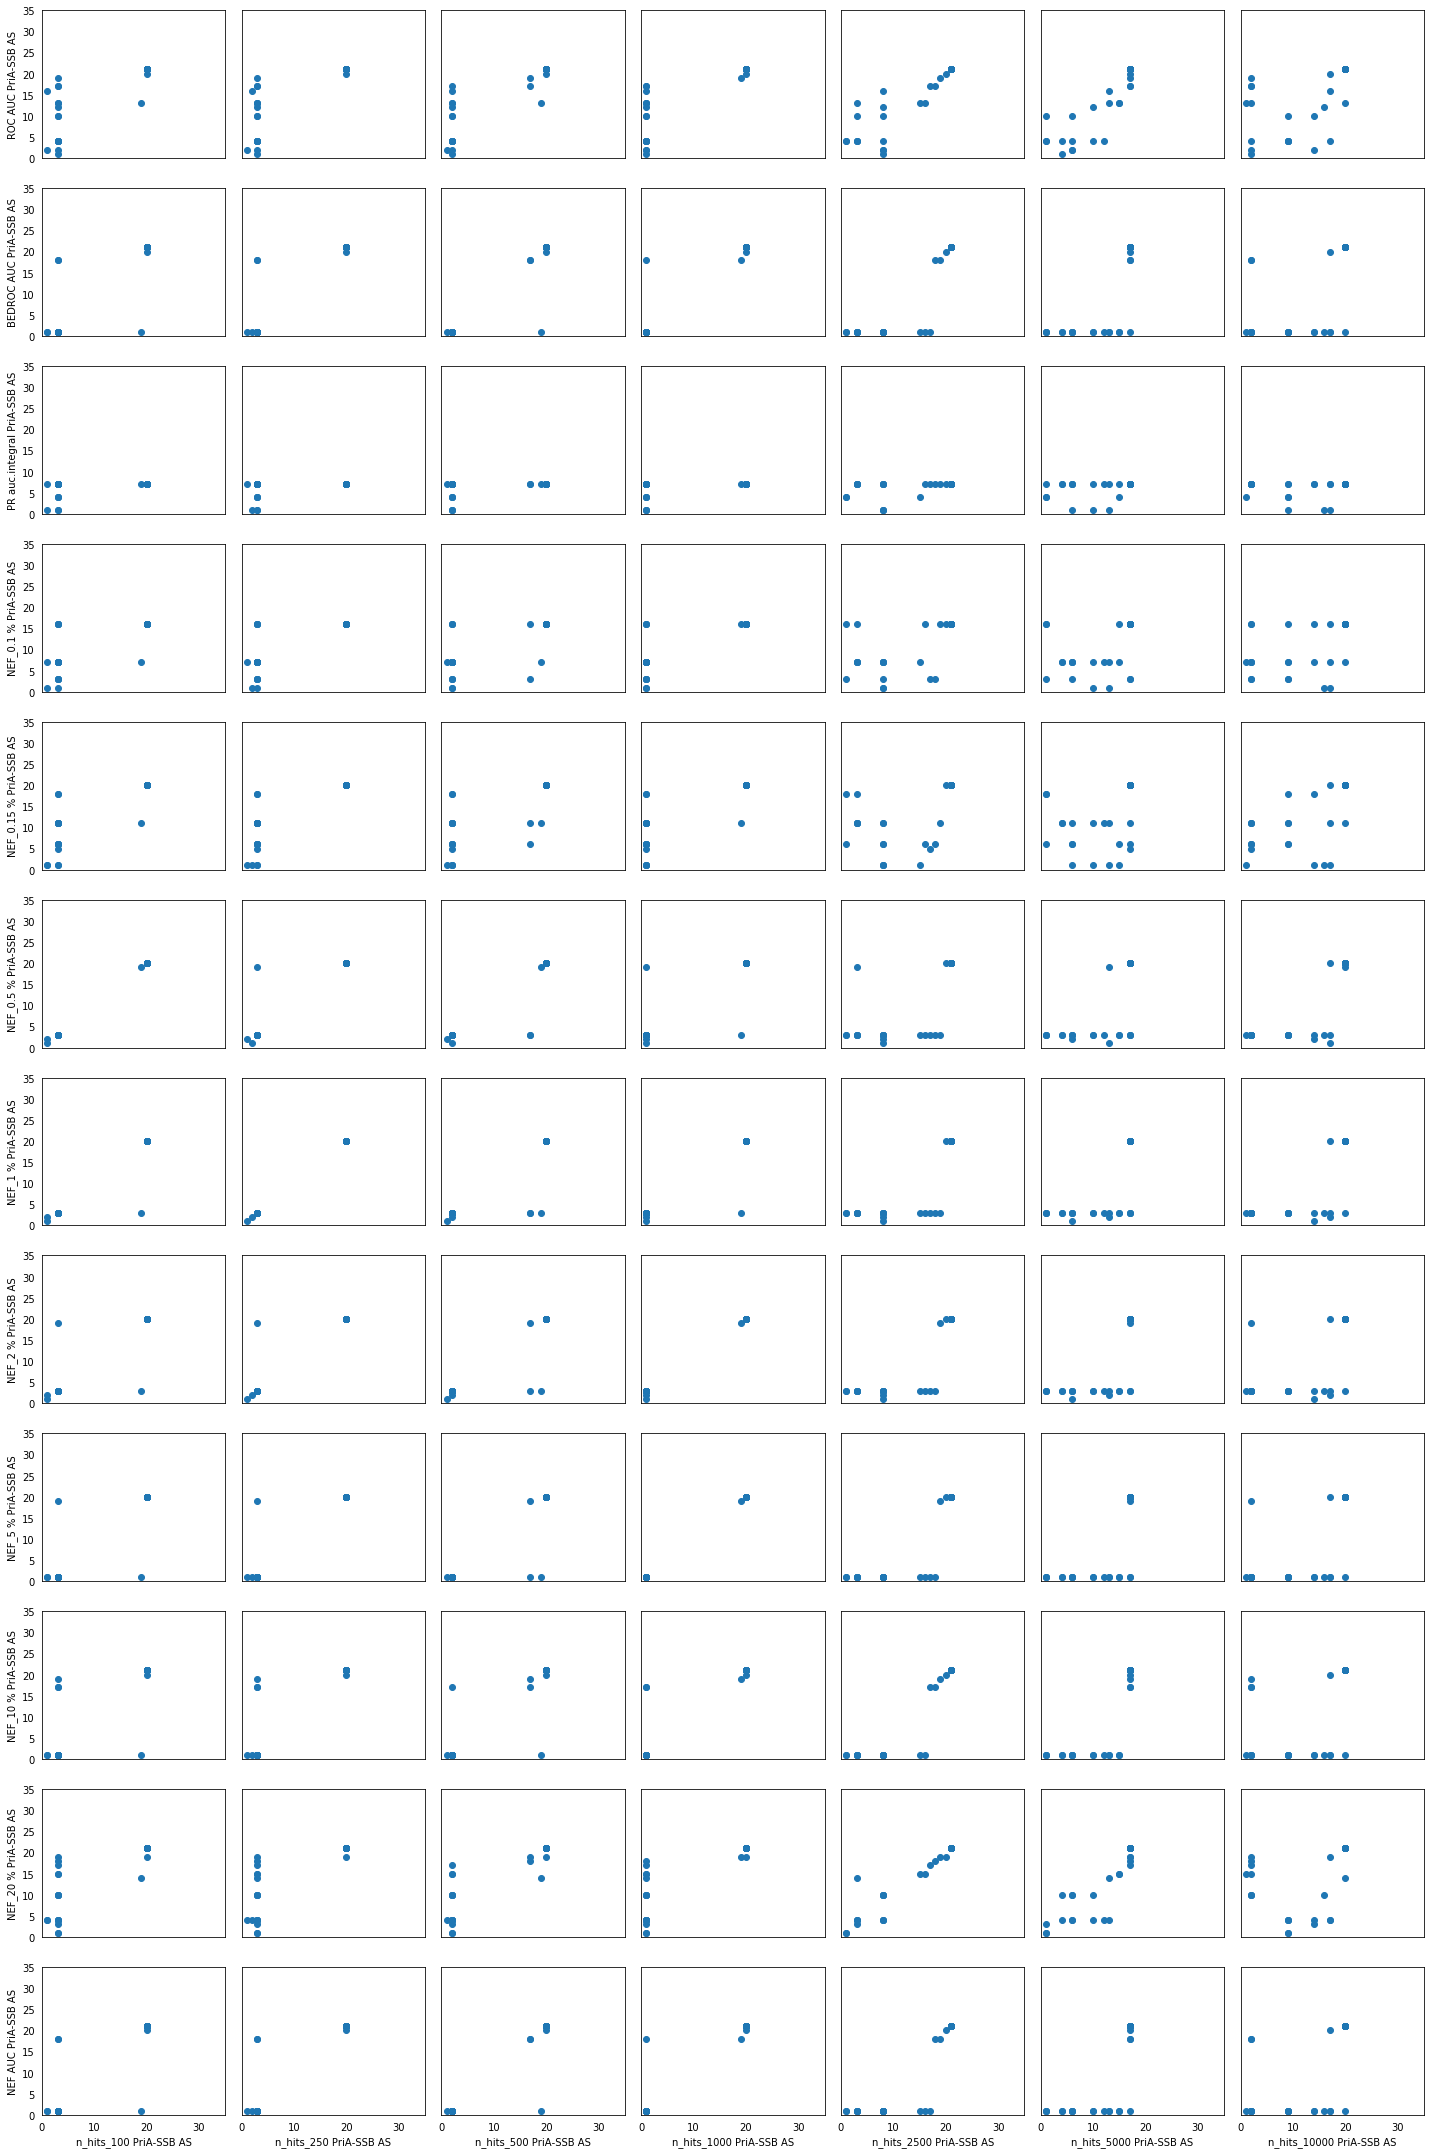

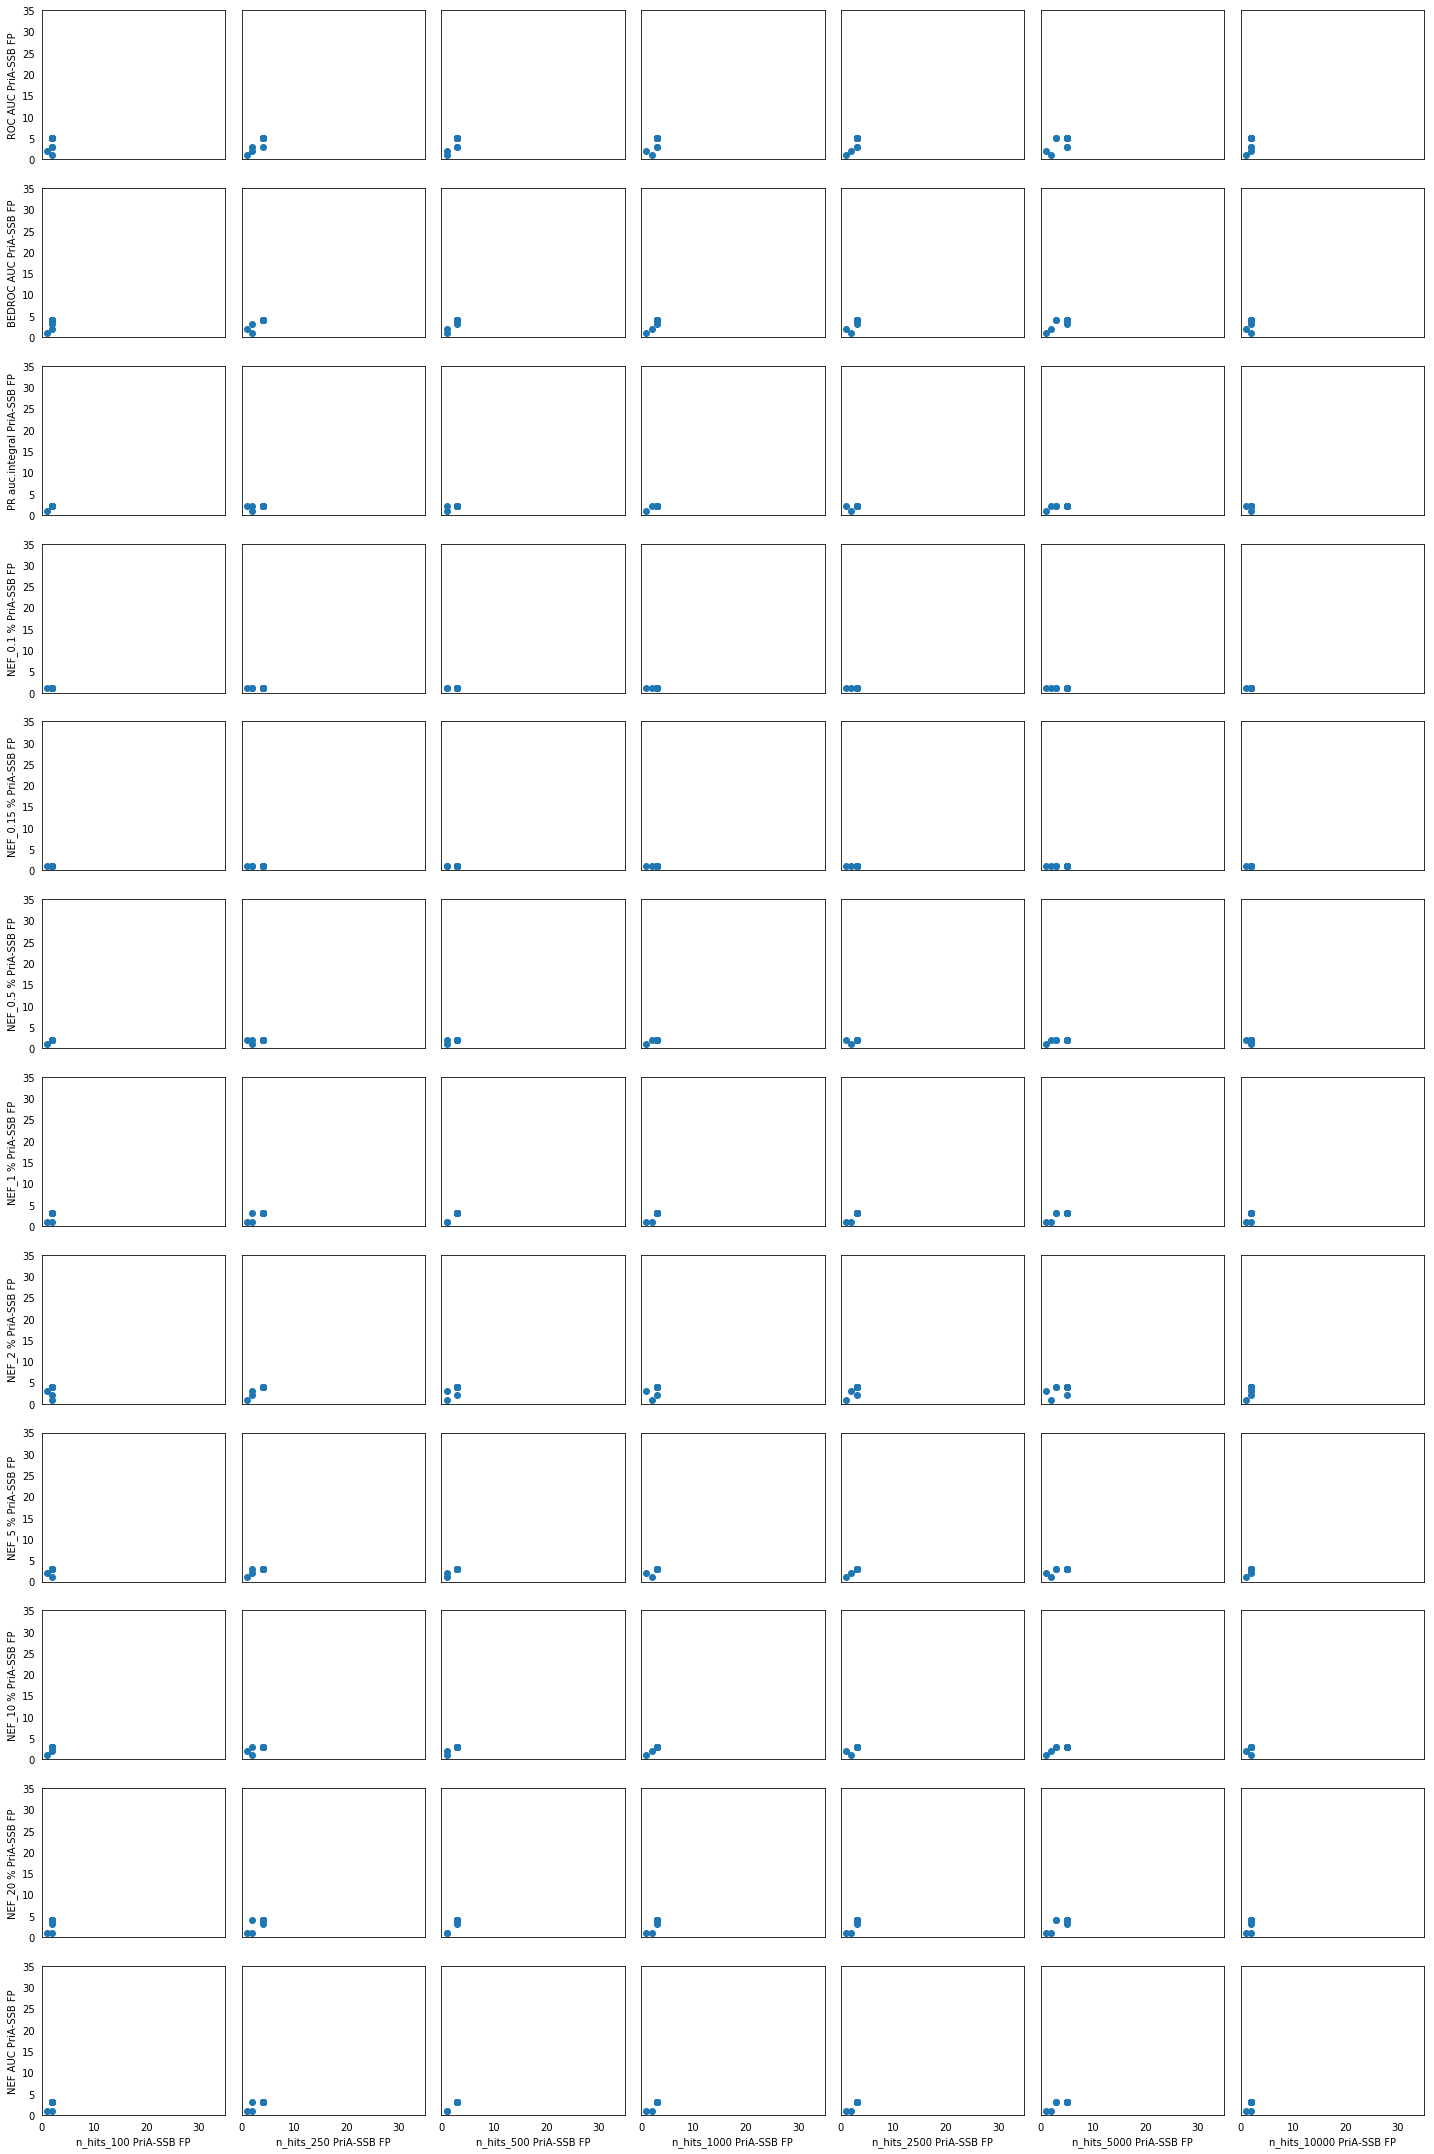

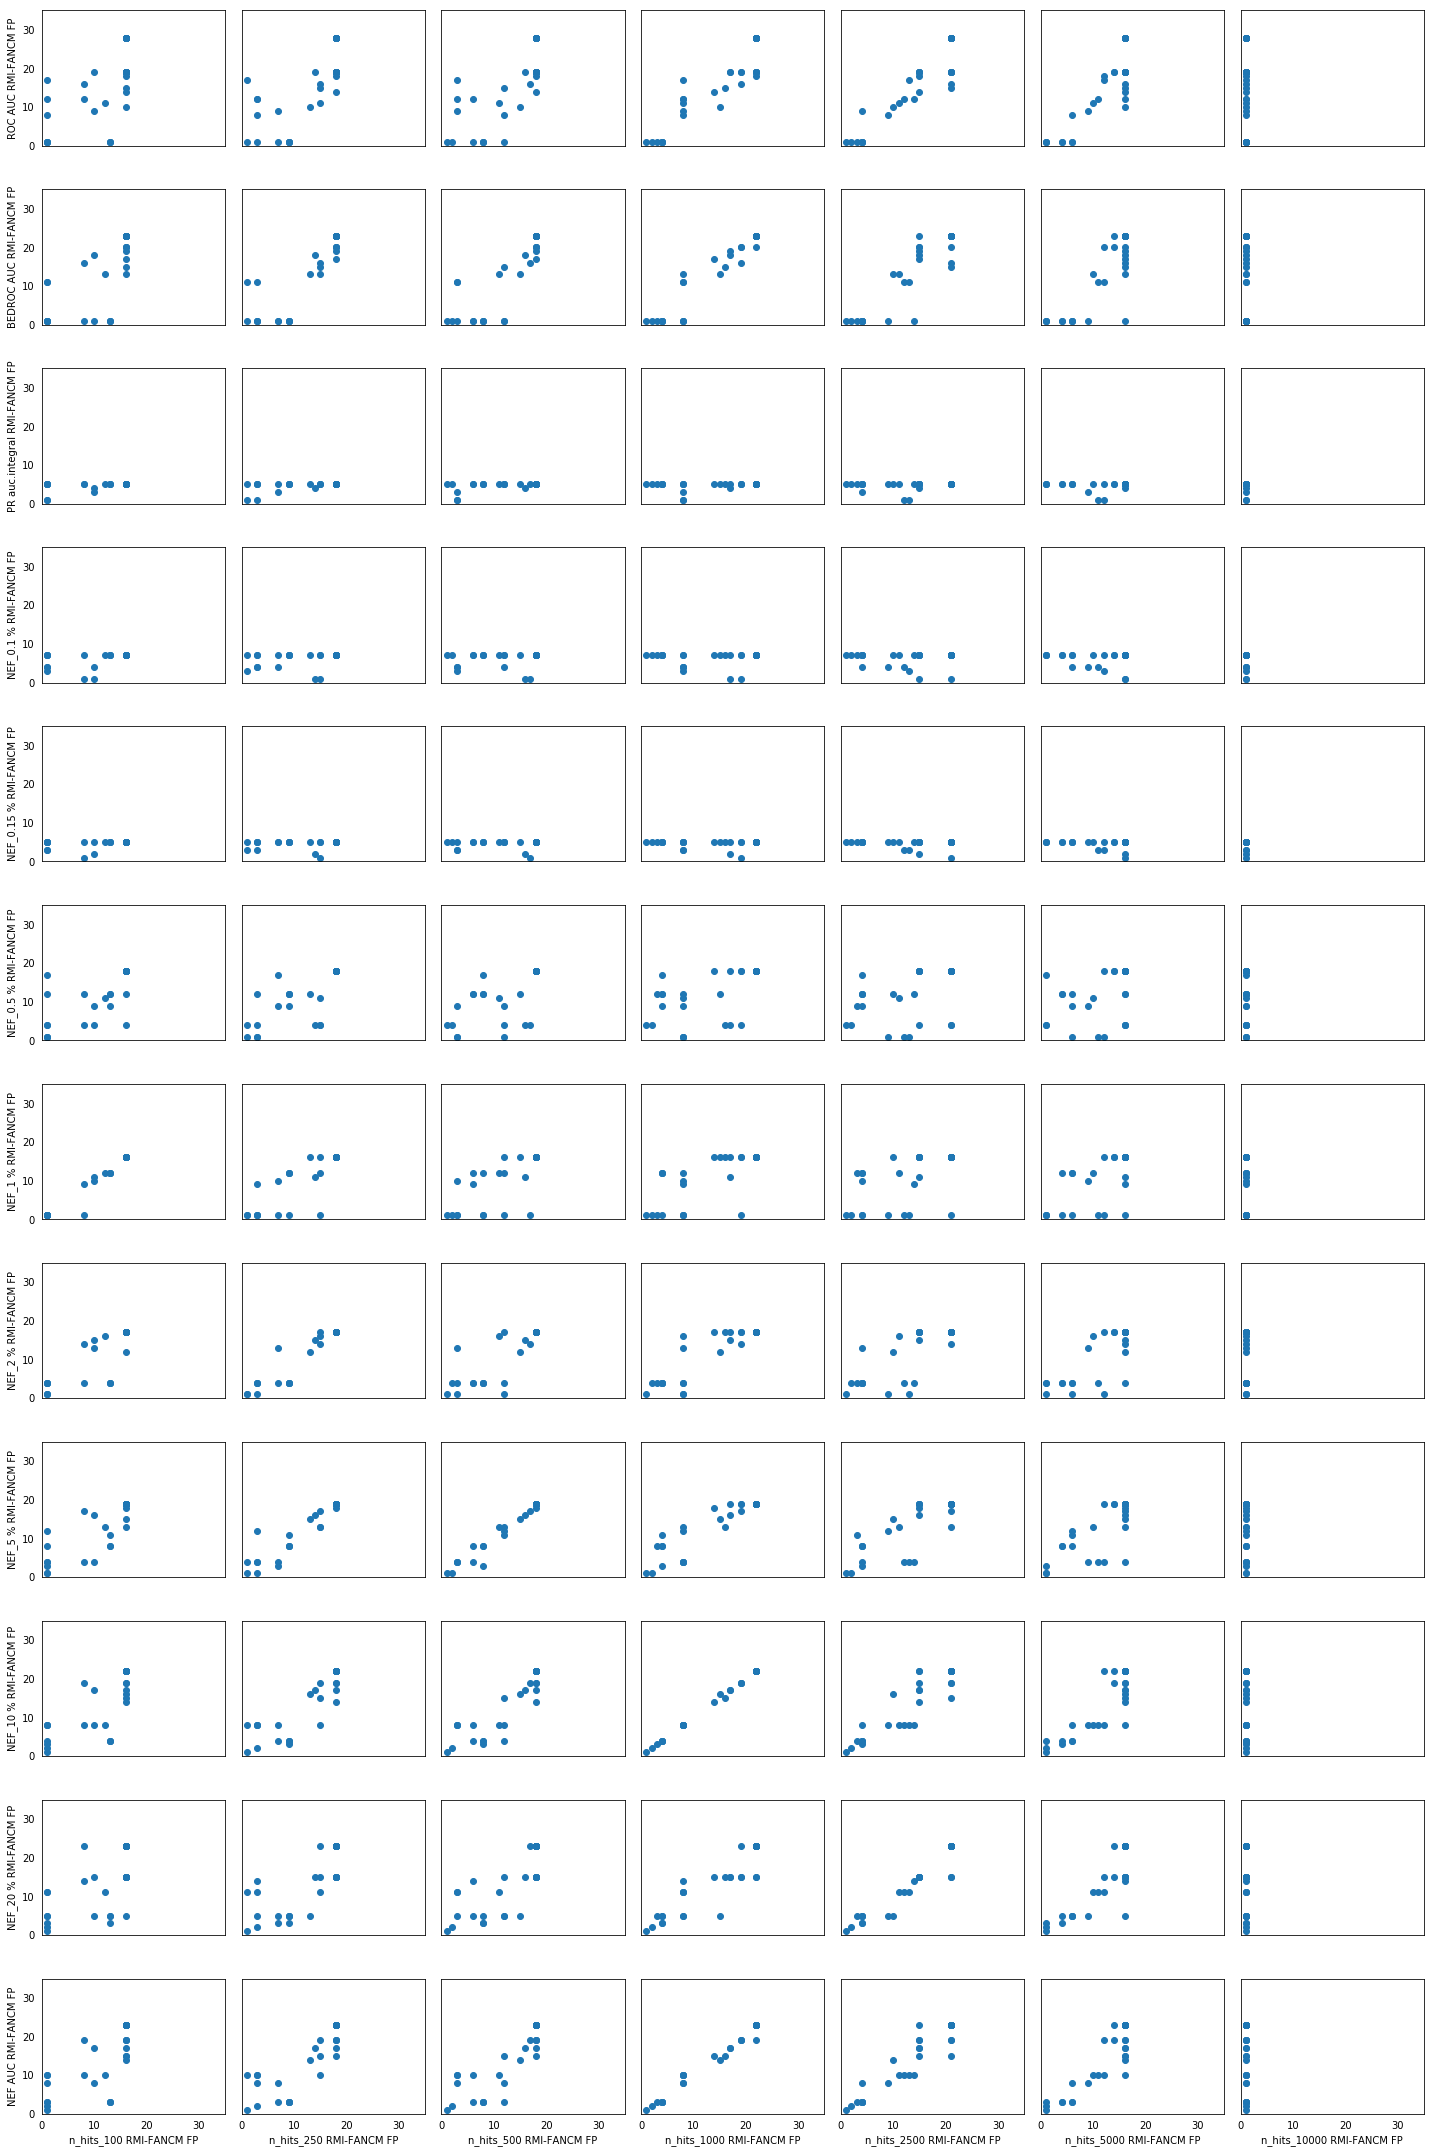

In [10]:
labels=['PriA-SSB AS','PriA-SSB FP','RMI-FANCM']
matplotlib.rcParams.update({'font.size': 10})
for l in labels:
    curr_metrics = [m for m in metric_names[:-21] if l in m]
    curr_hits = [m for m in metric_names[-21:] if l in m]
    file_name = './cv_ps_figures/cv_scatter_plots_nhits/' + l.replace(' ', '_') + '.png'
    plot_scatter_nhits_alt(agg_comp_dict, curr_metrics, curr_hits, file_name, figsize=(20,30))

## Box Plots for all Models

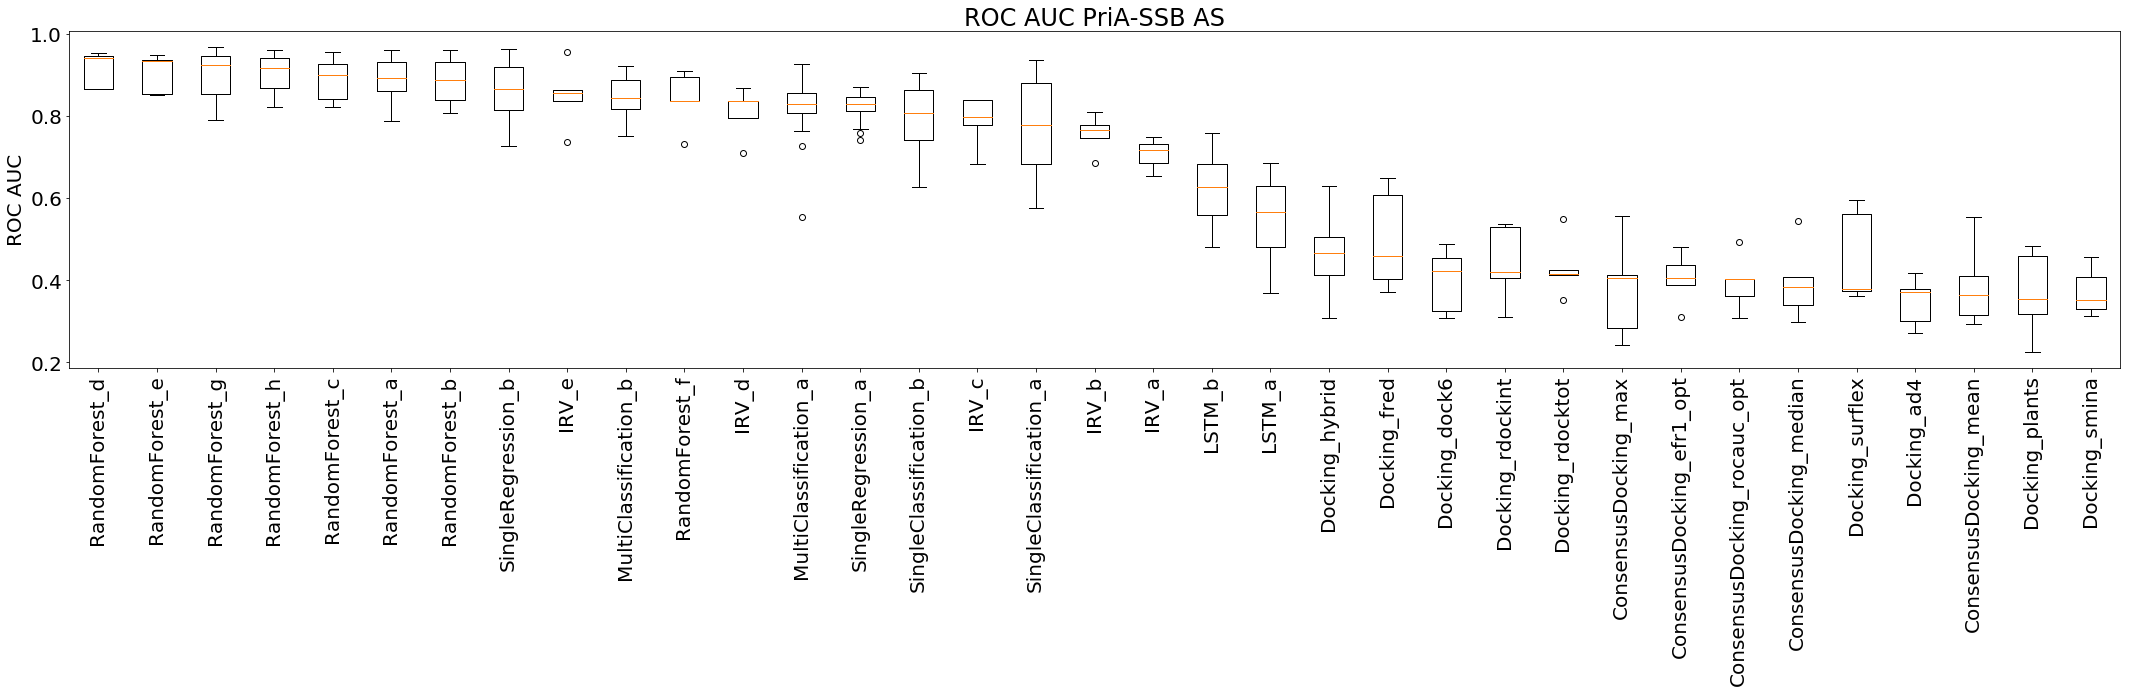

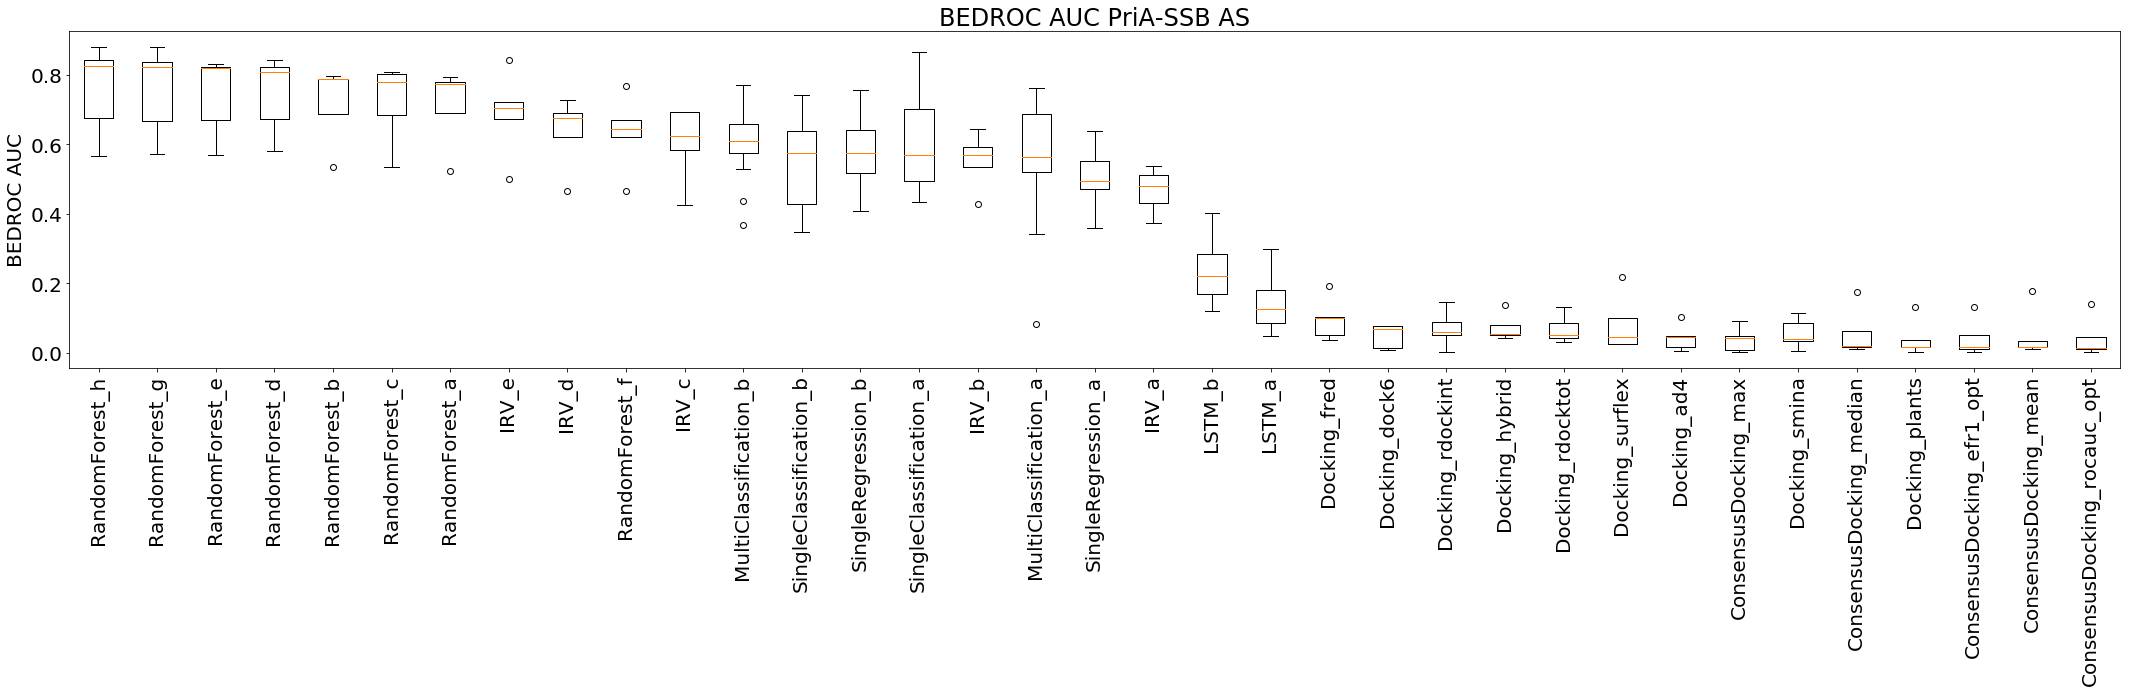

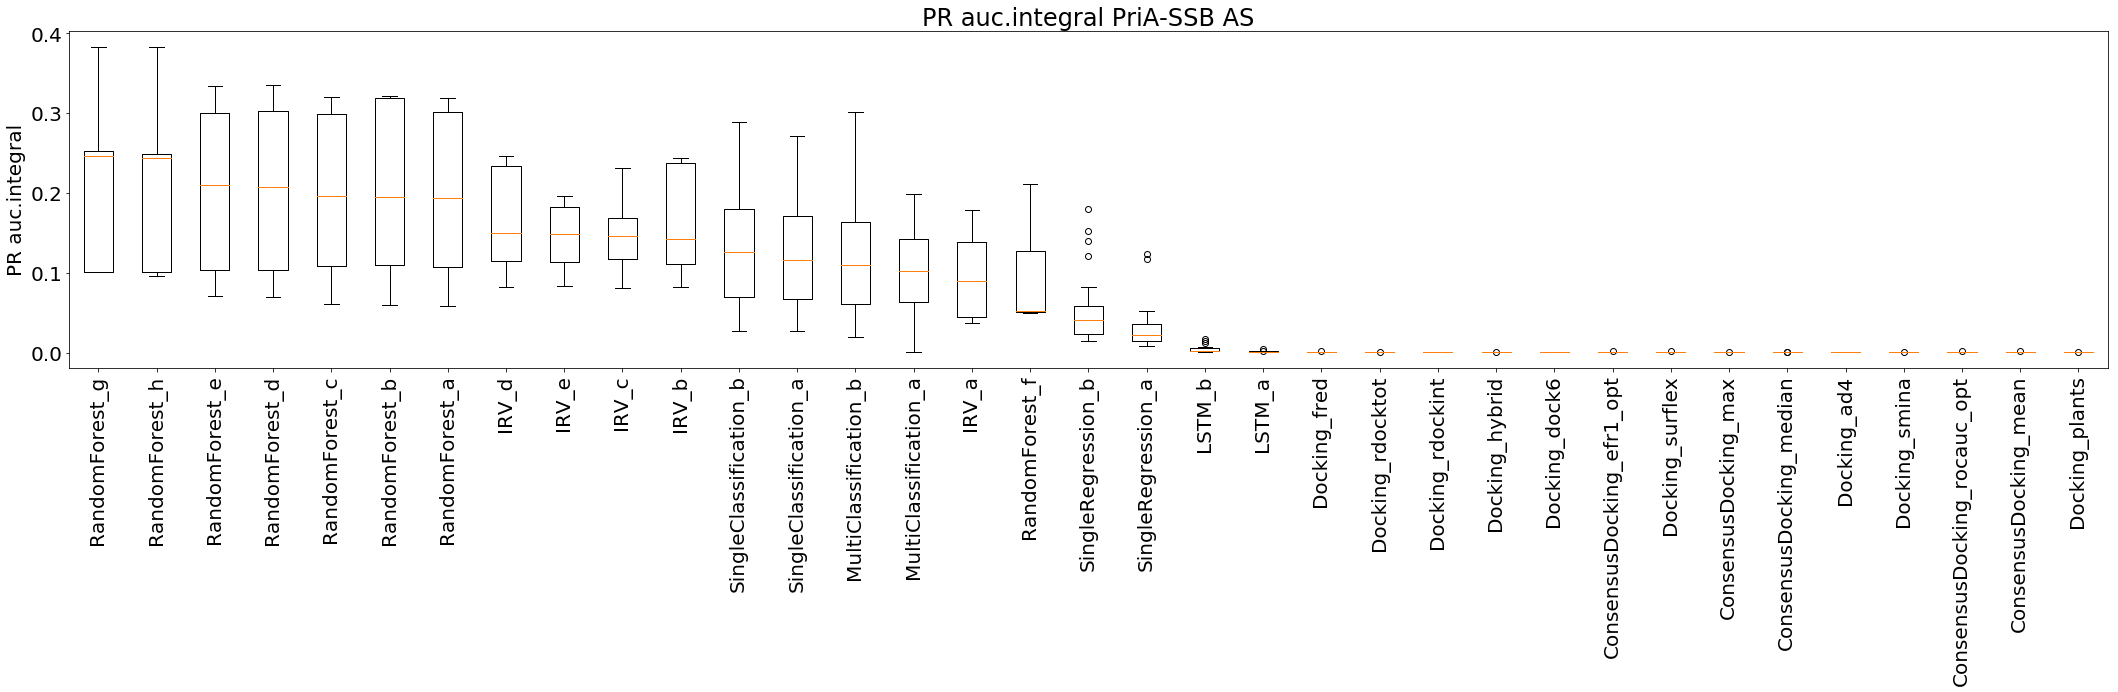

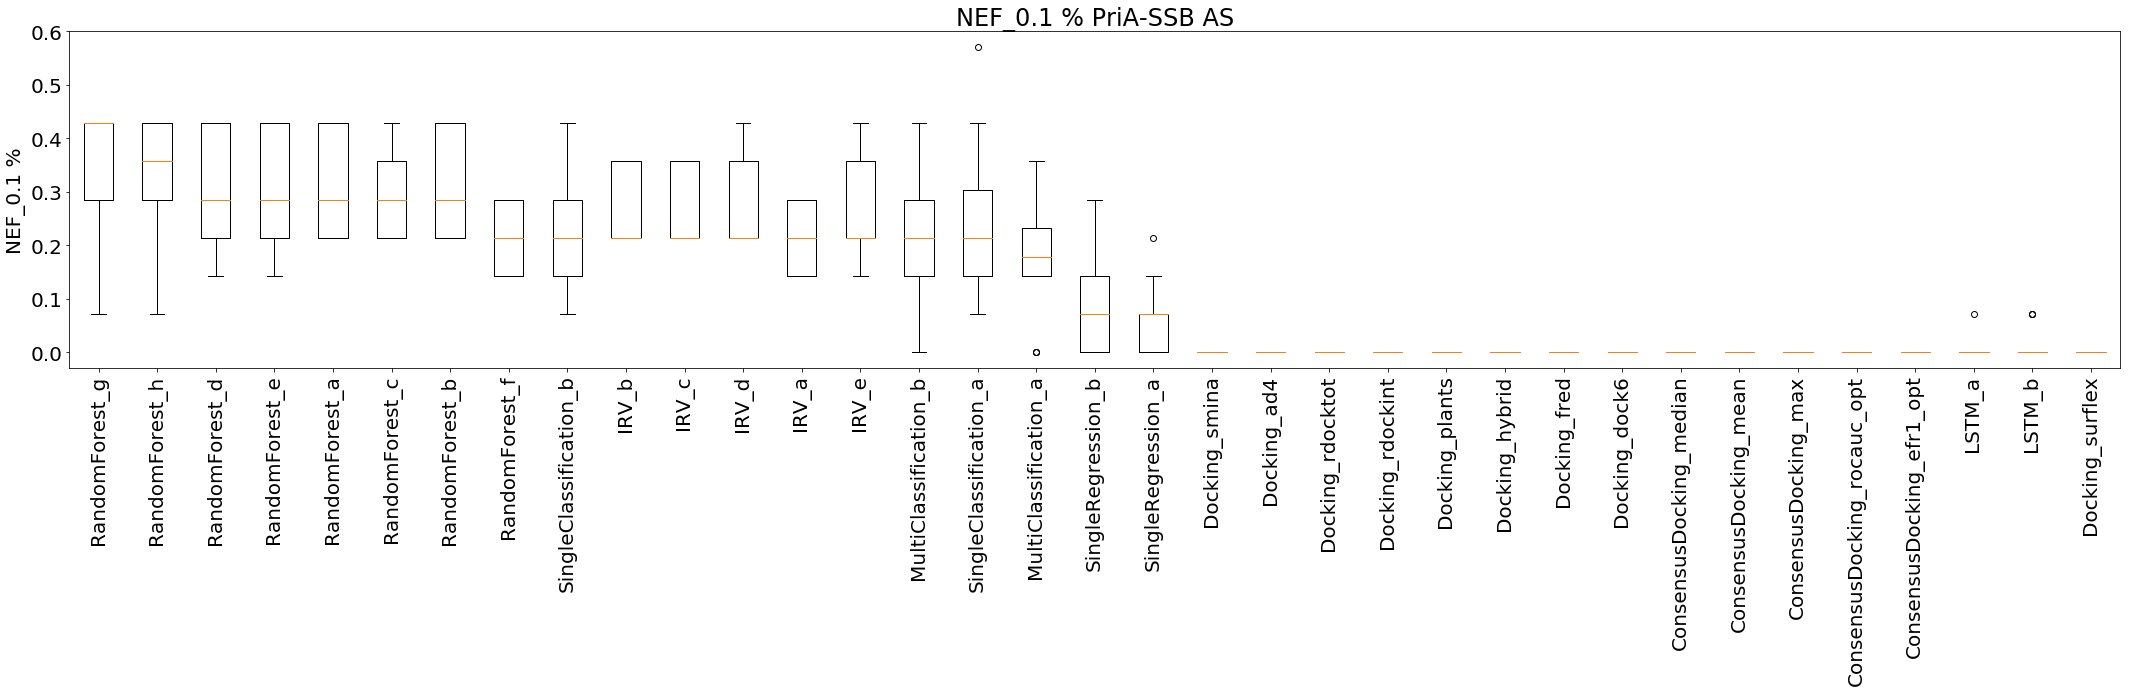

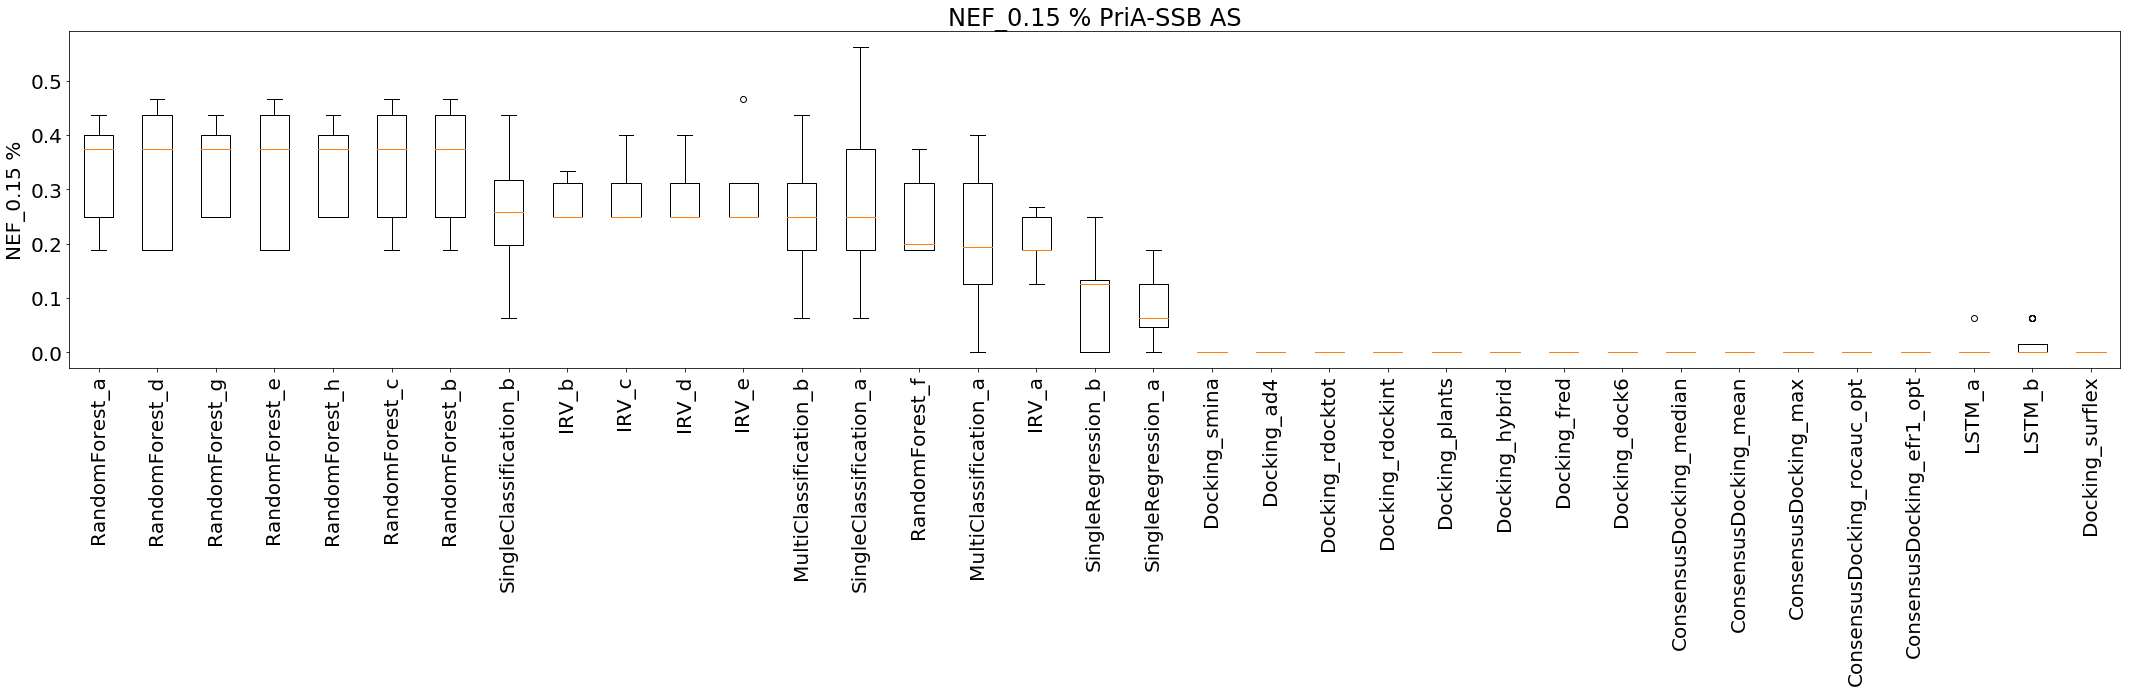

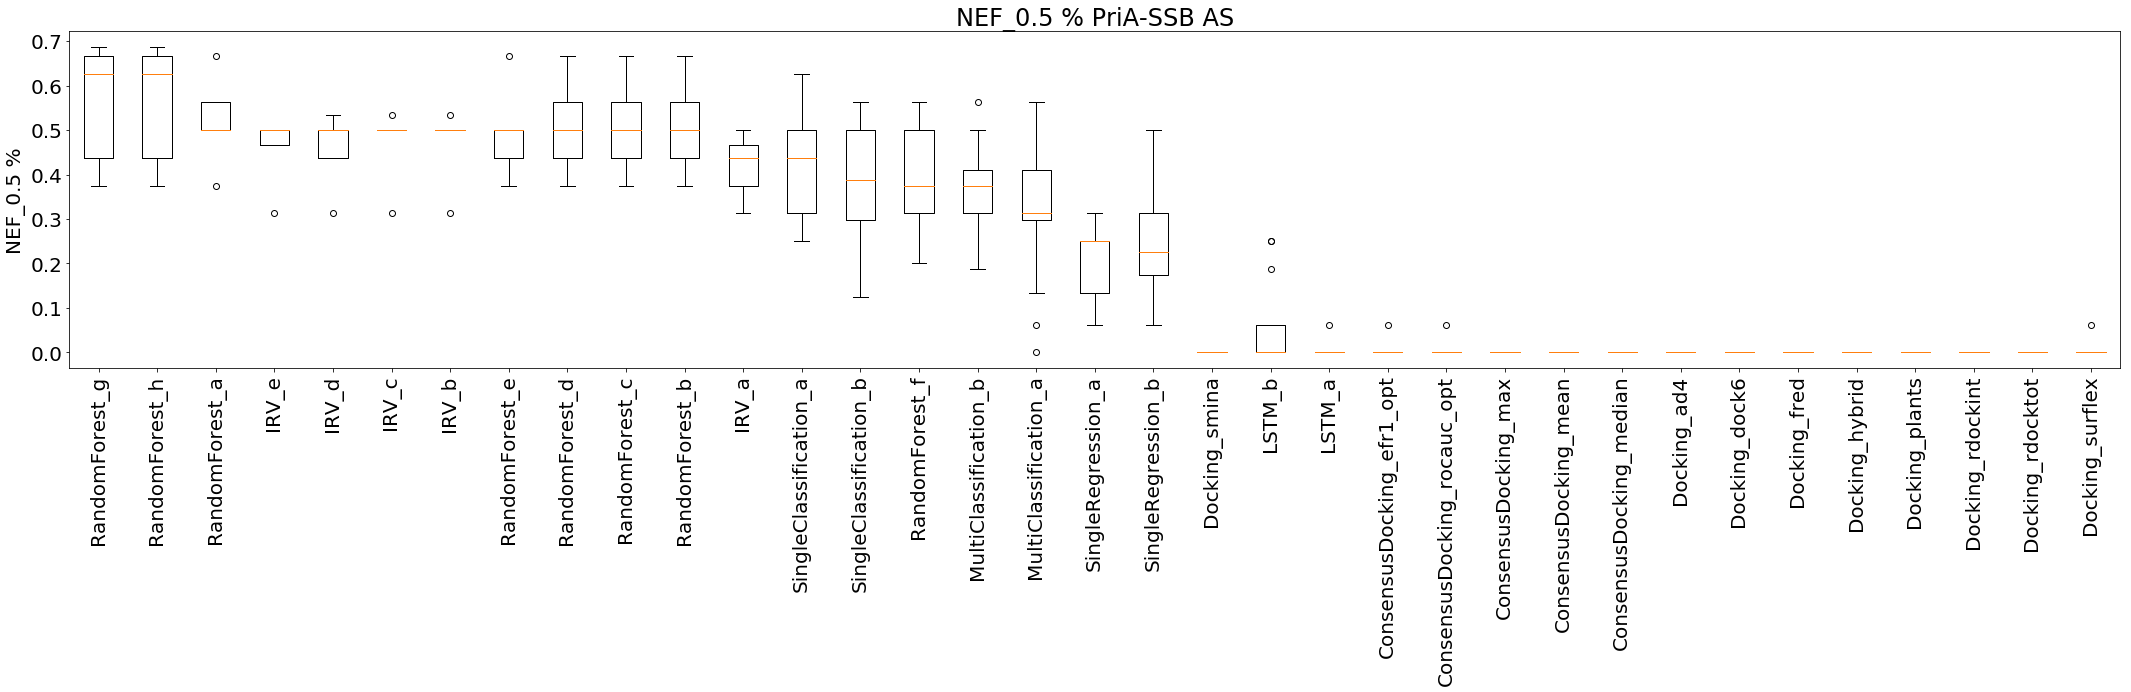

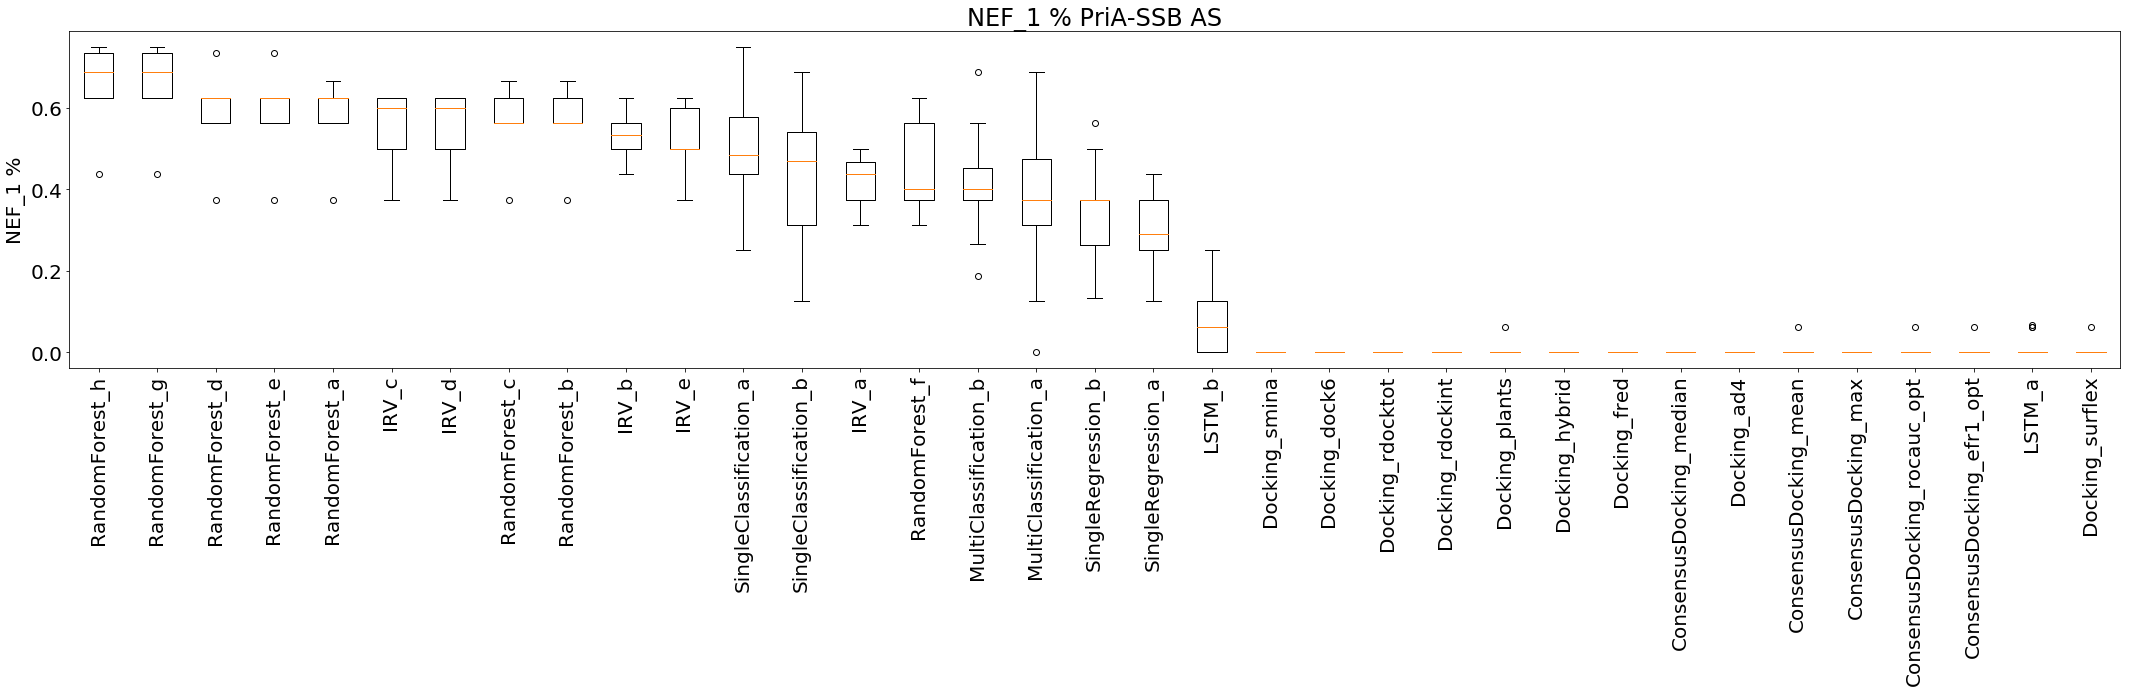

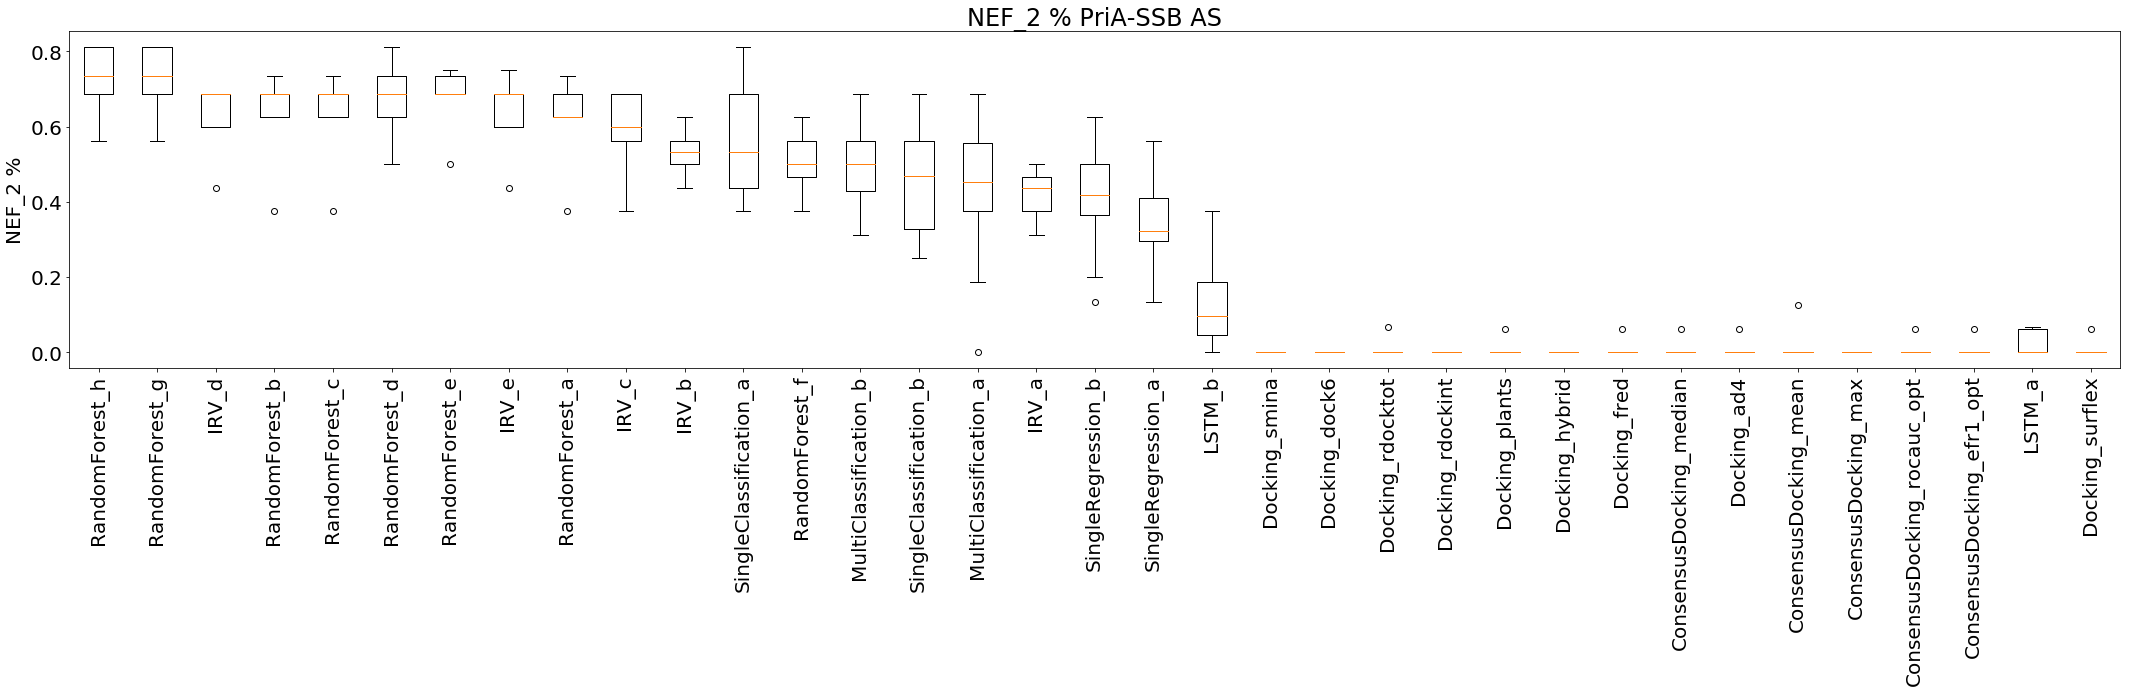

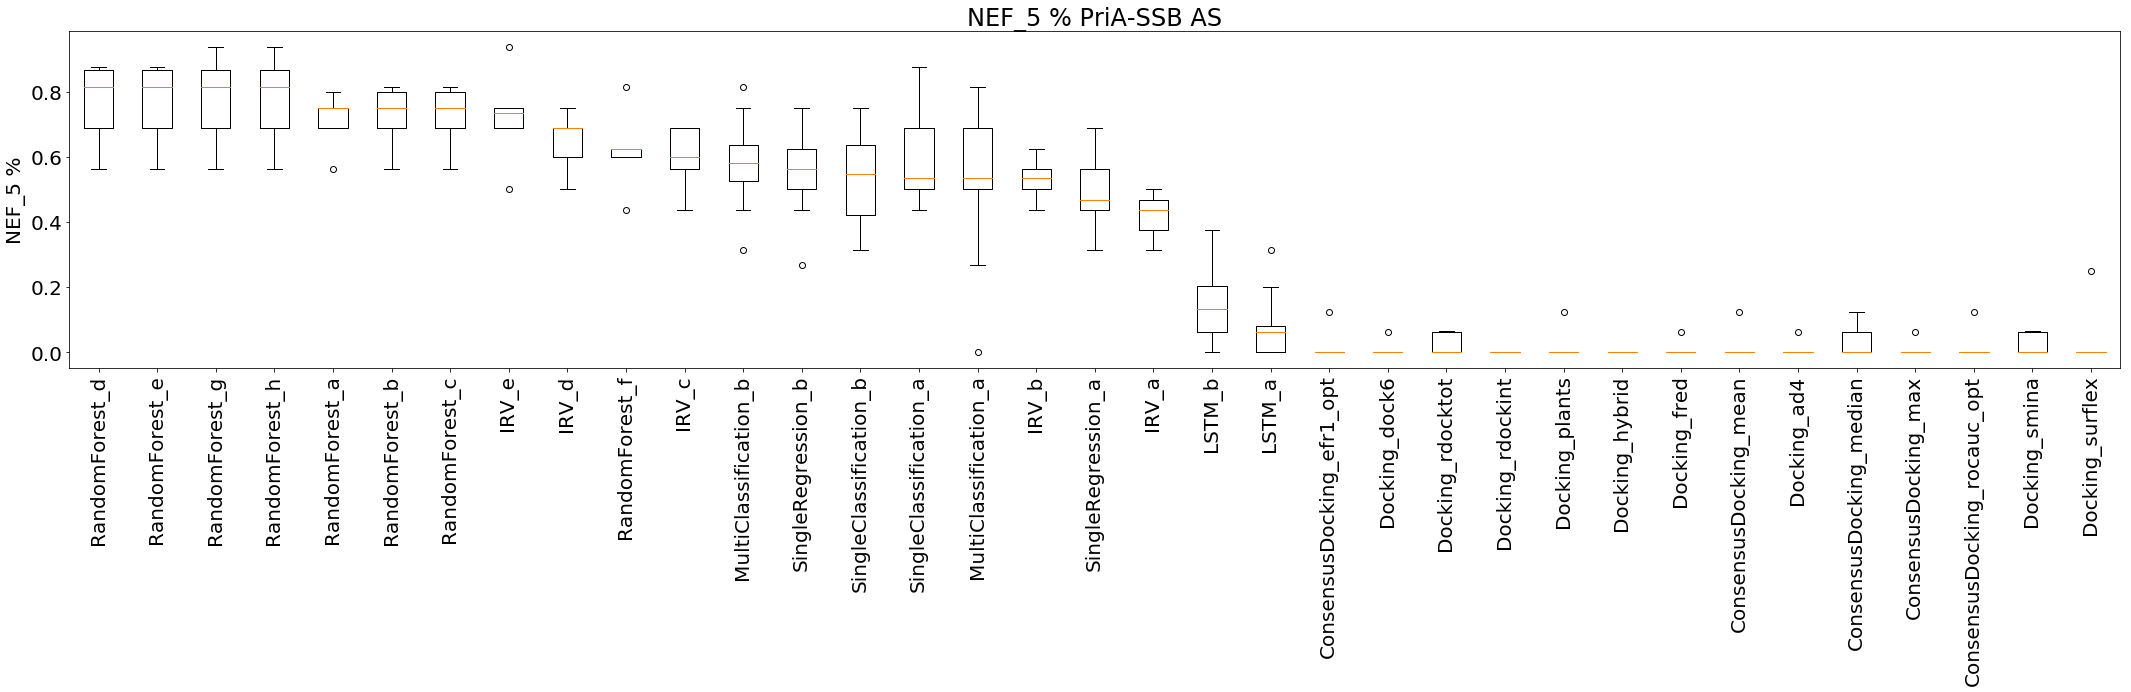

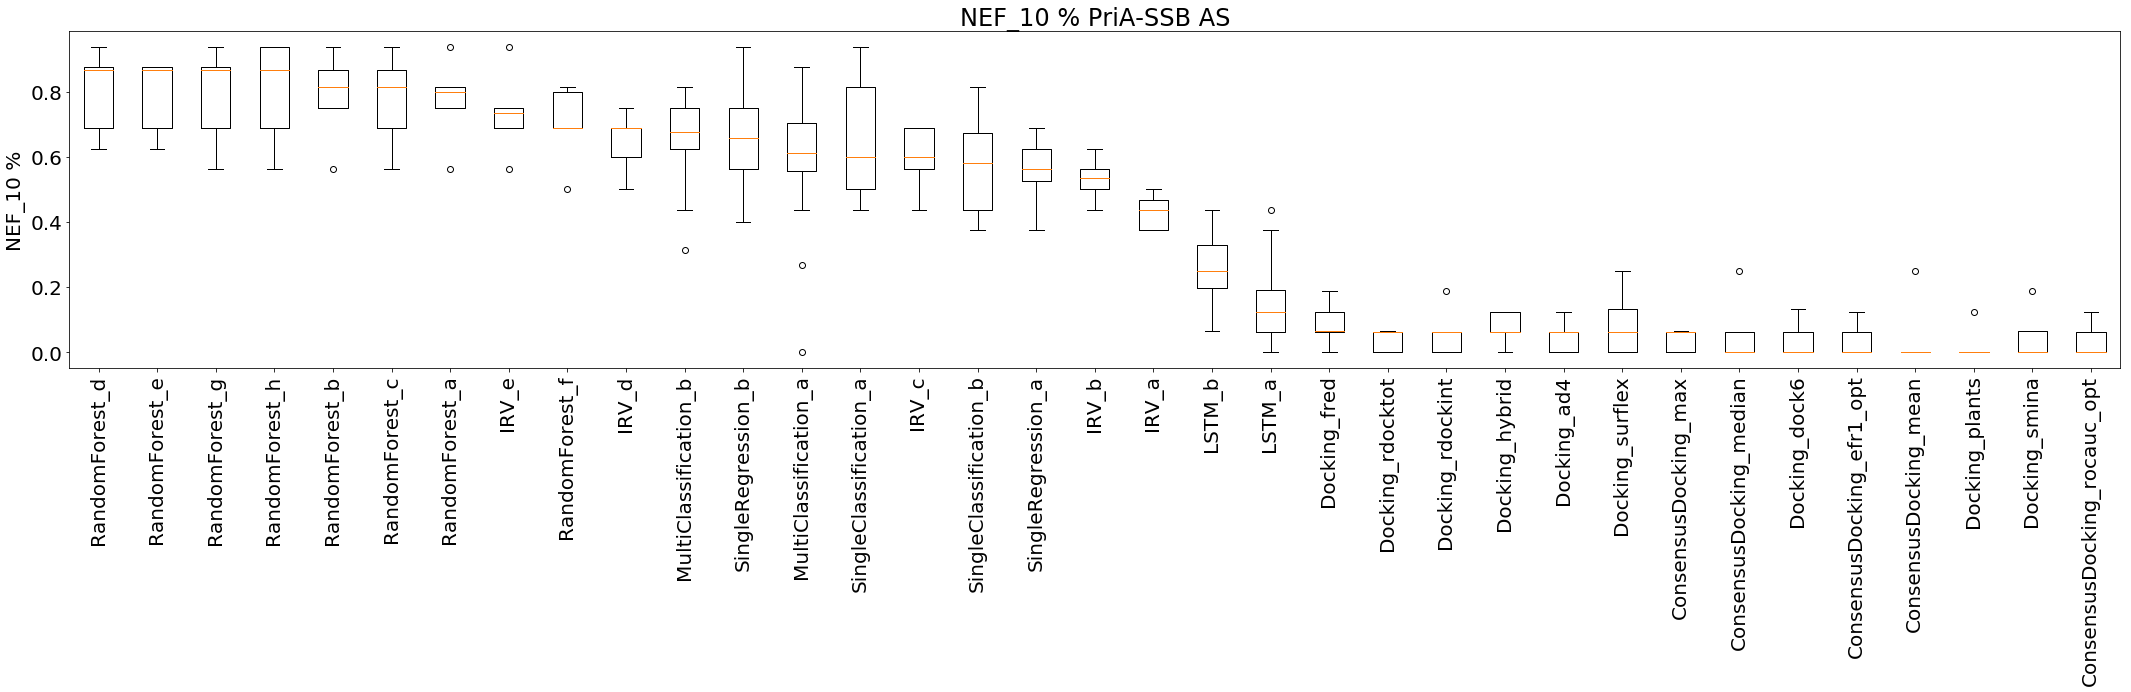

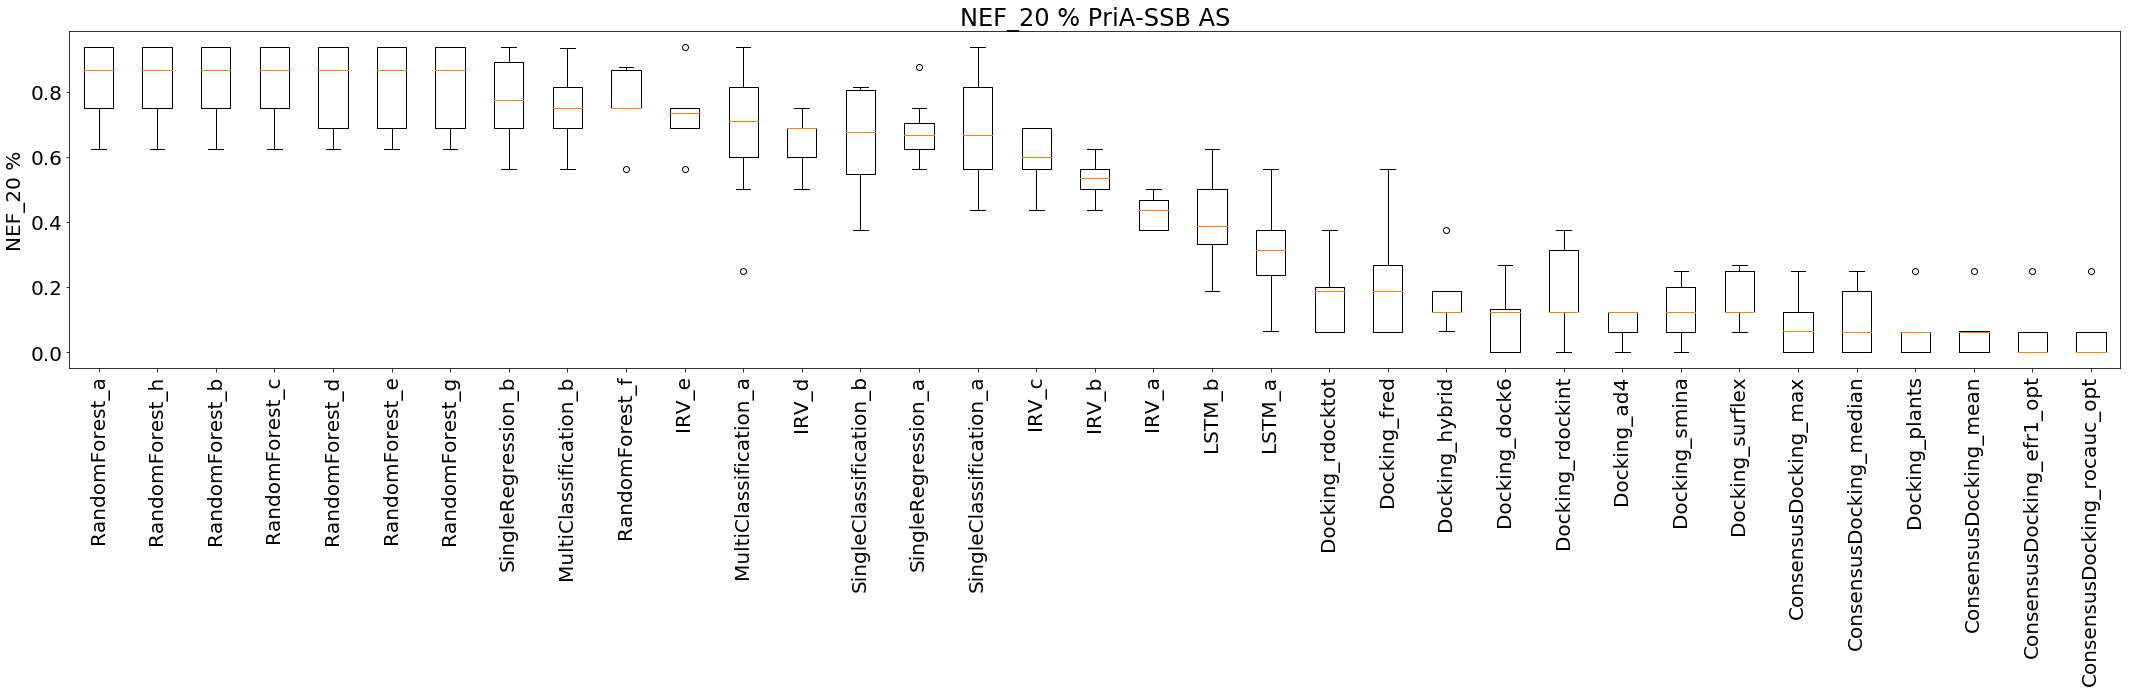

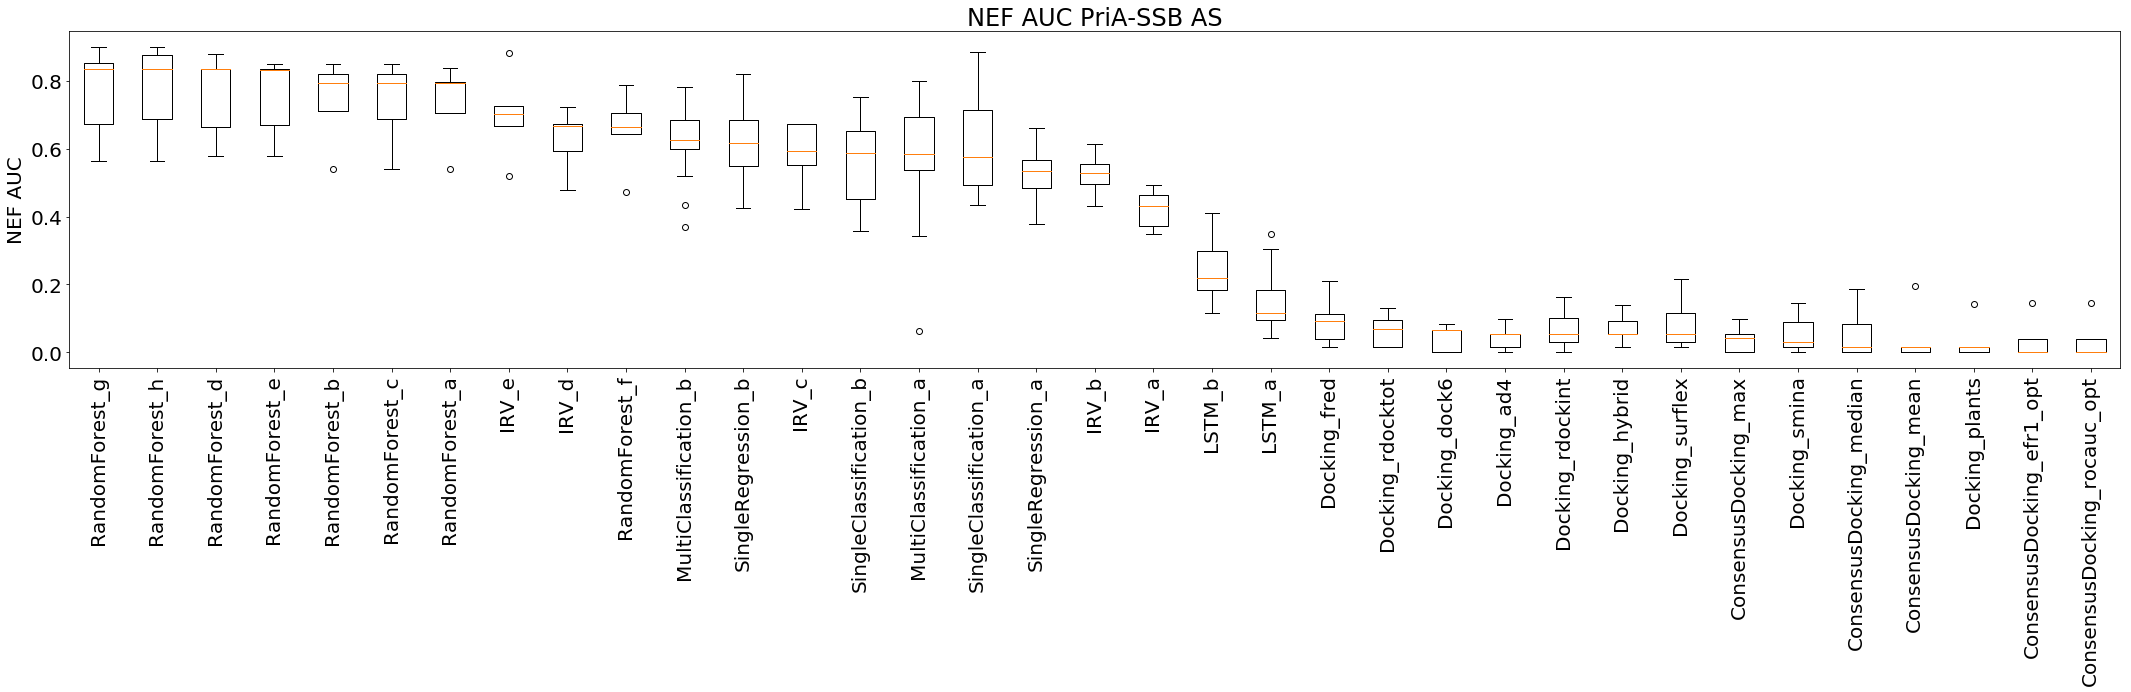

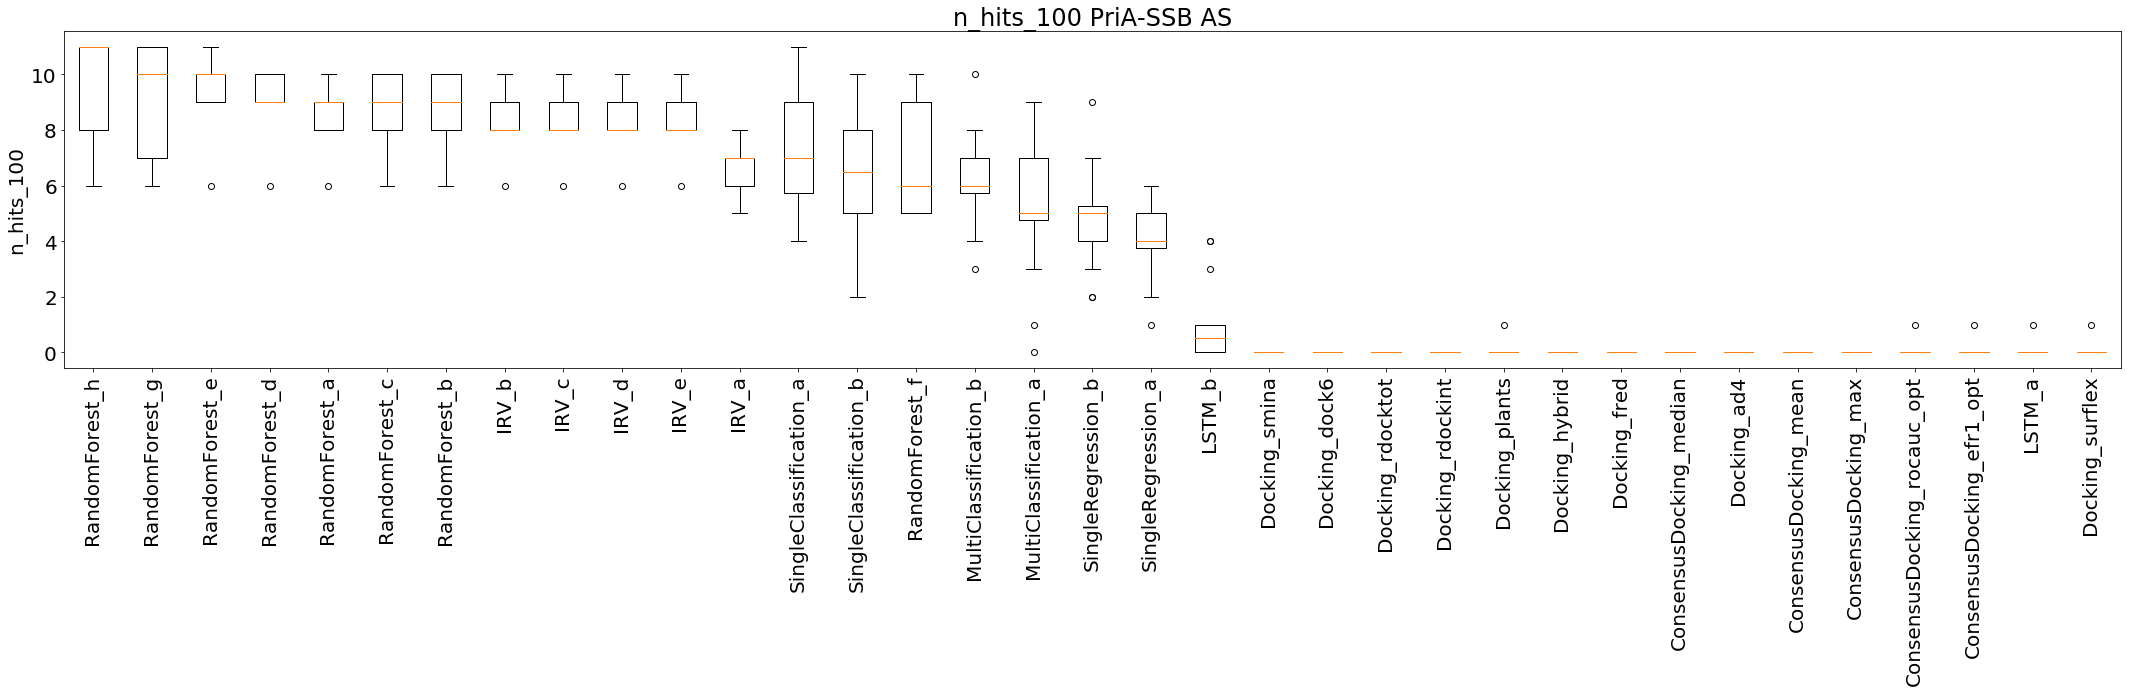

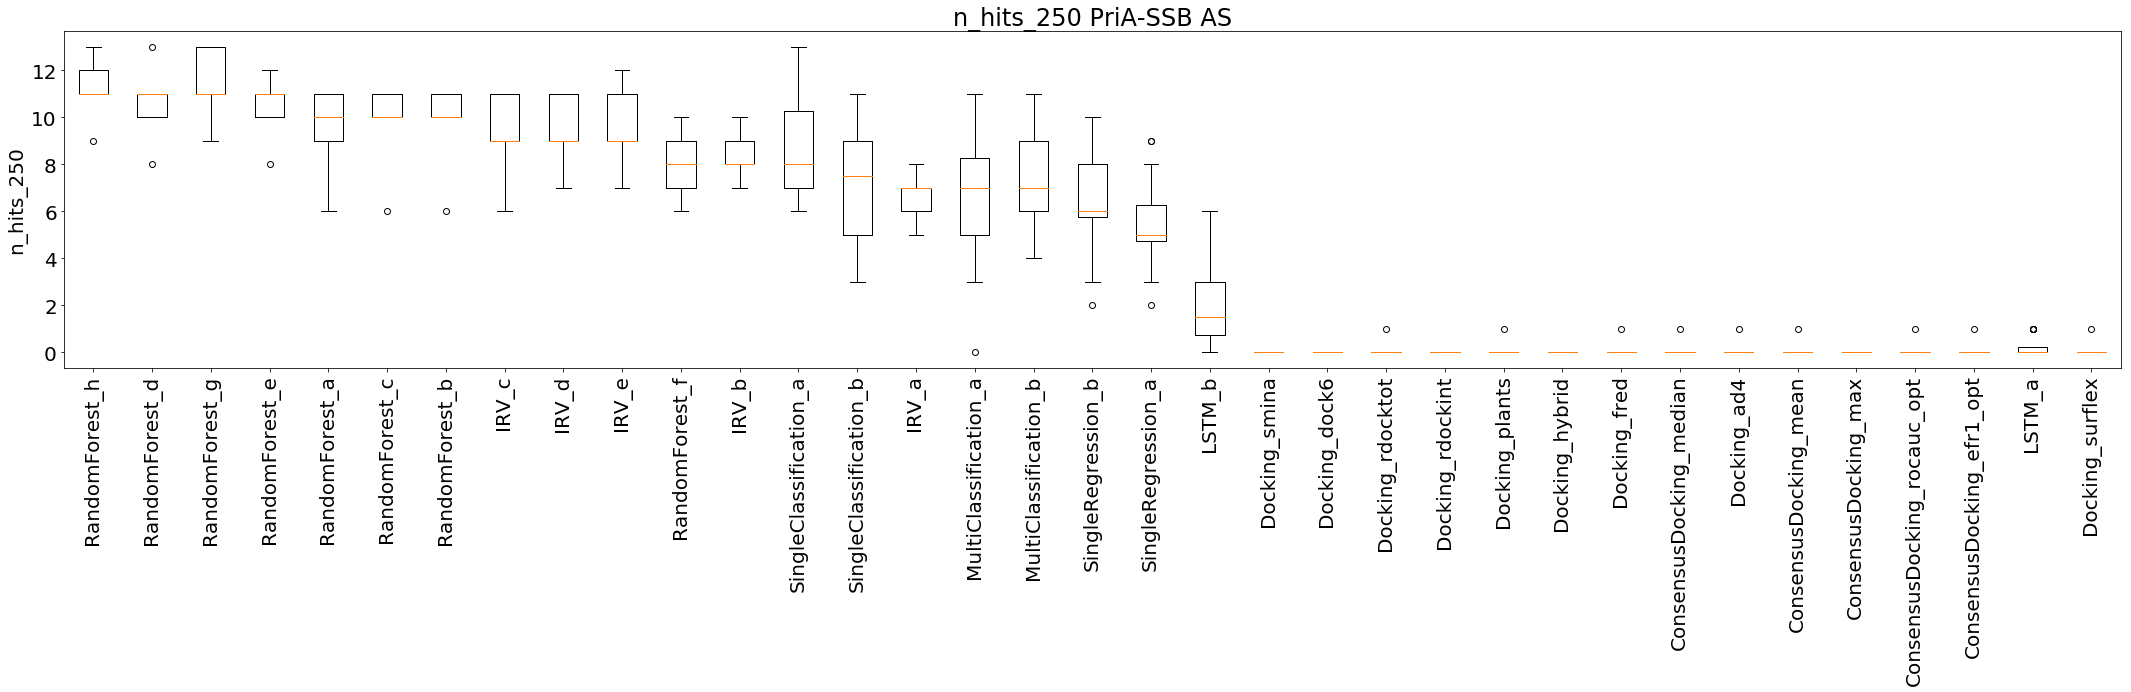

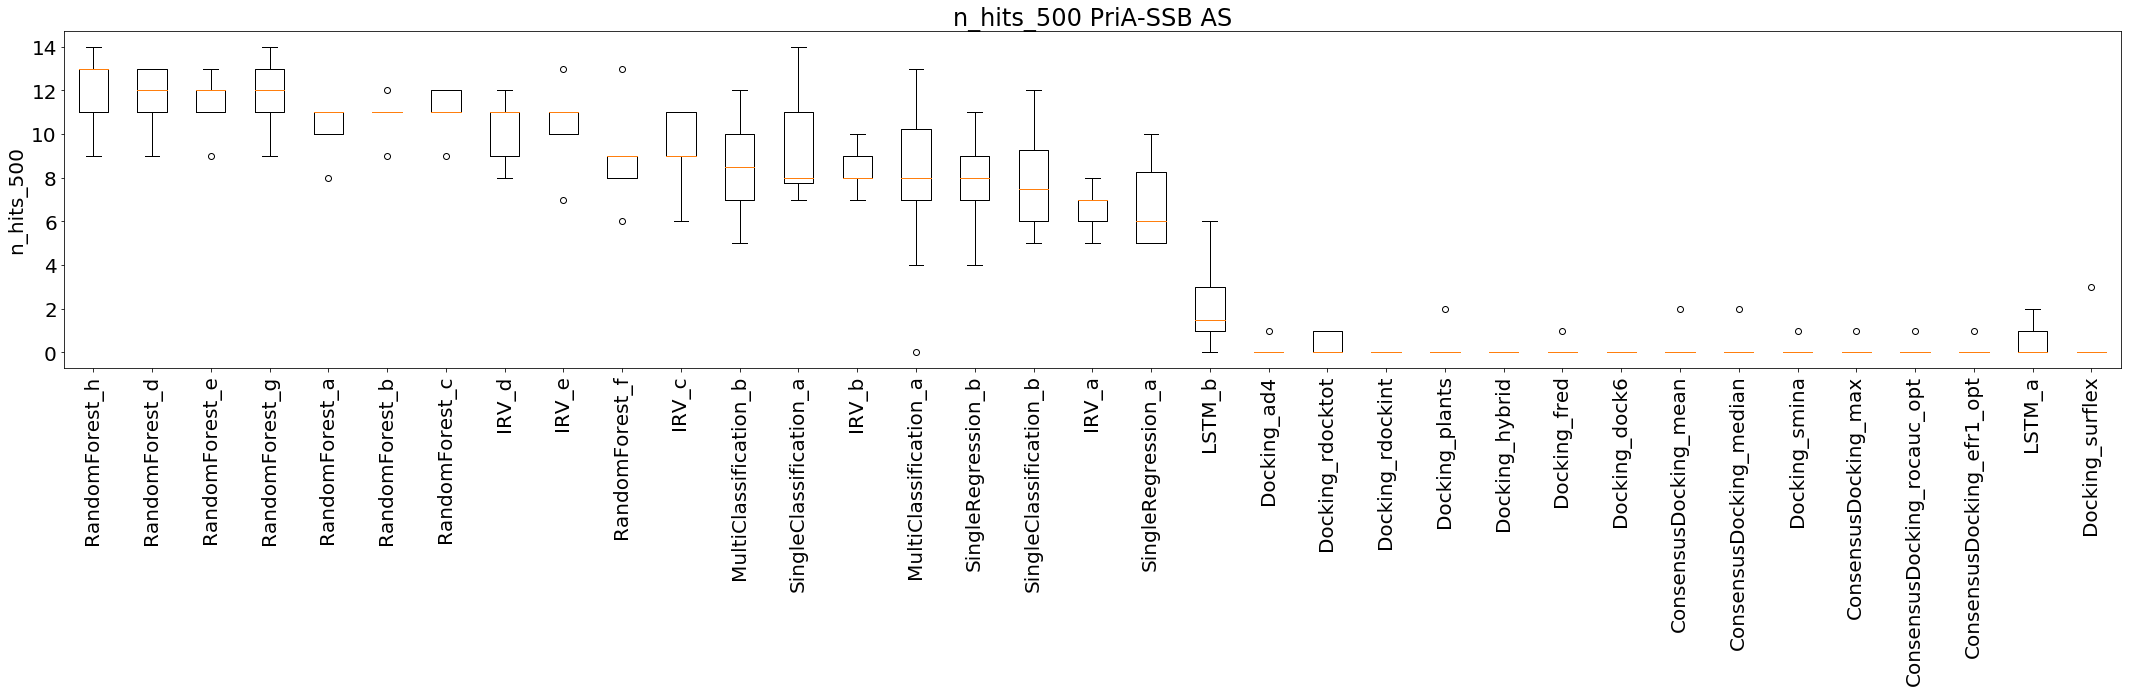

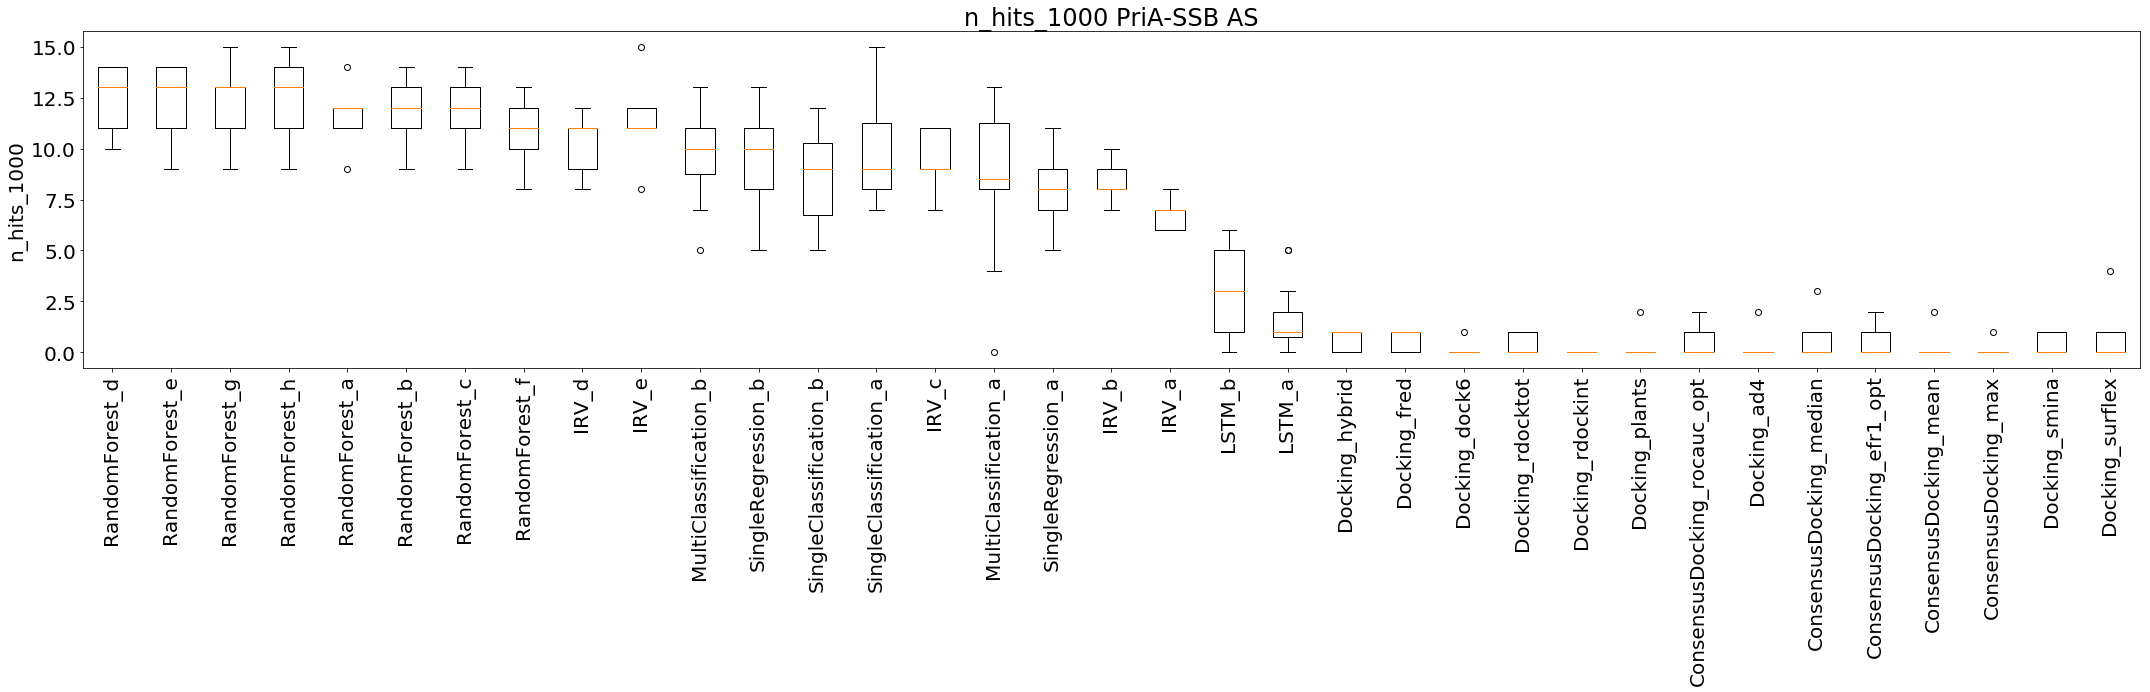

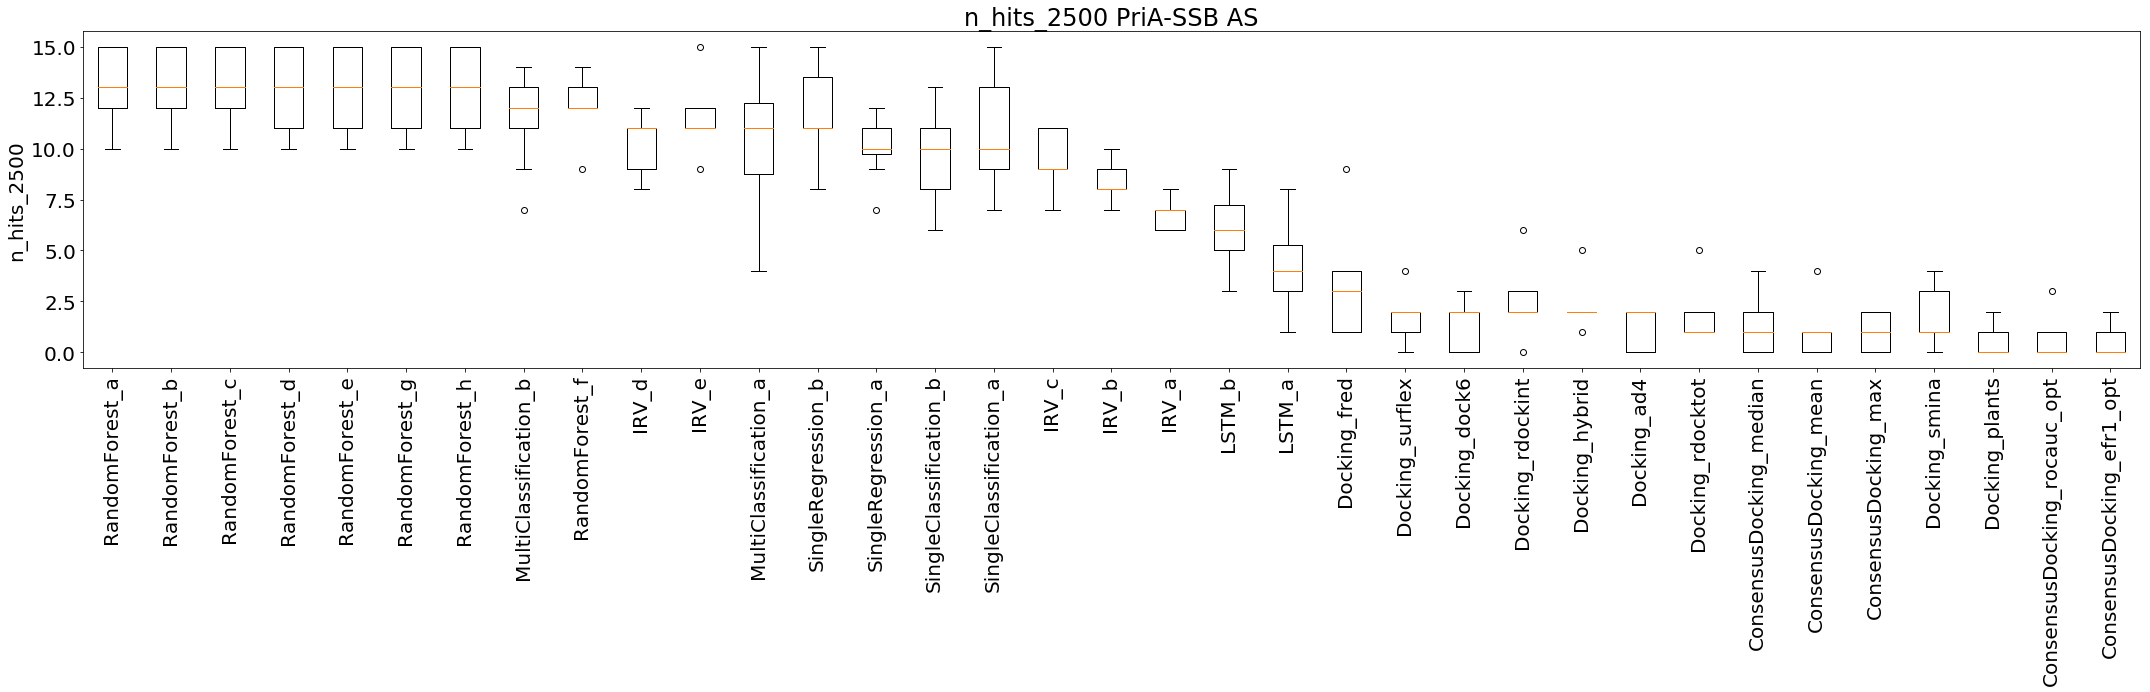

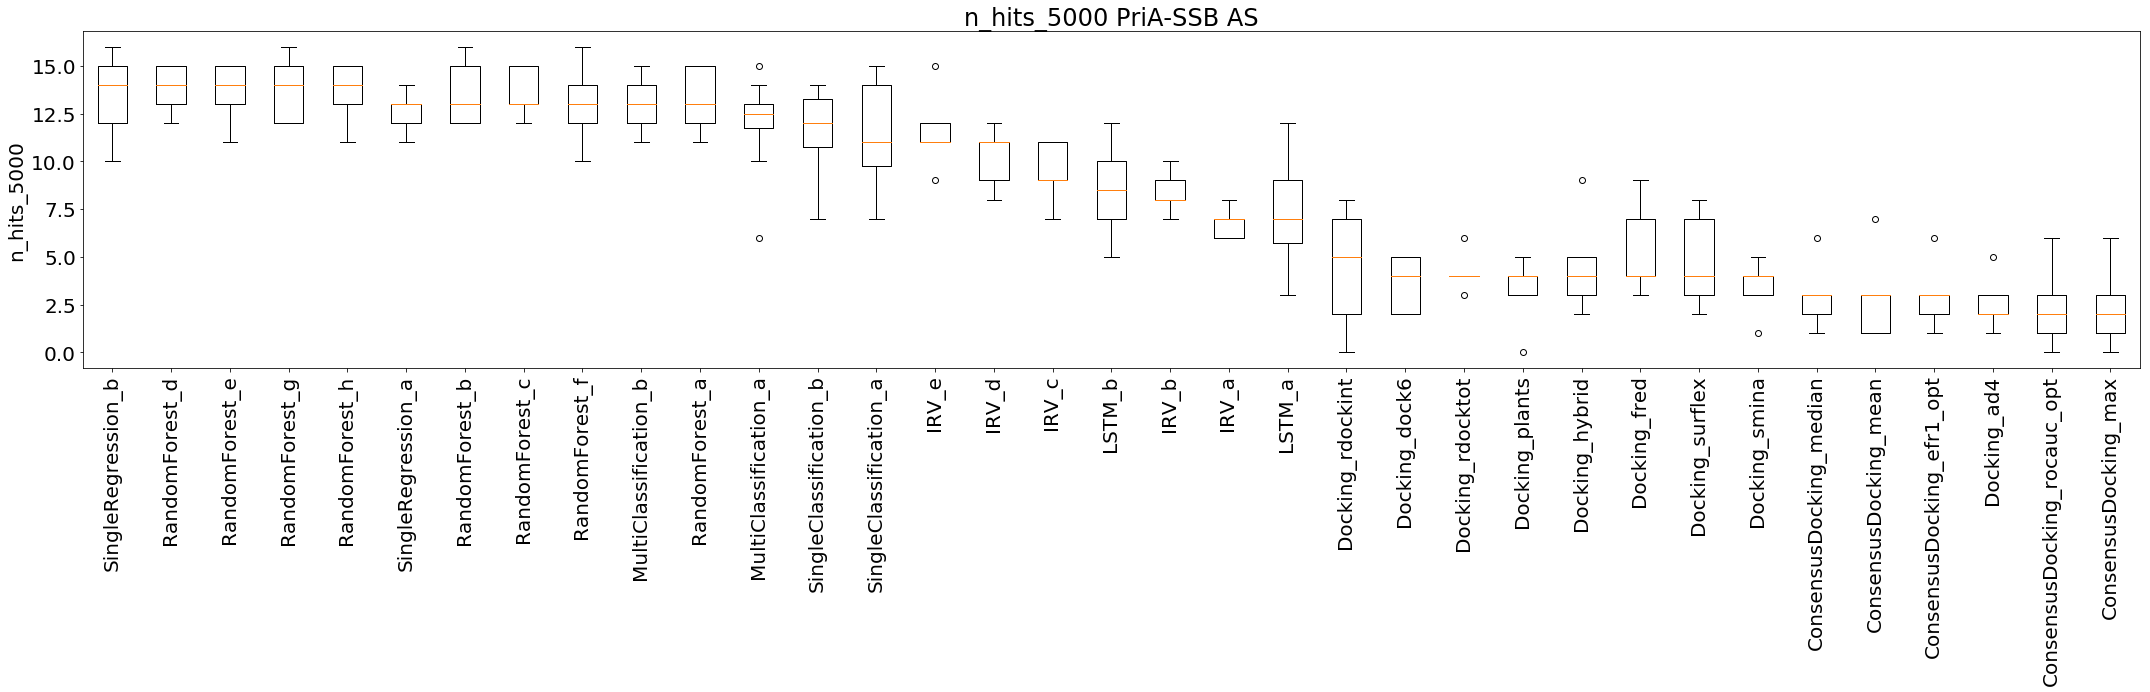

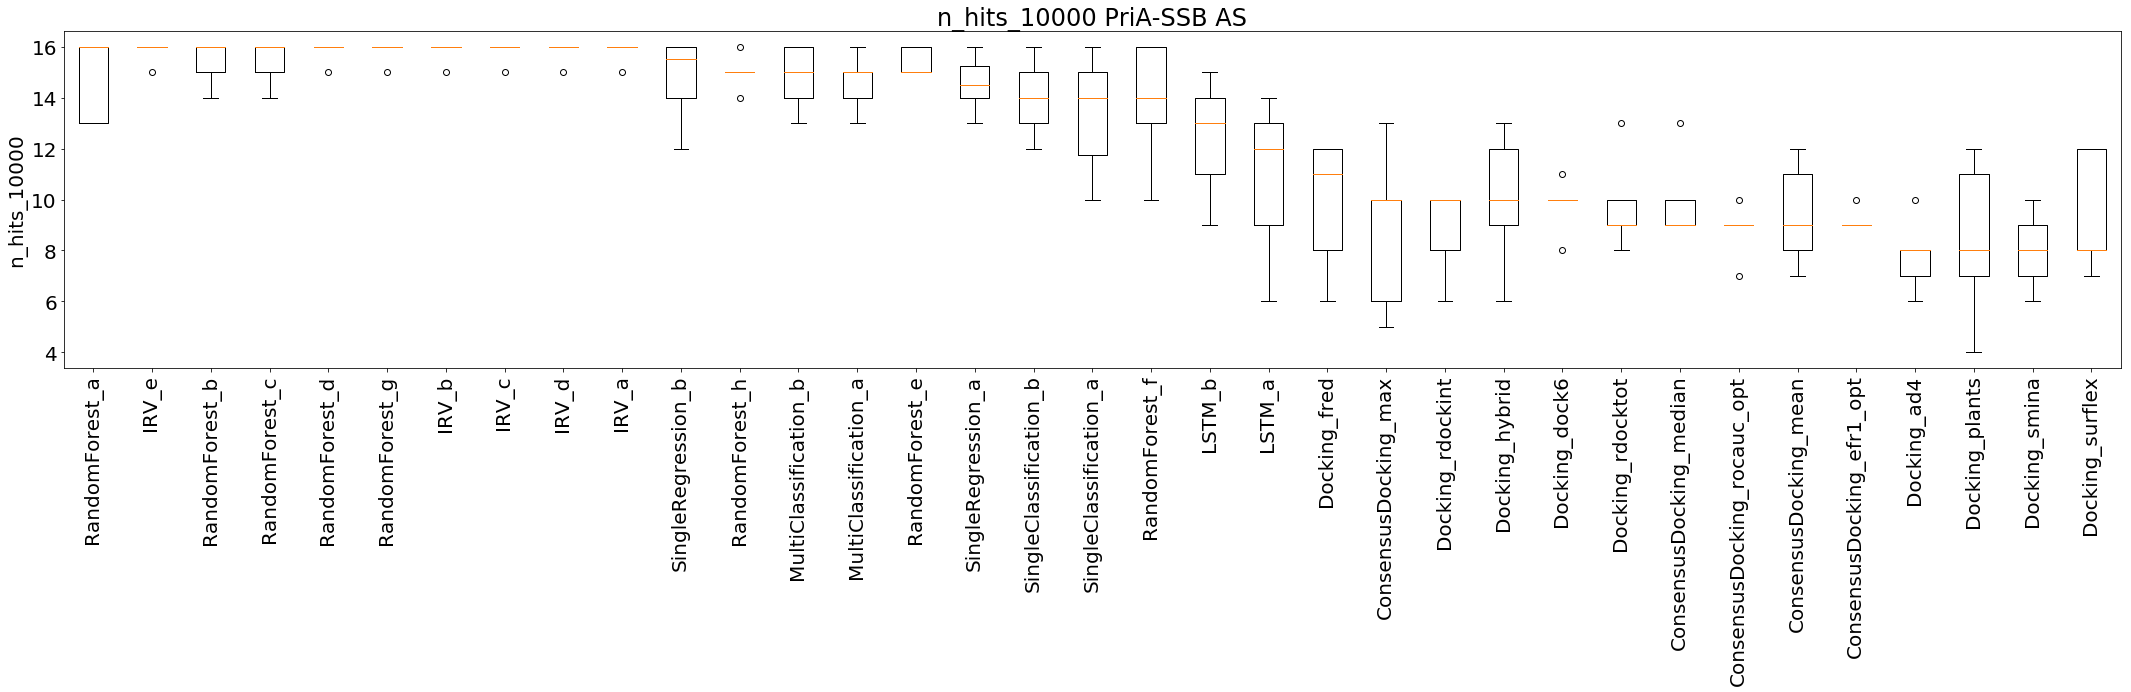

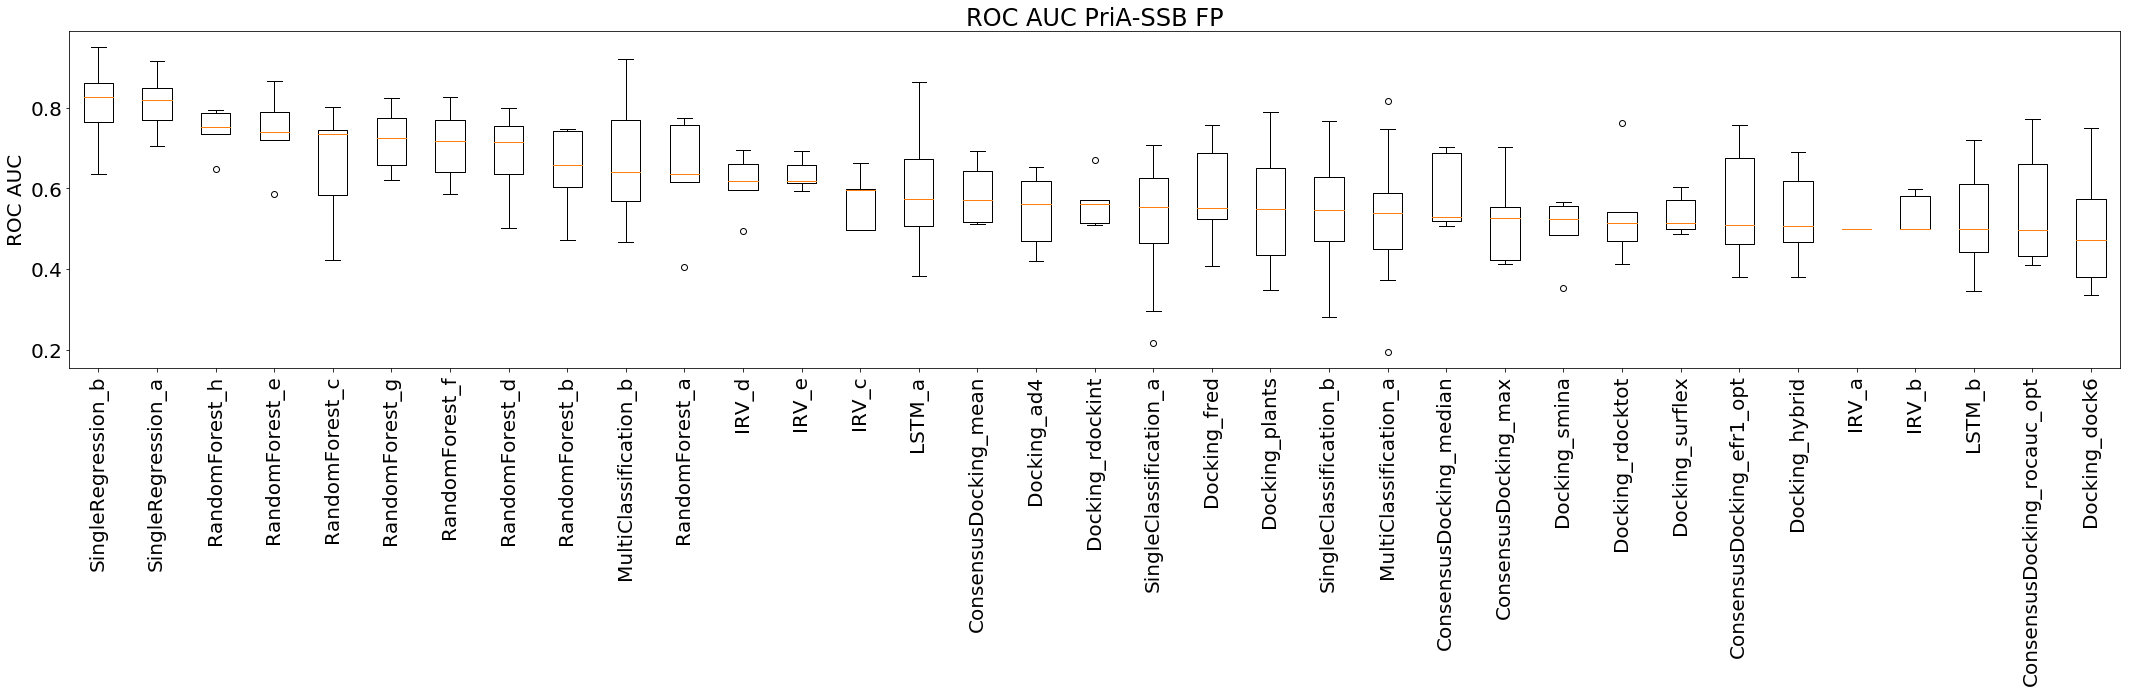

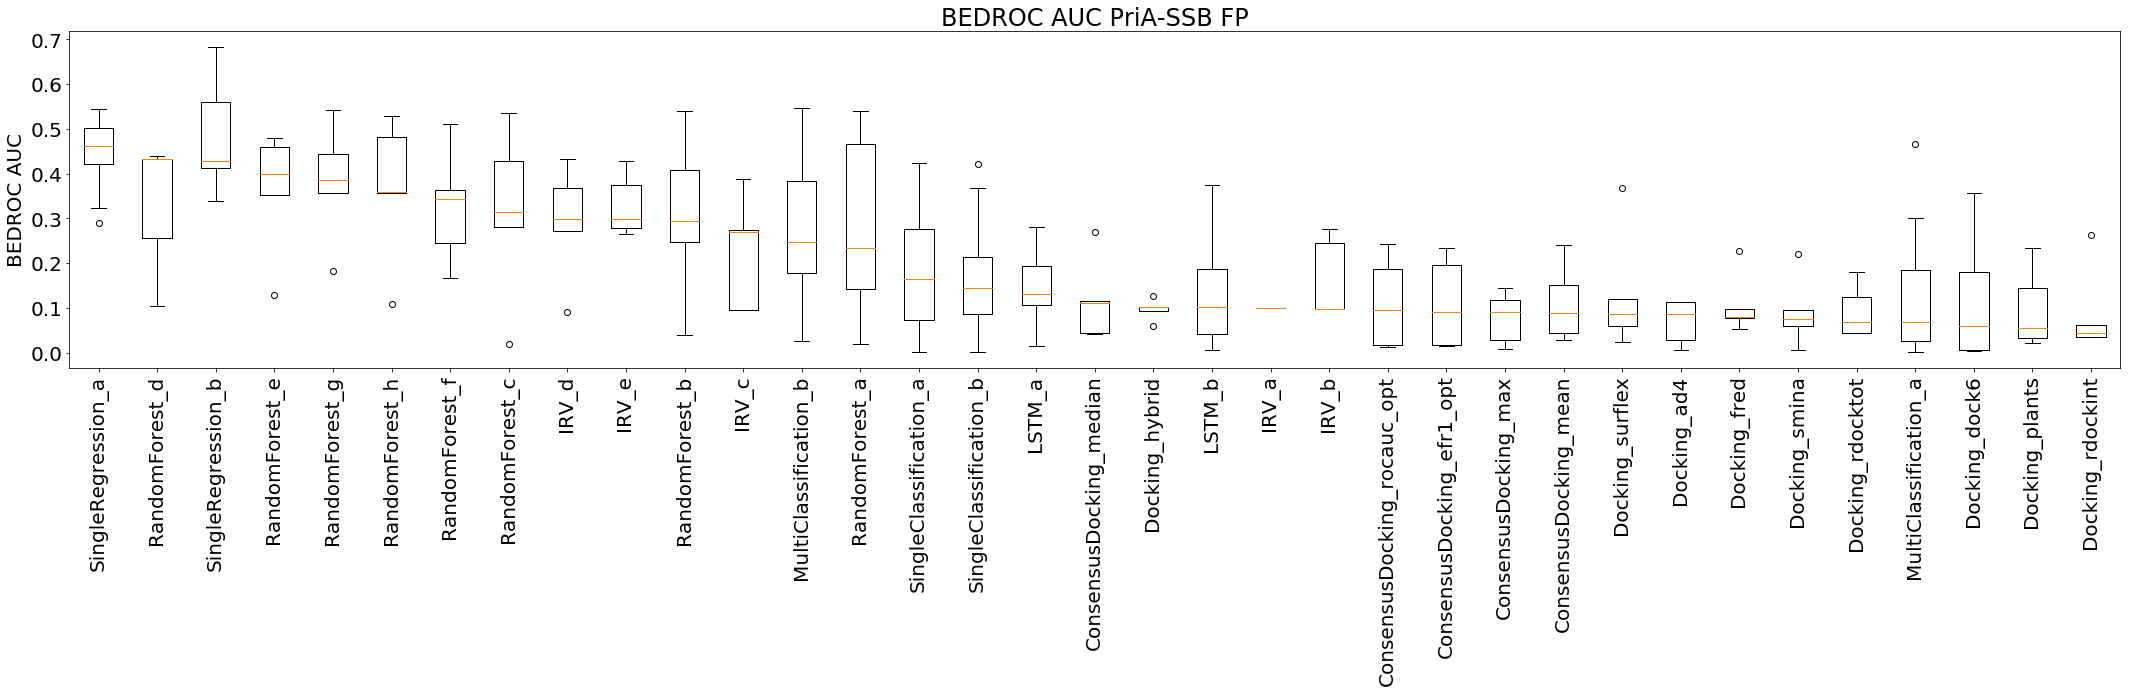

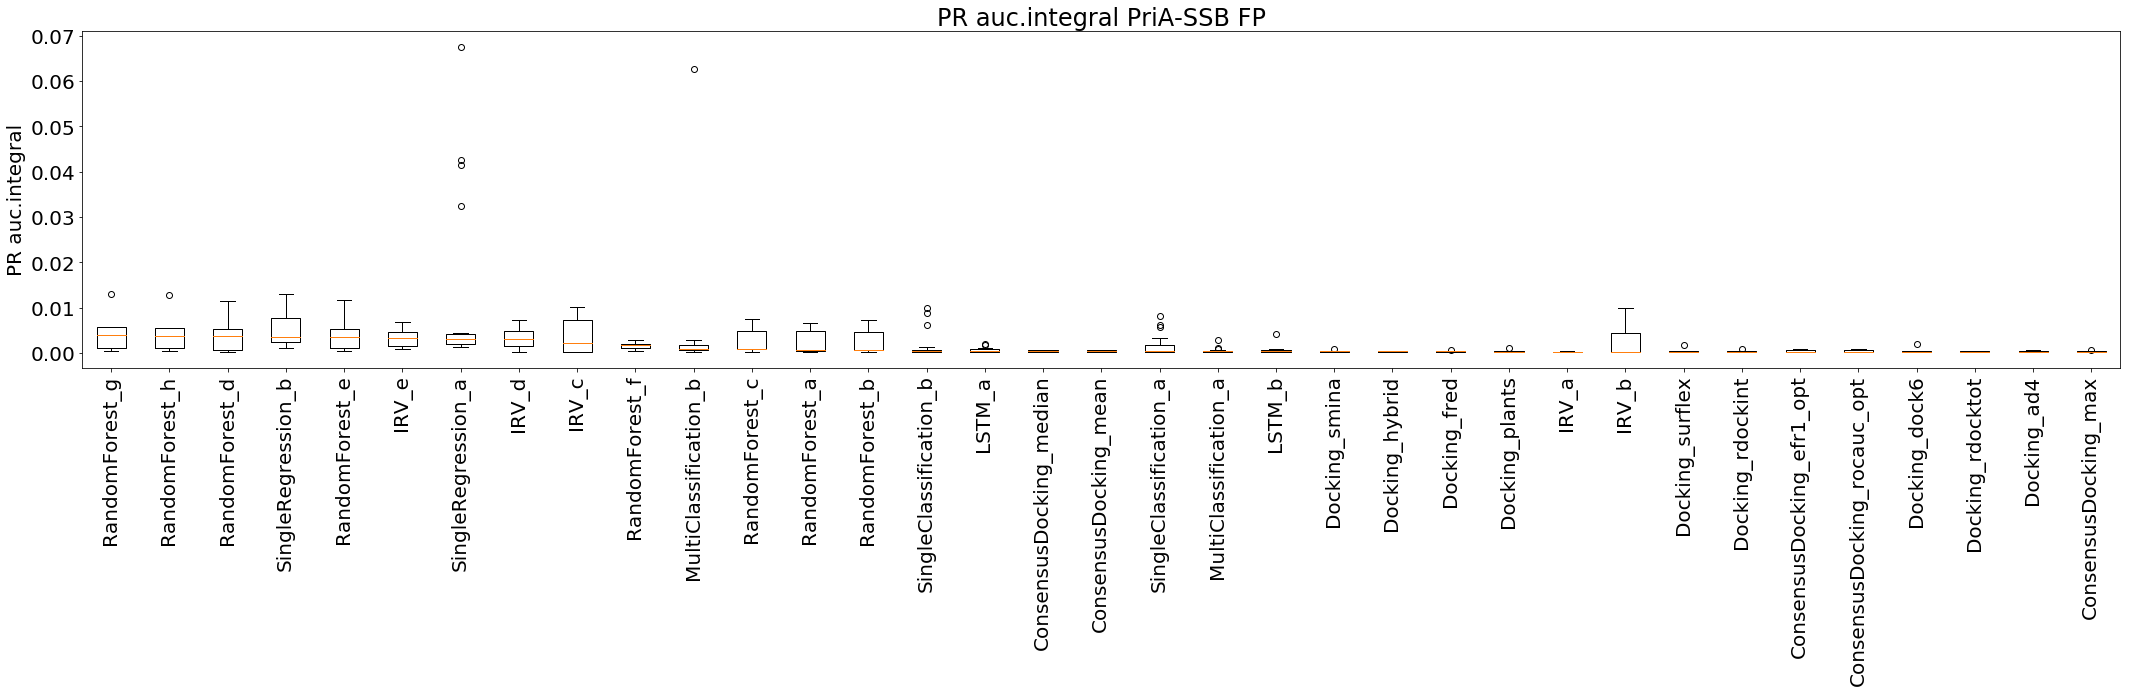

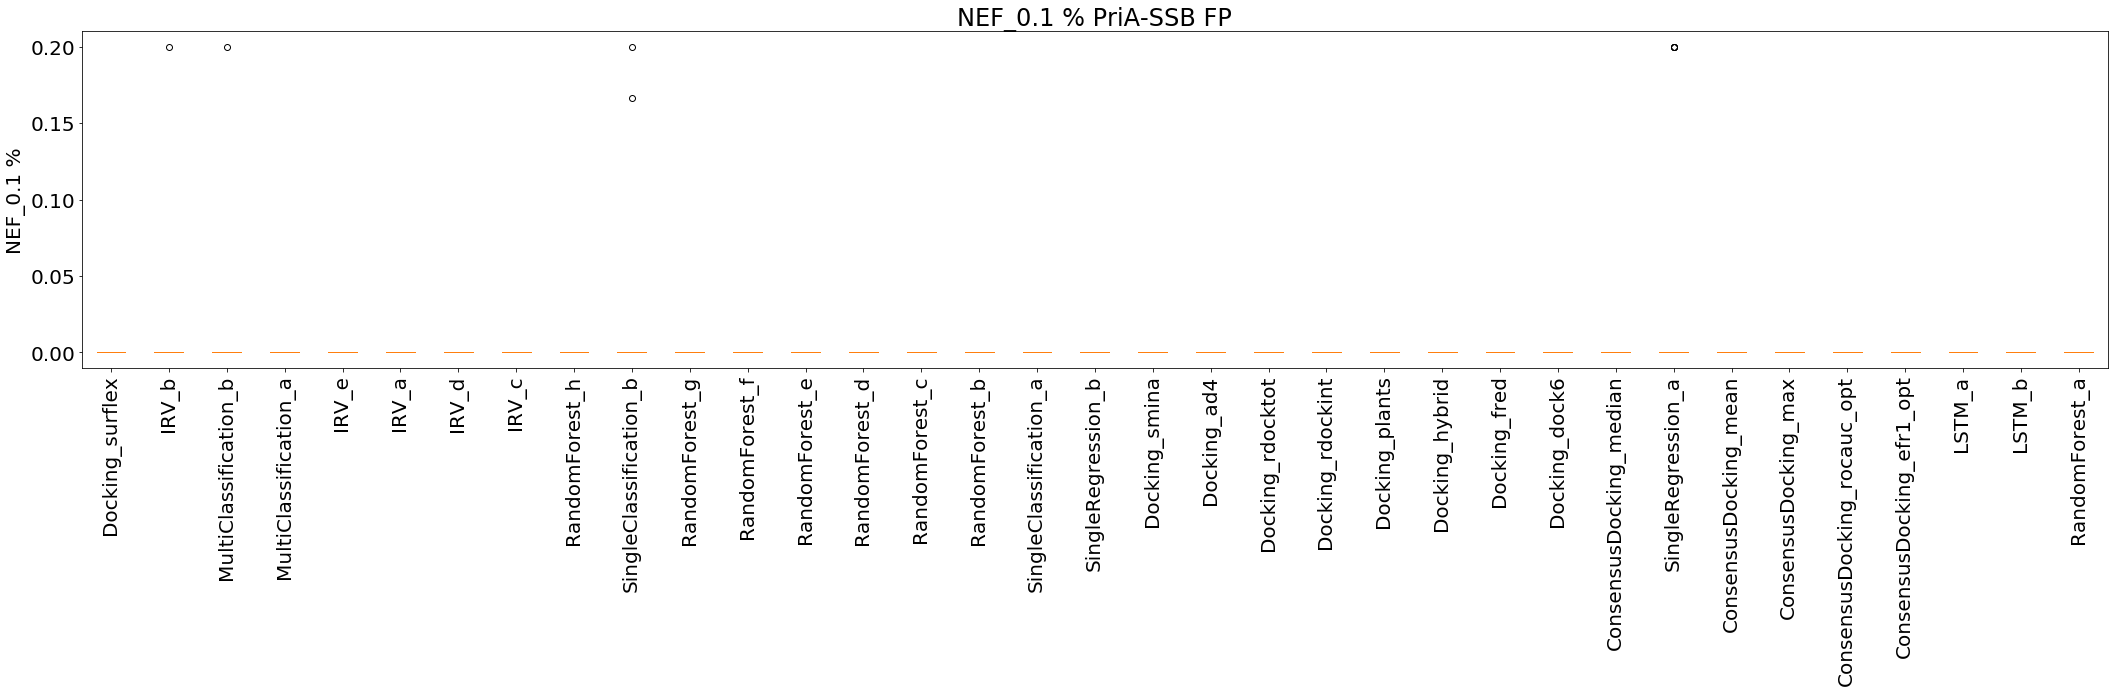

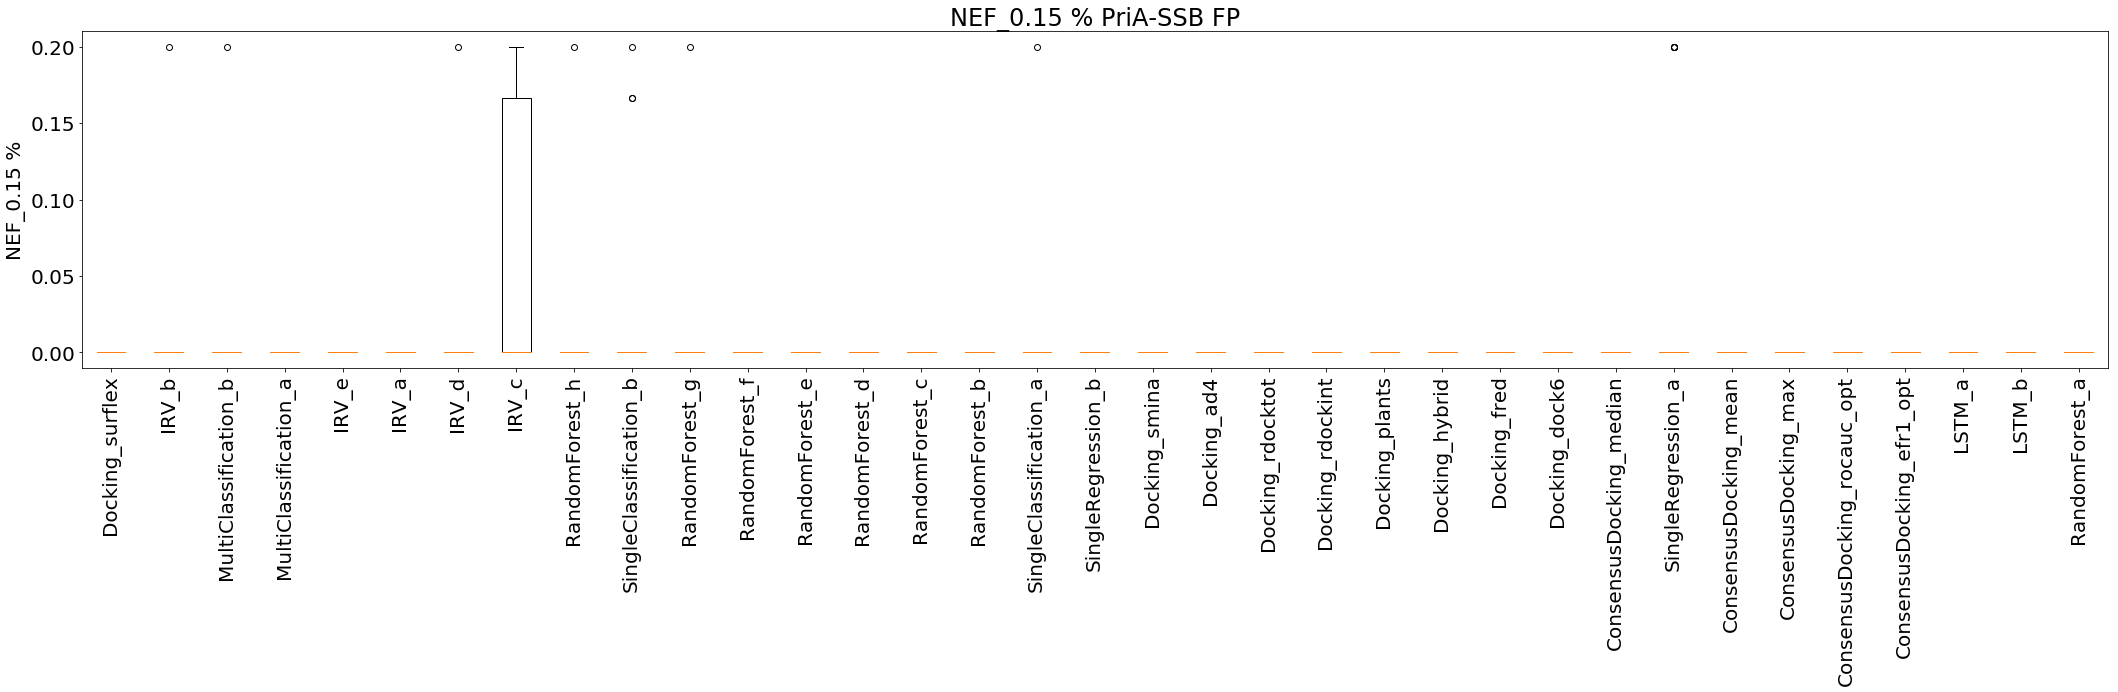

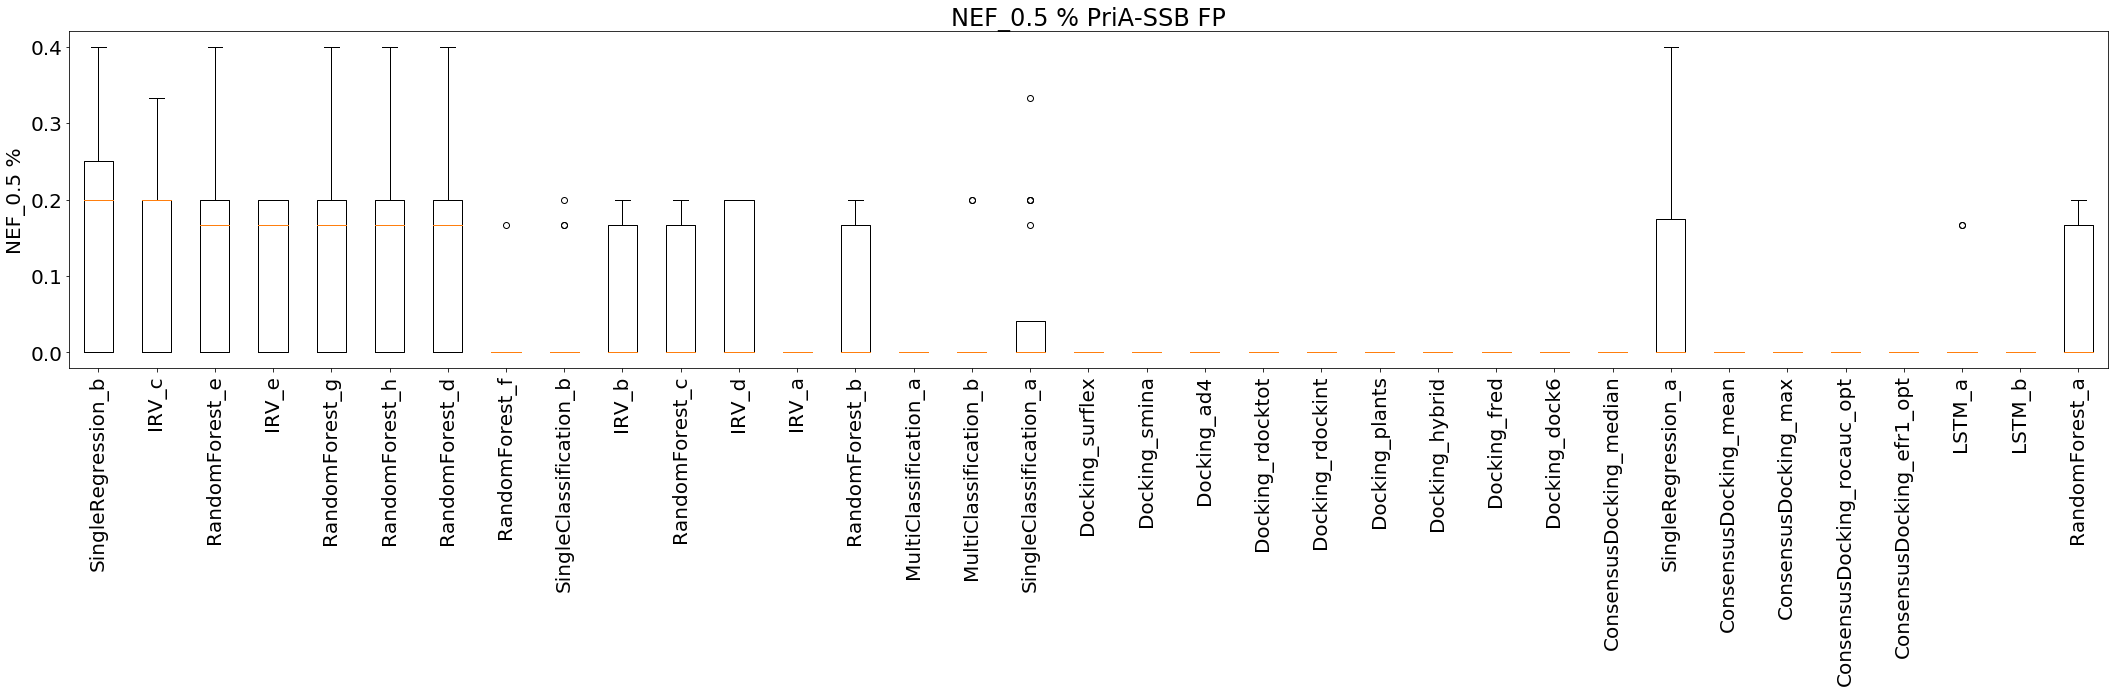

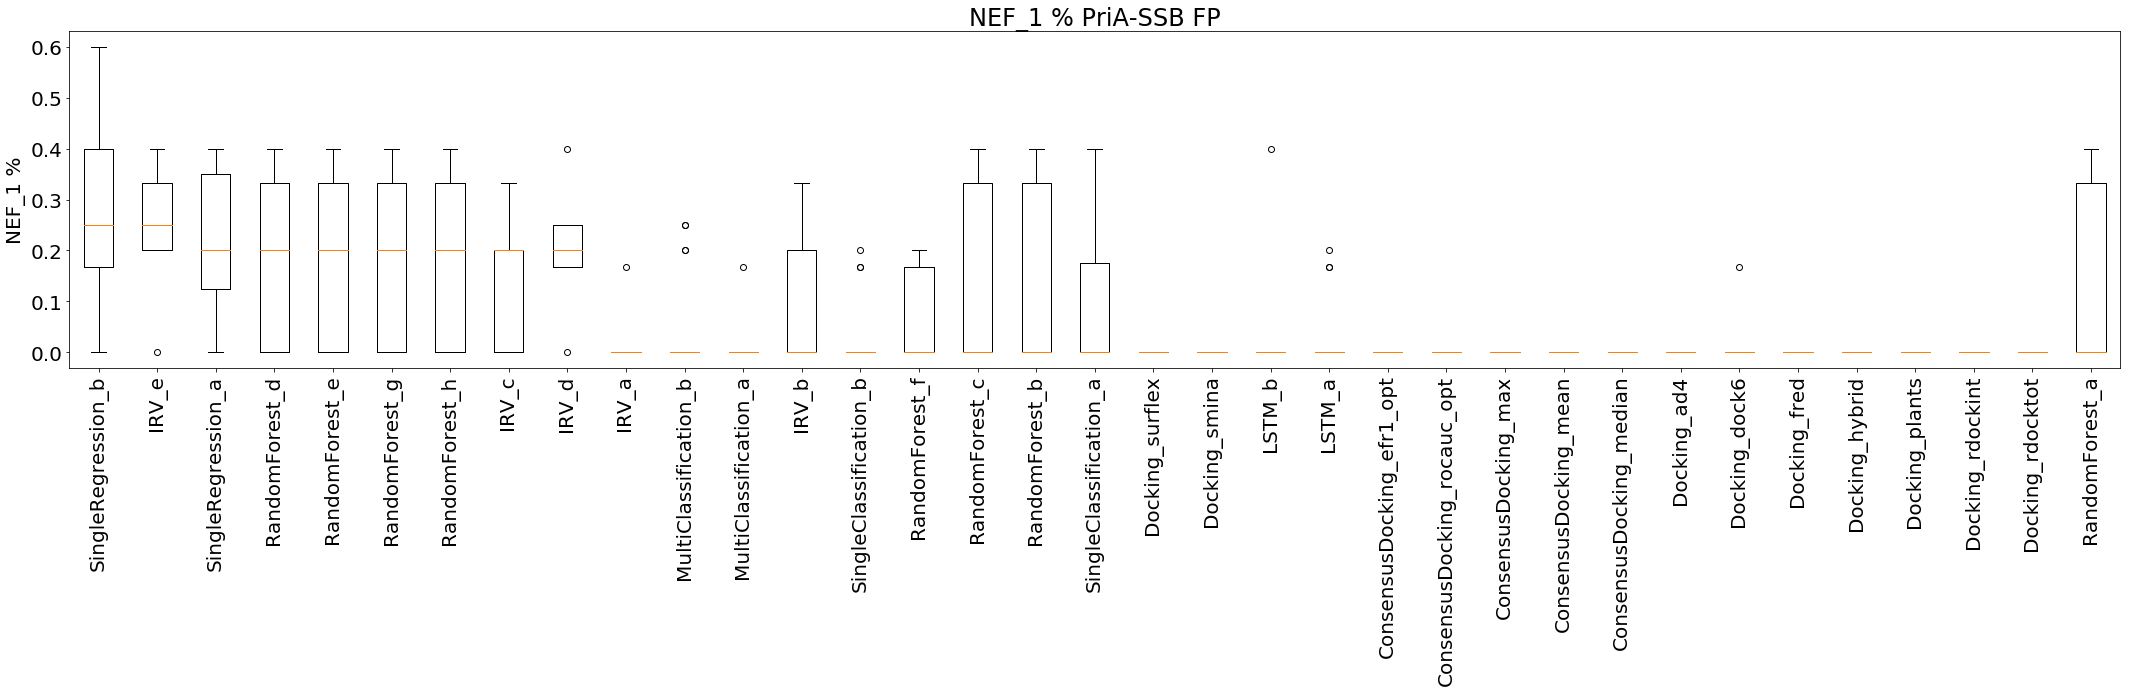

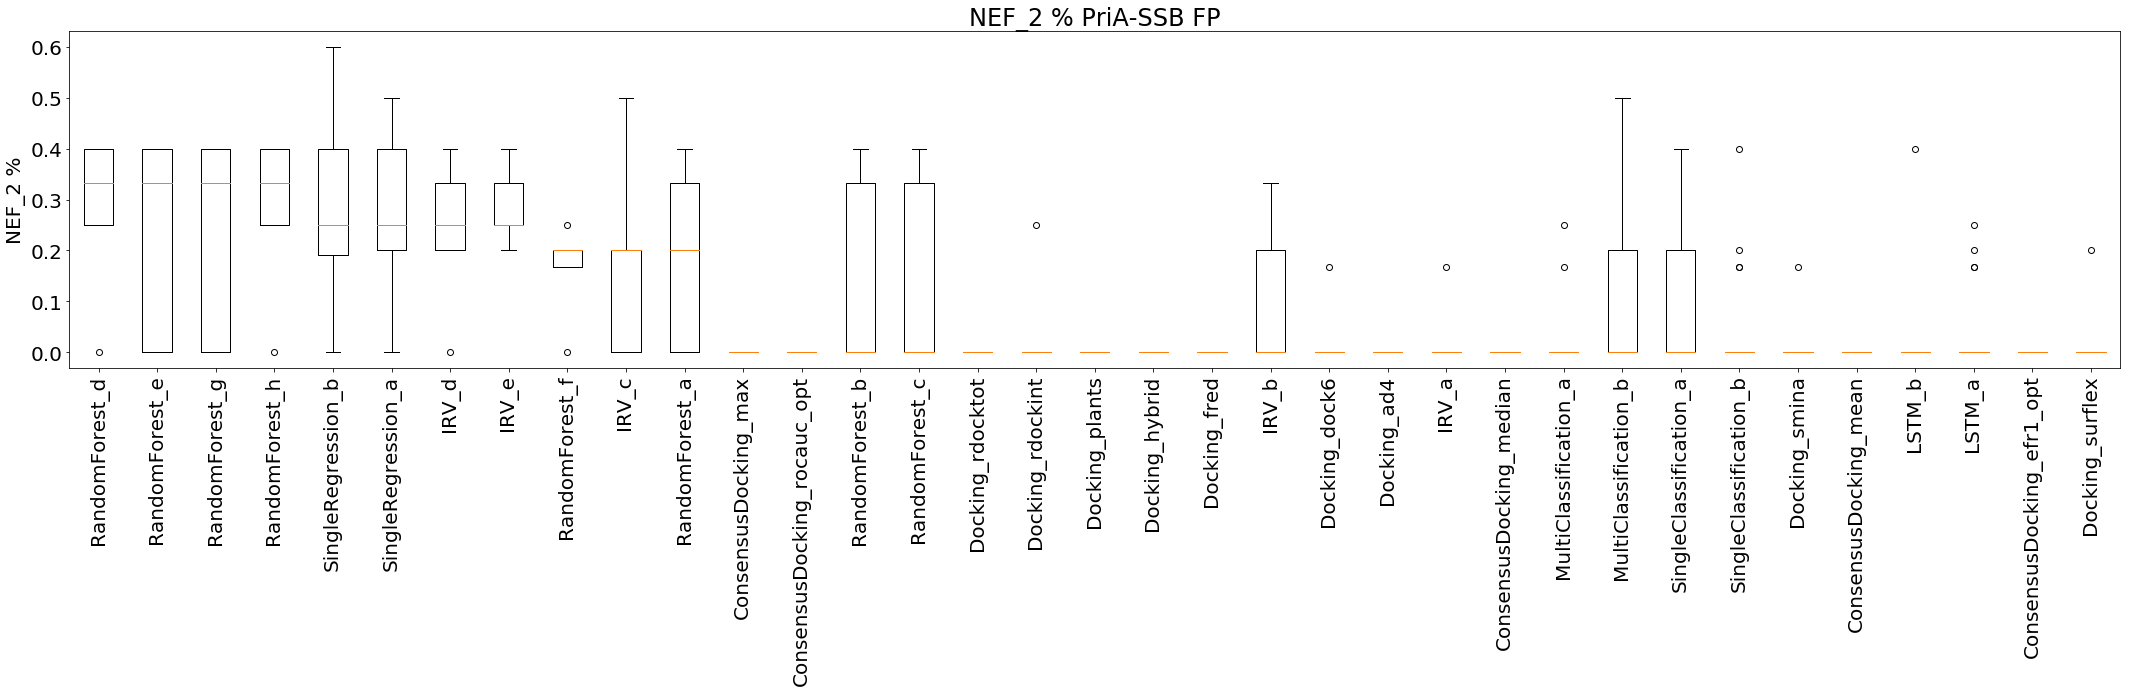

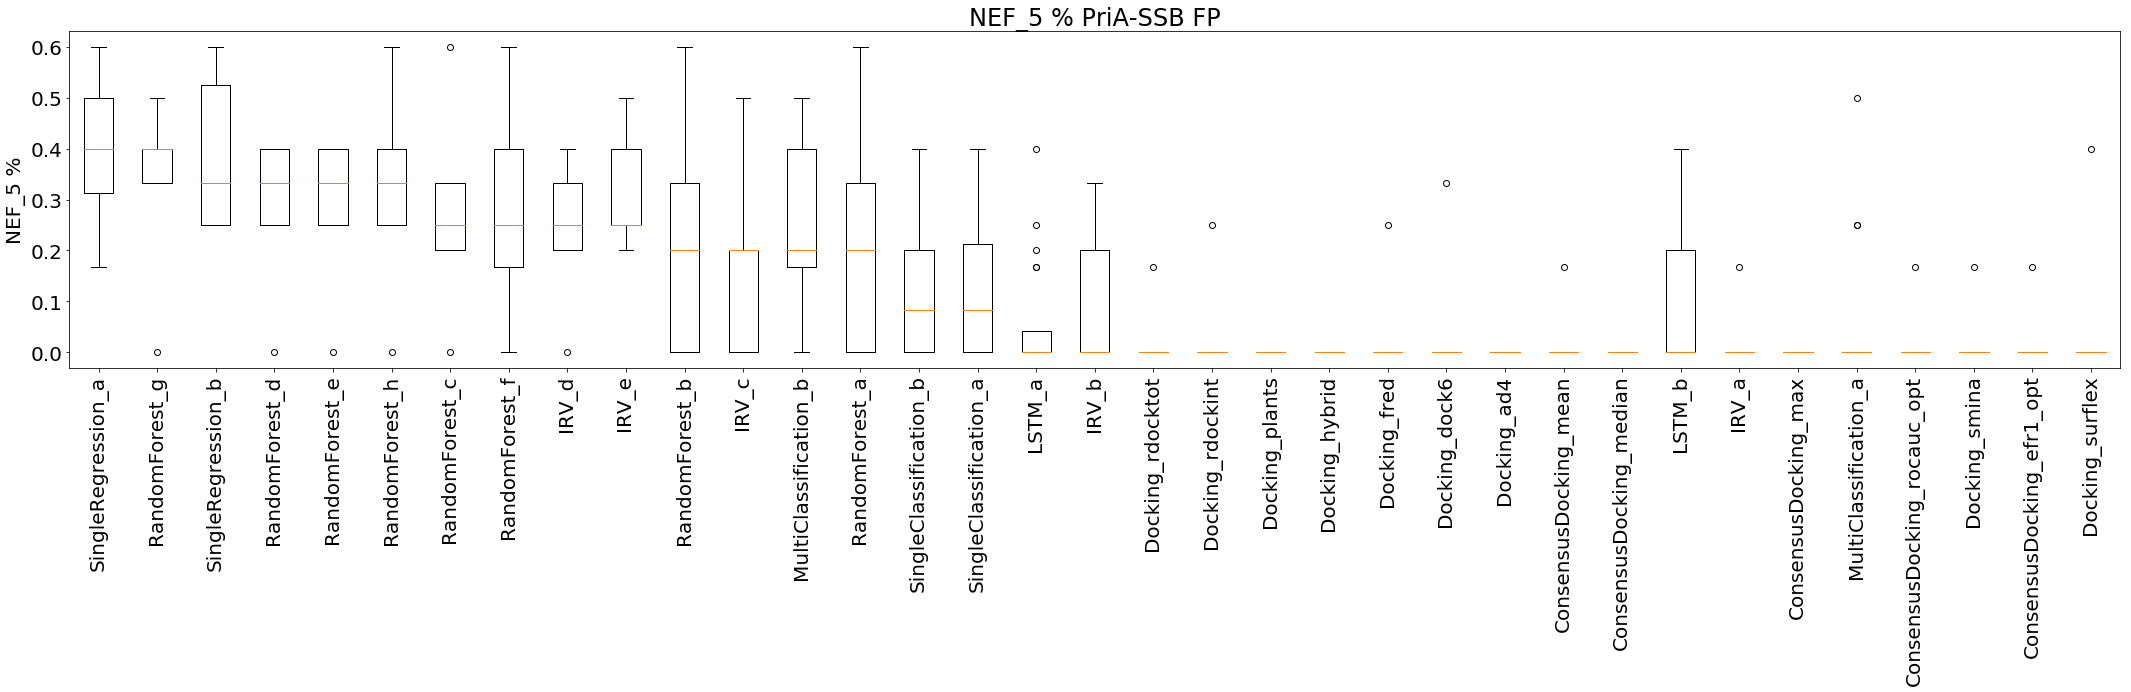

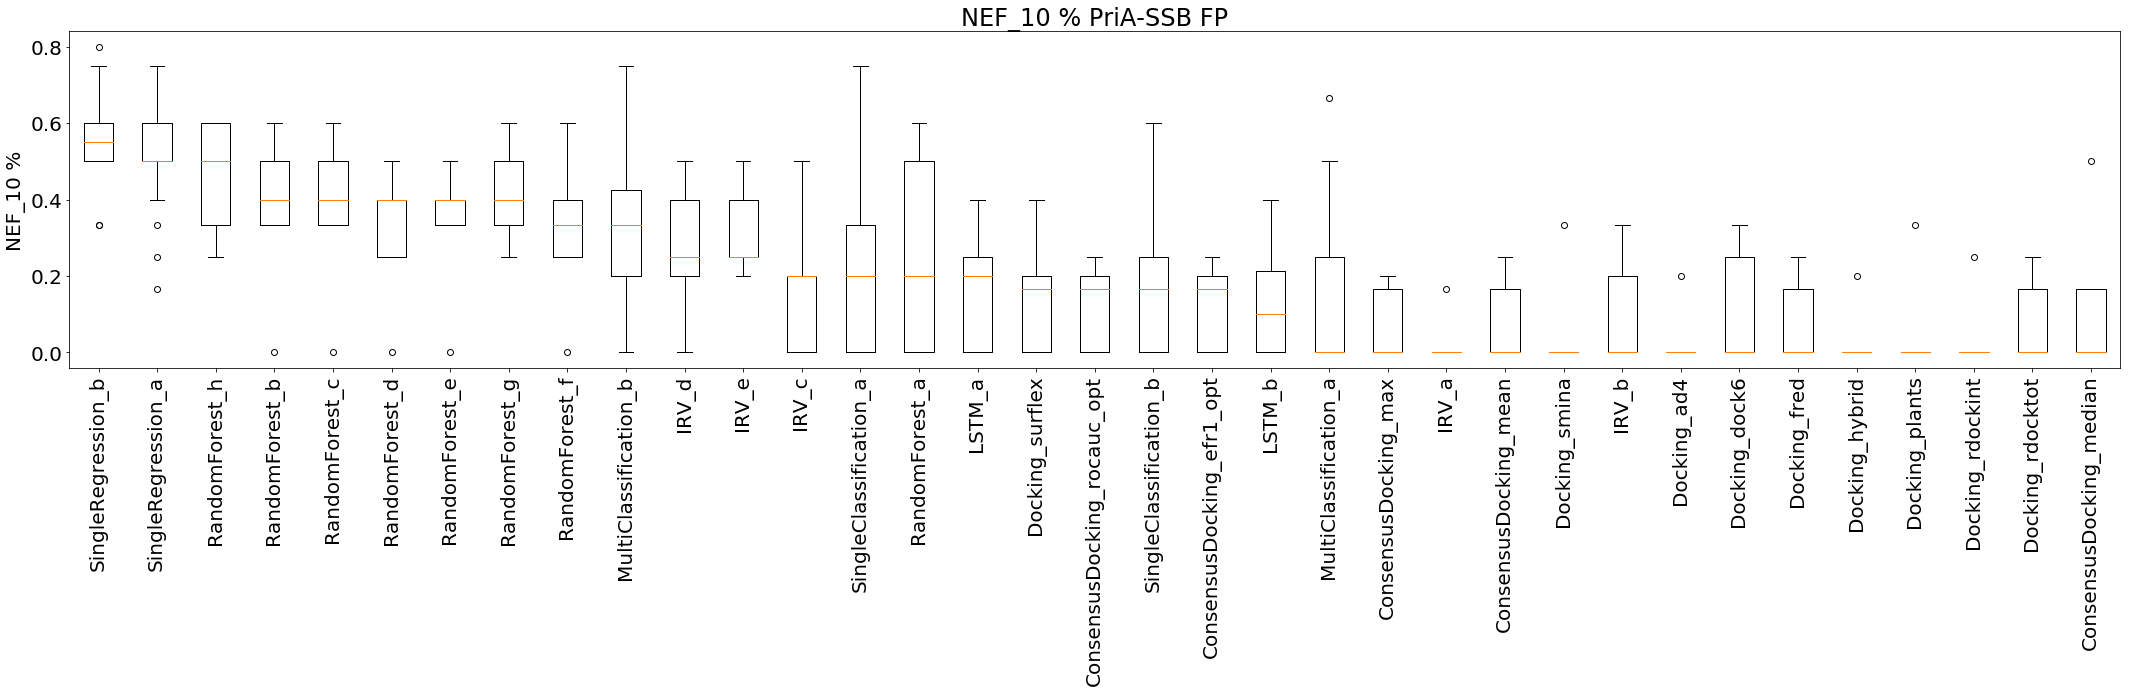

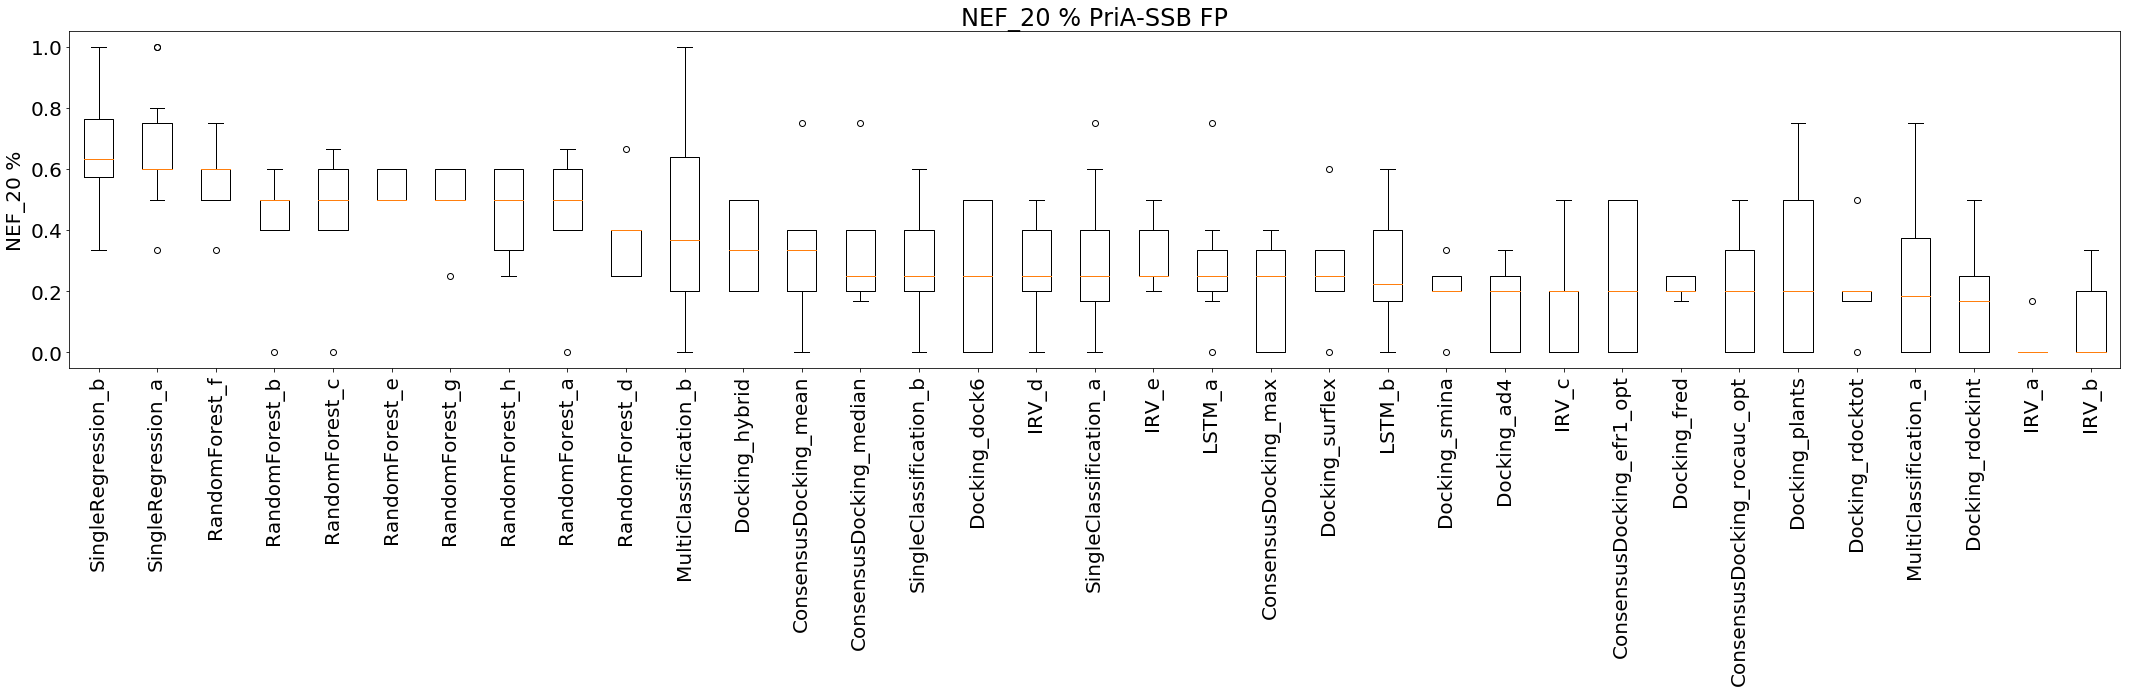

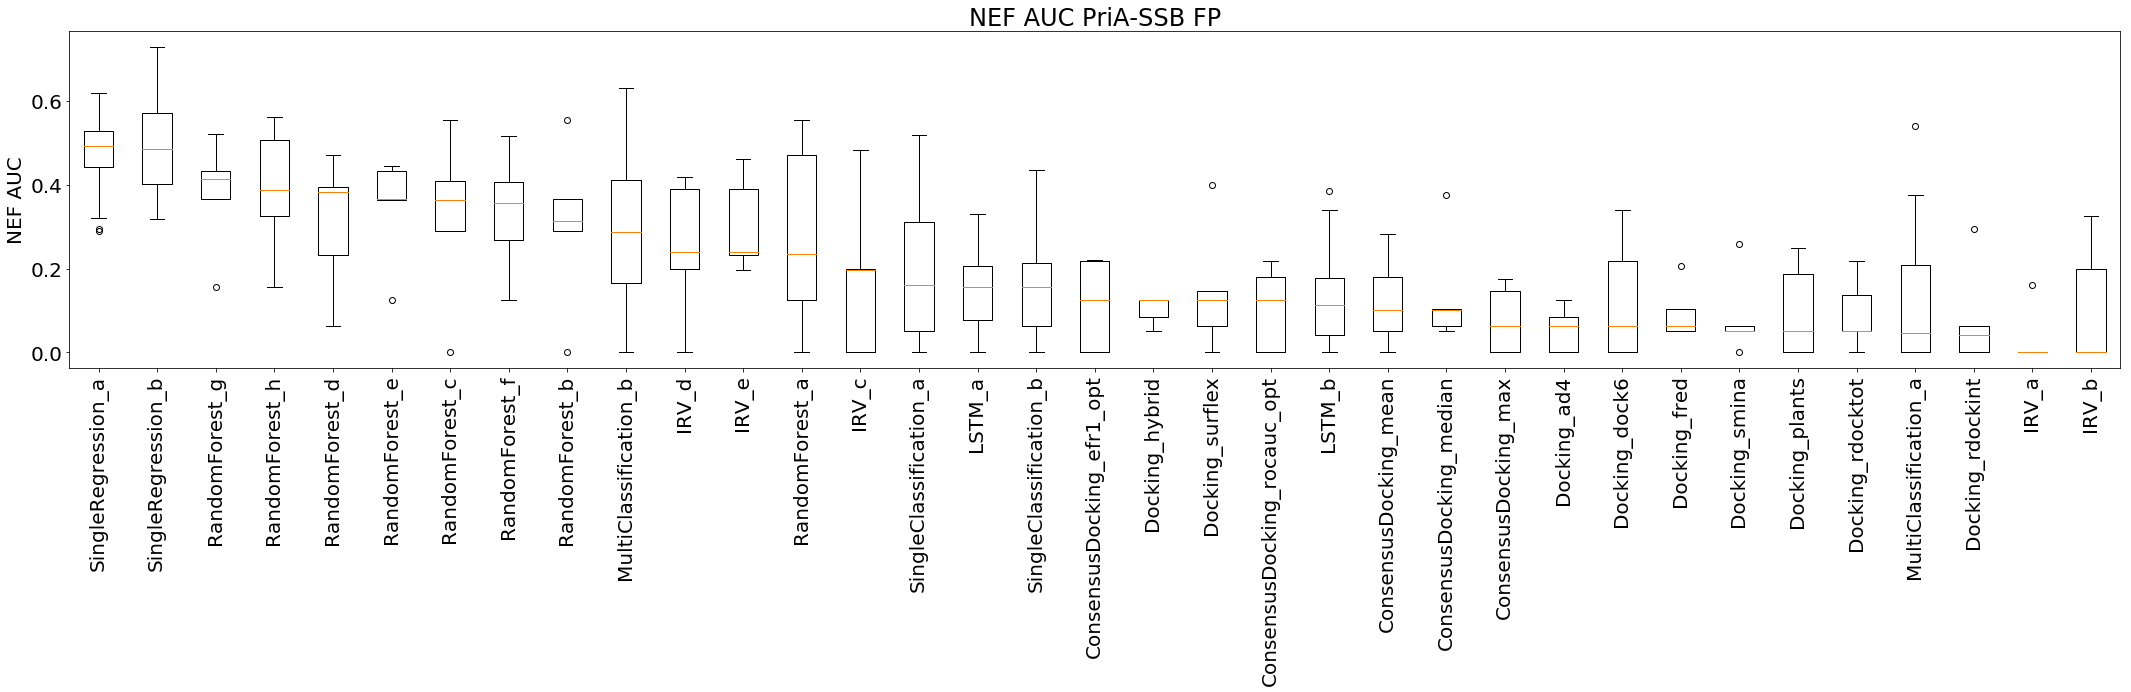

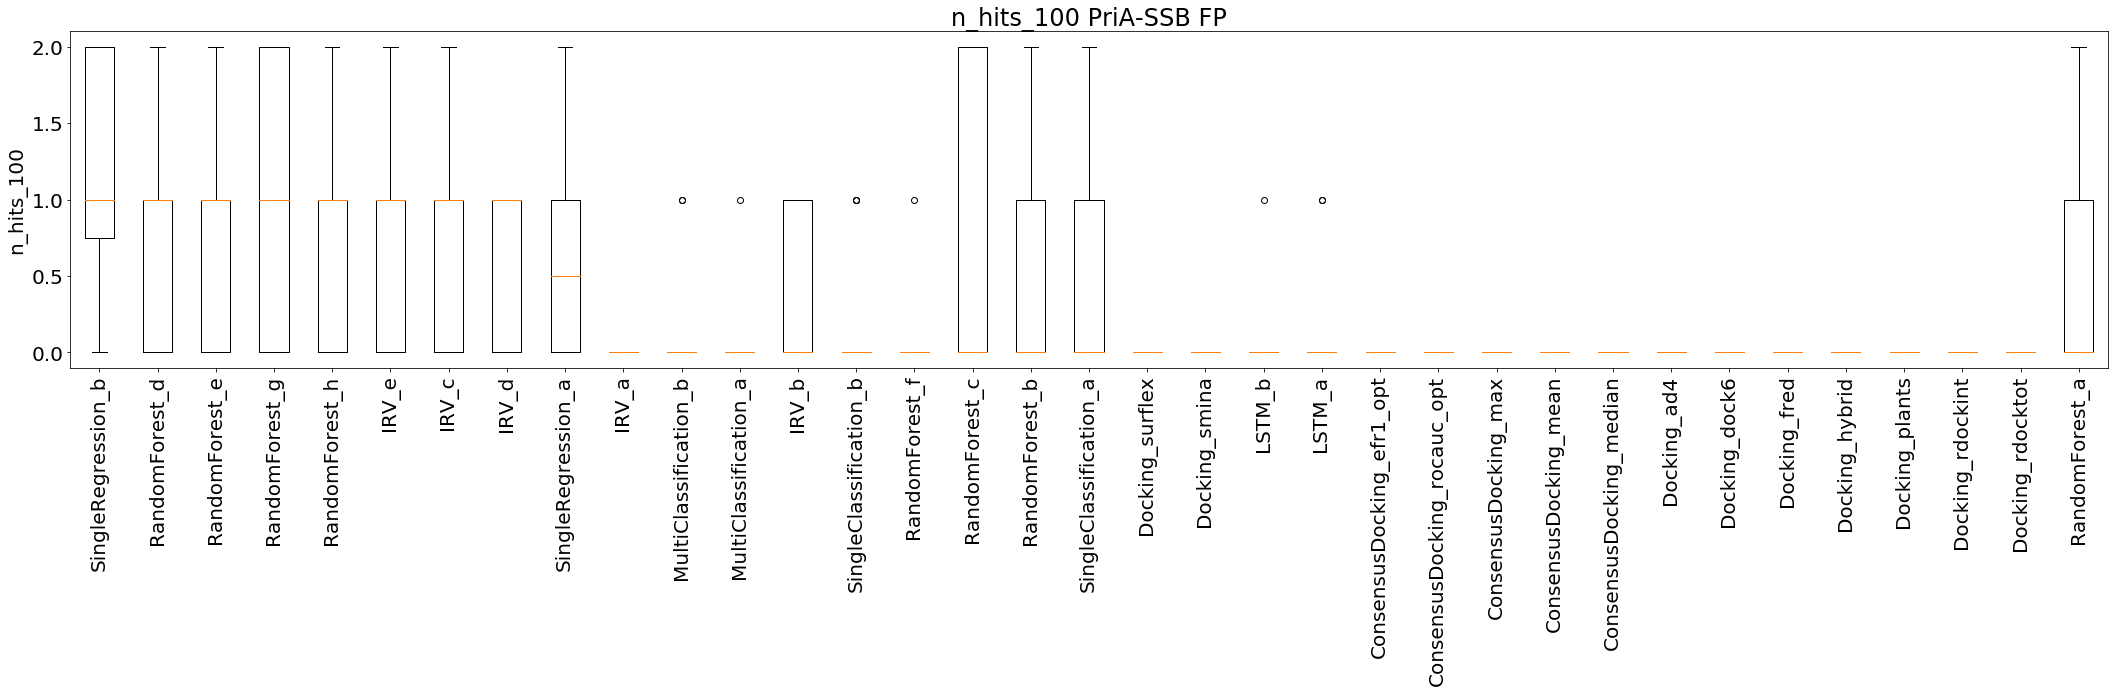

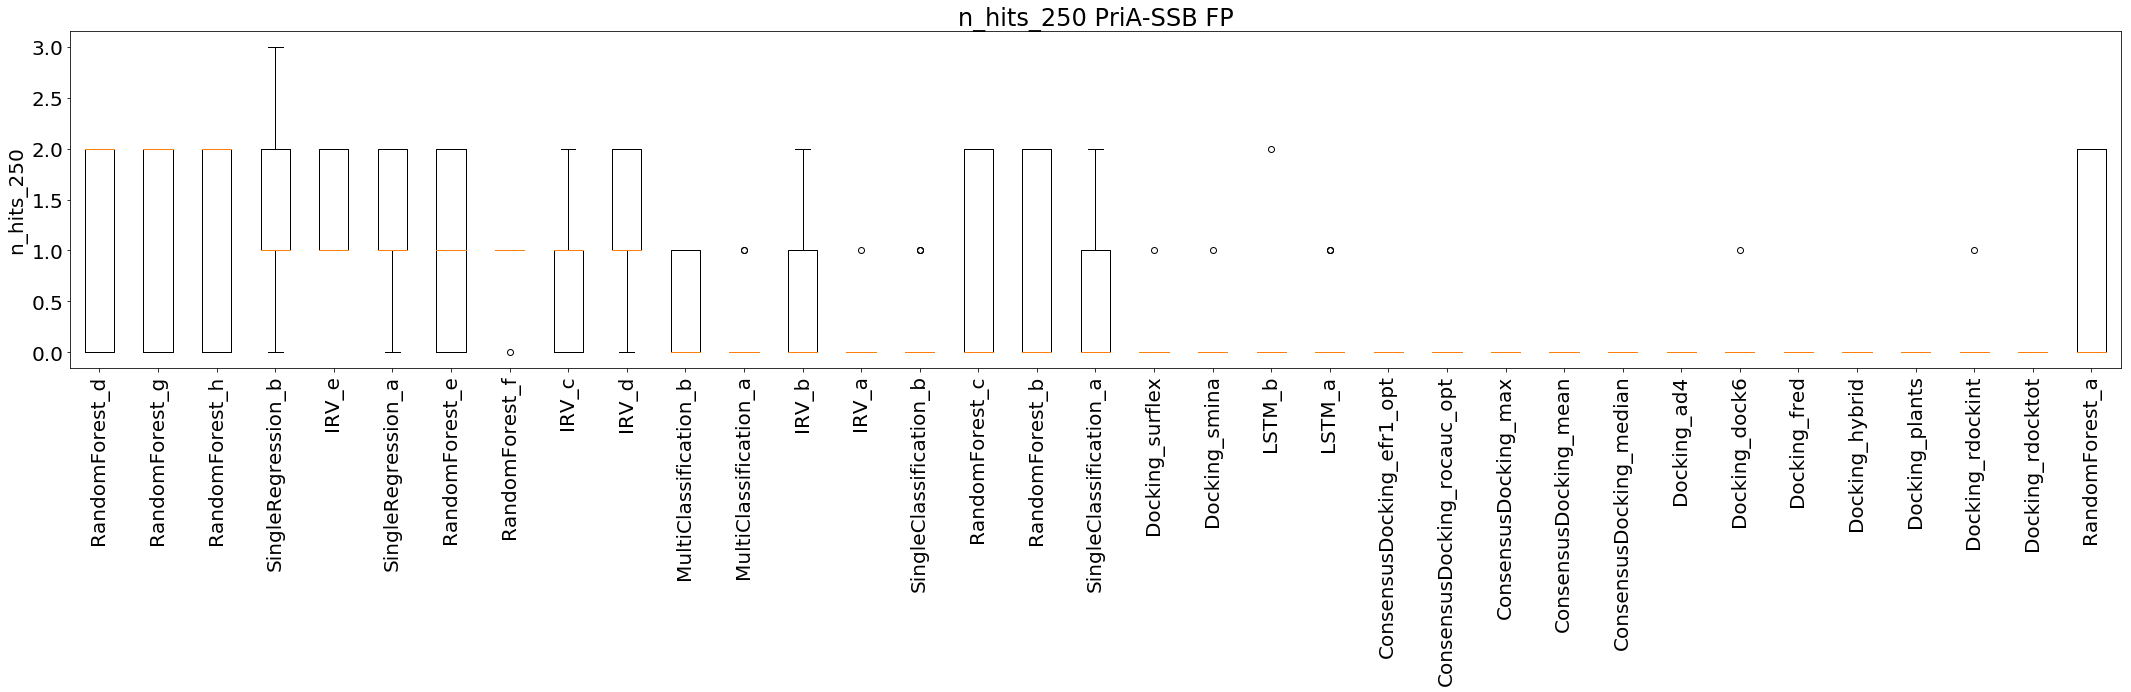

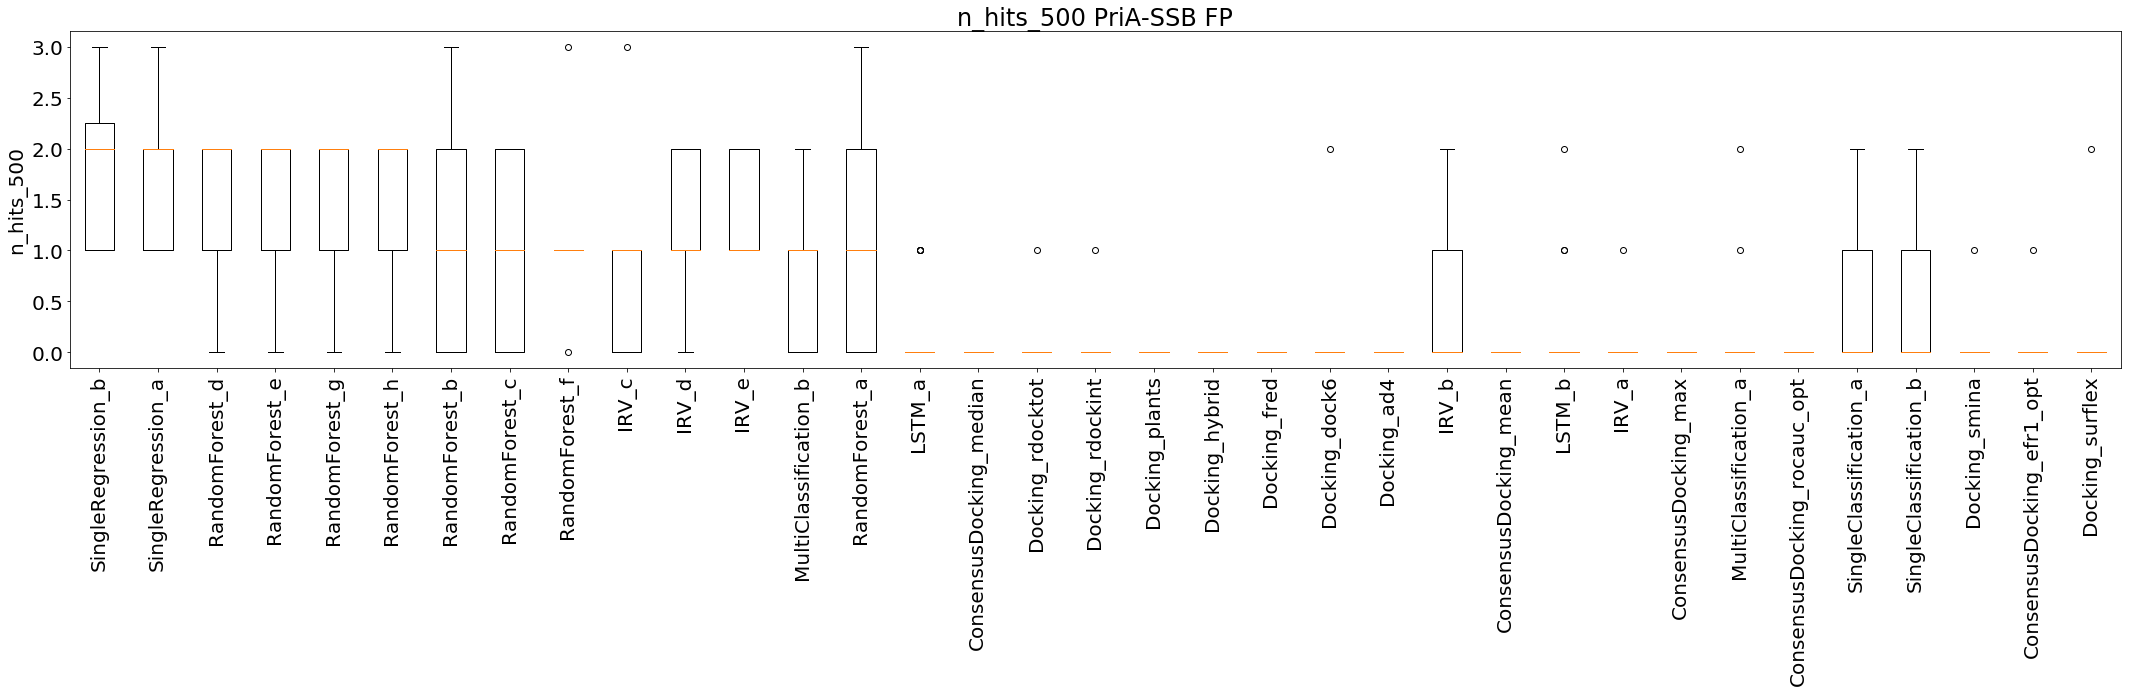

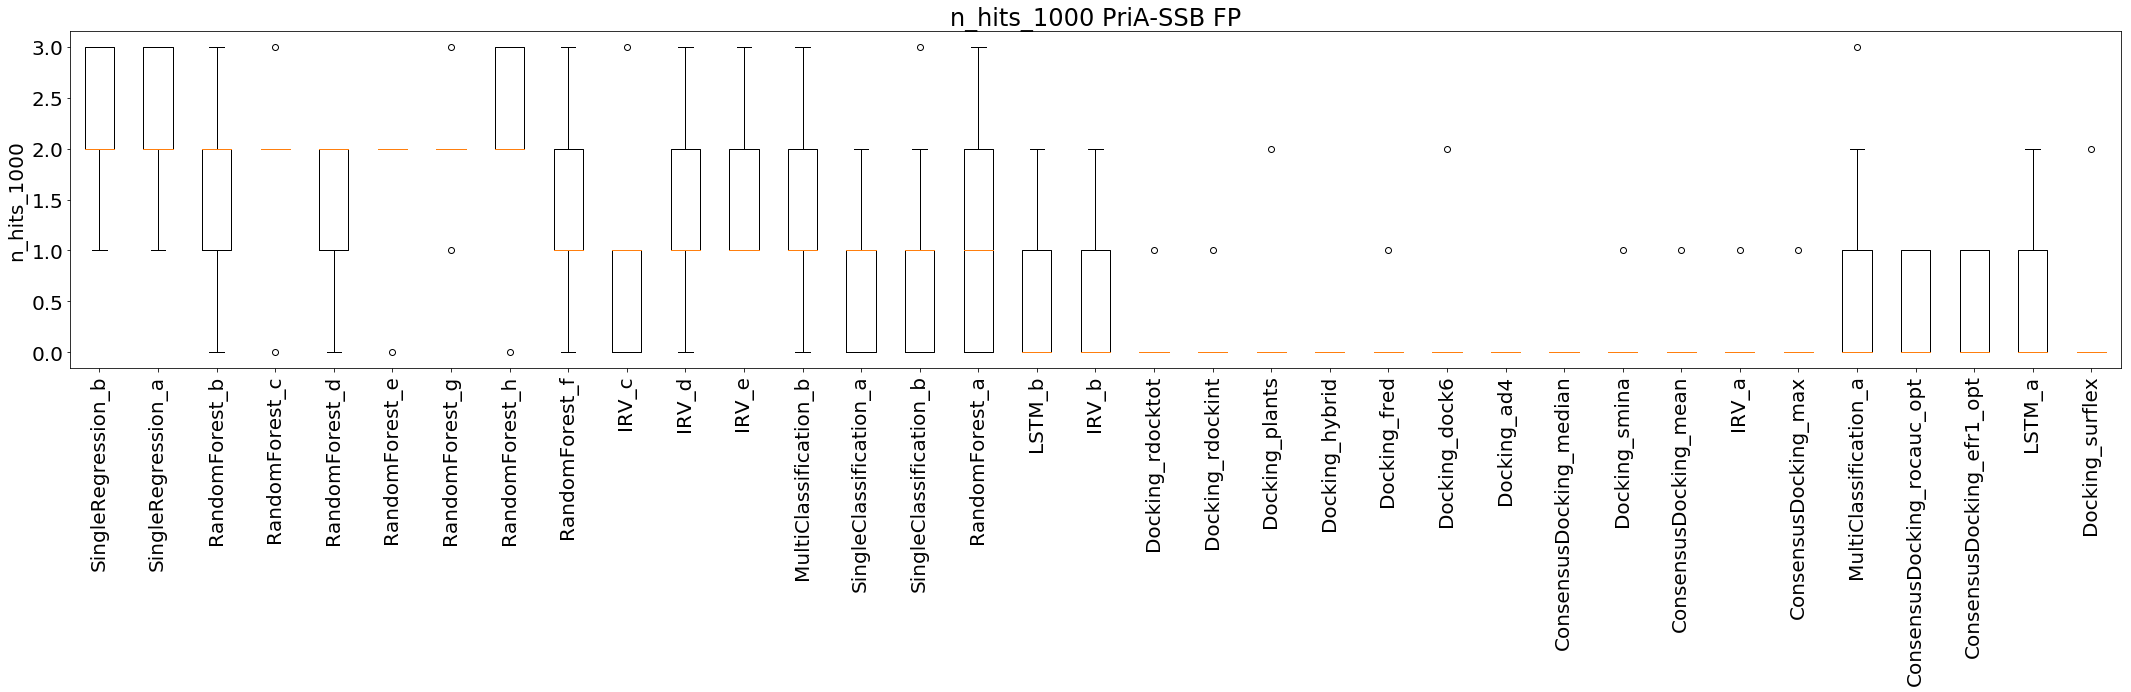

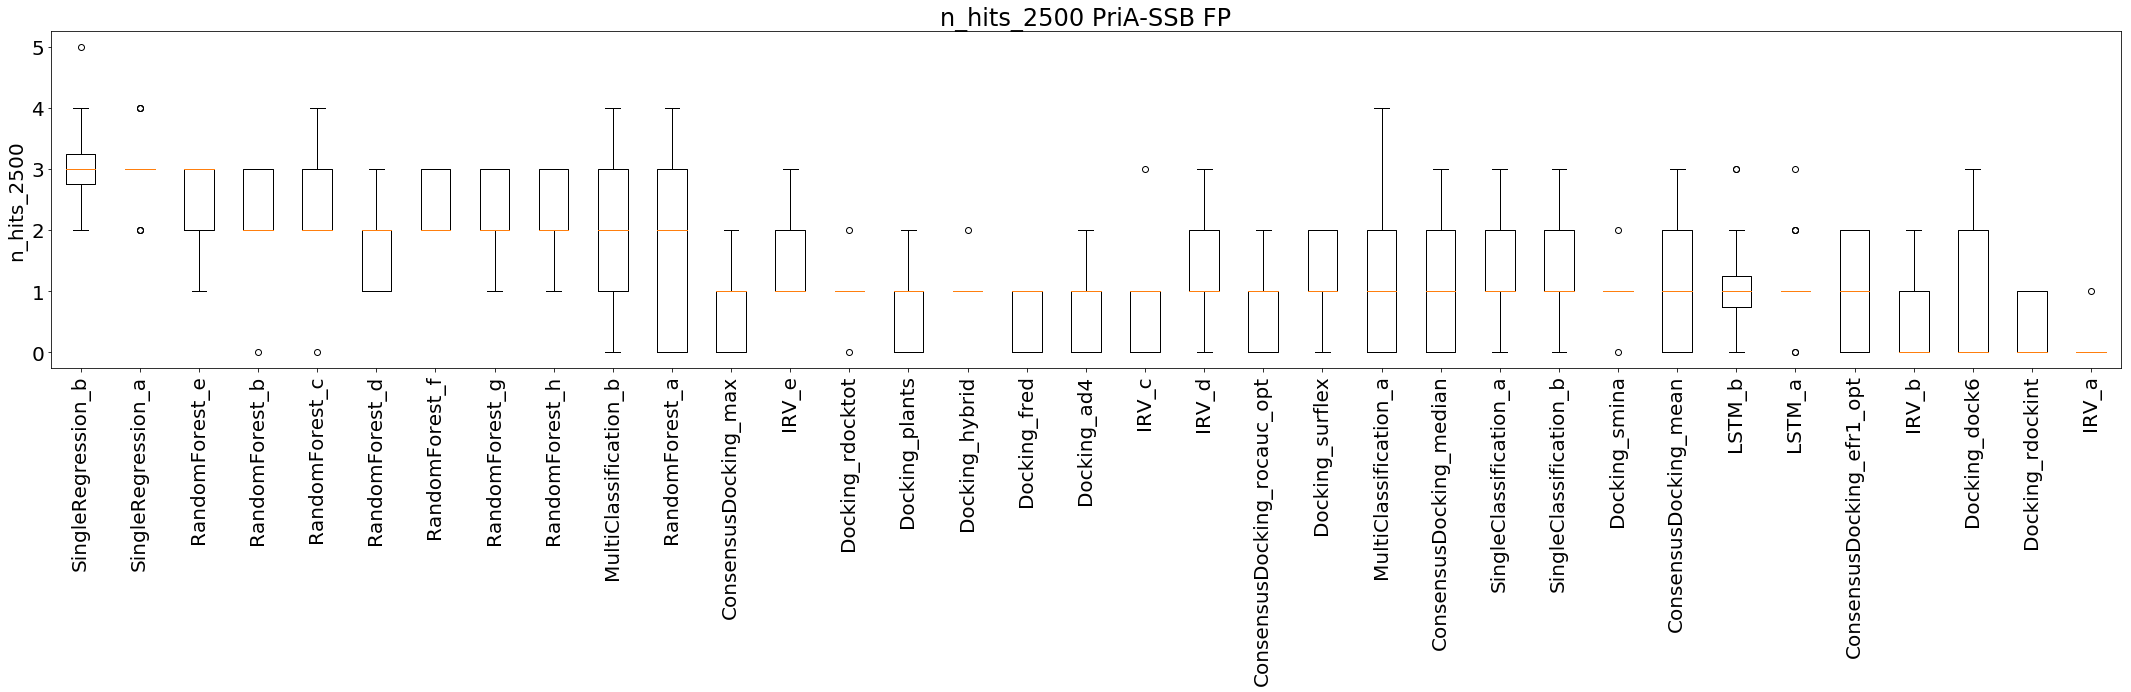

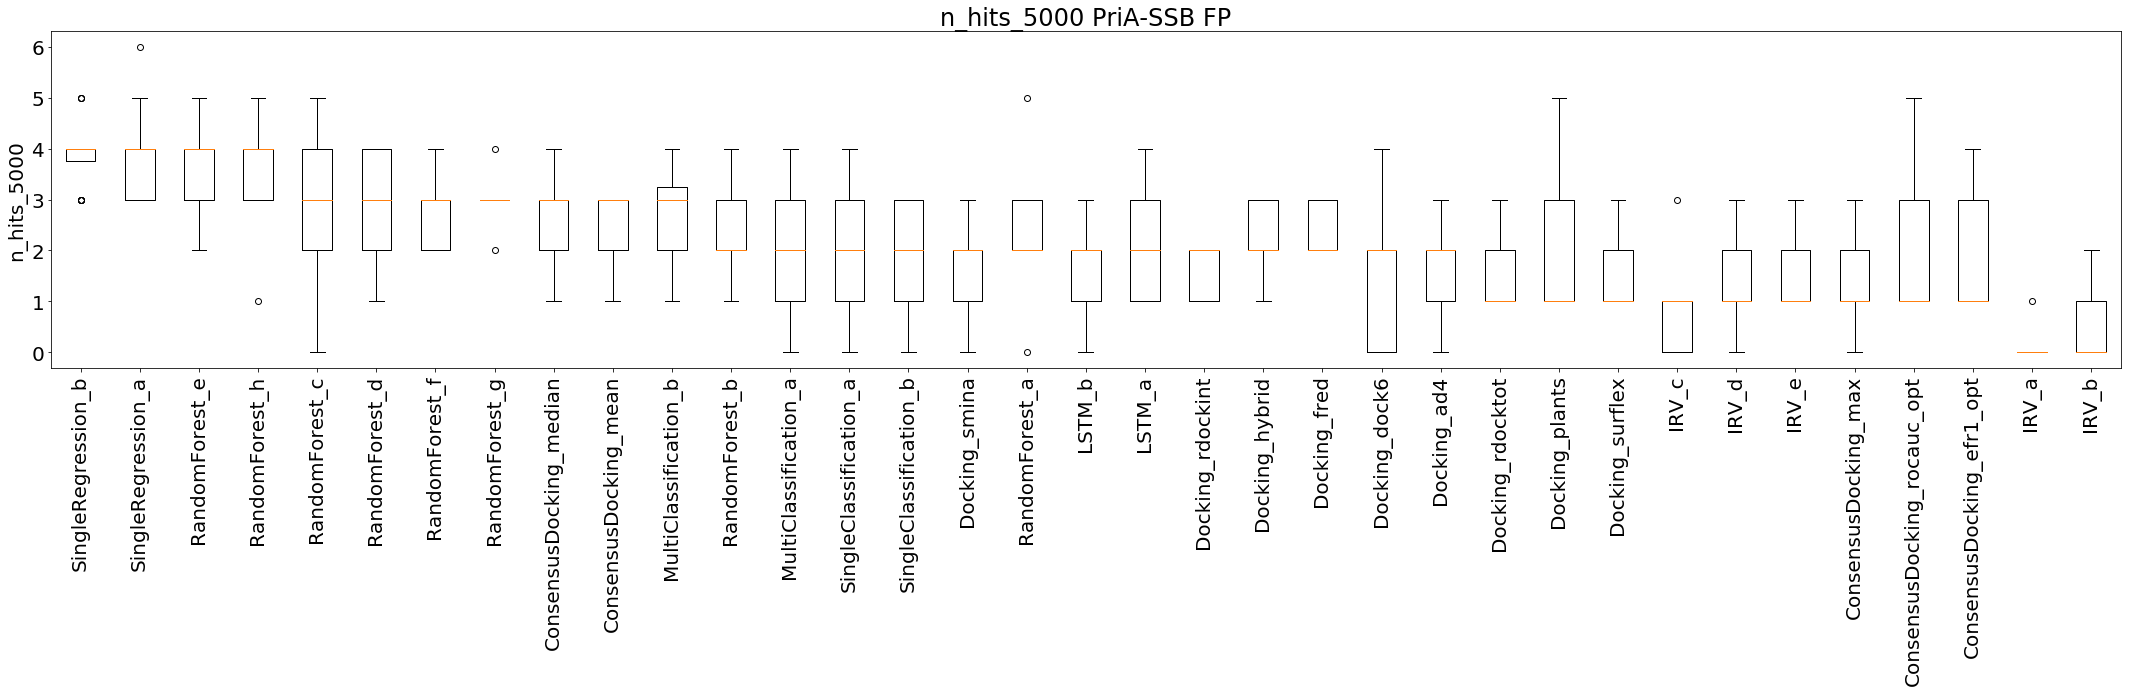

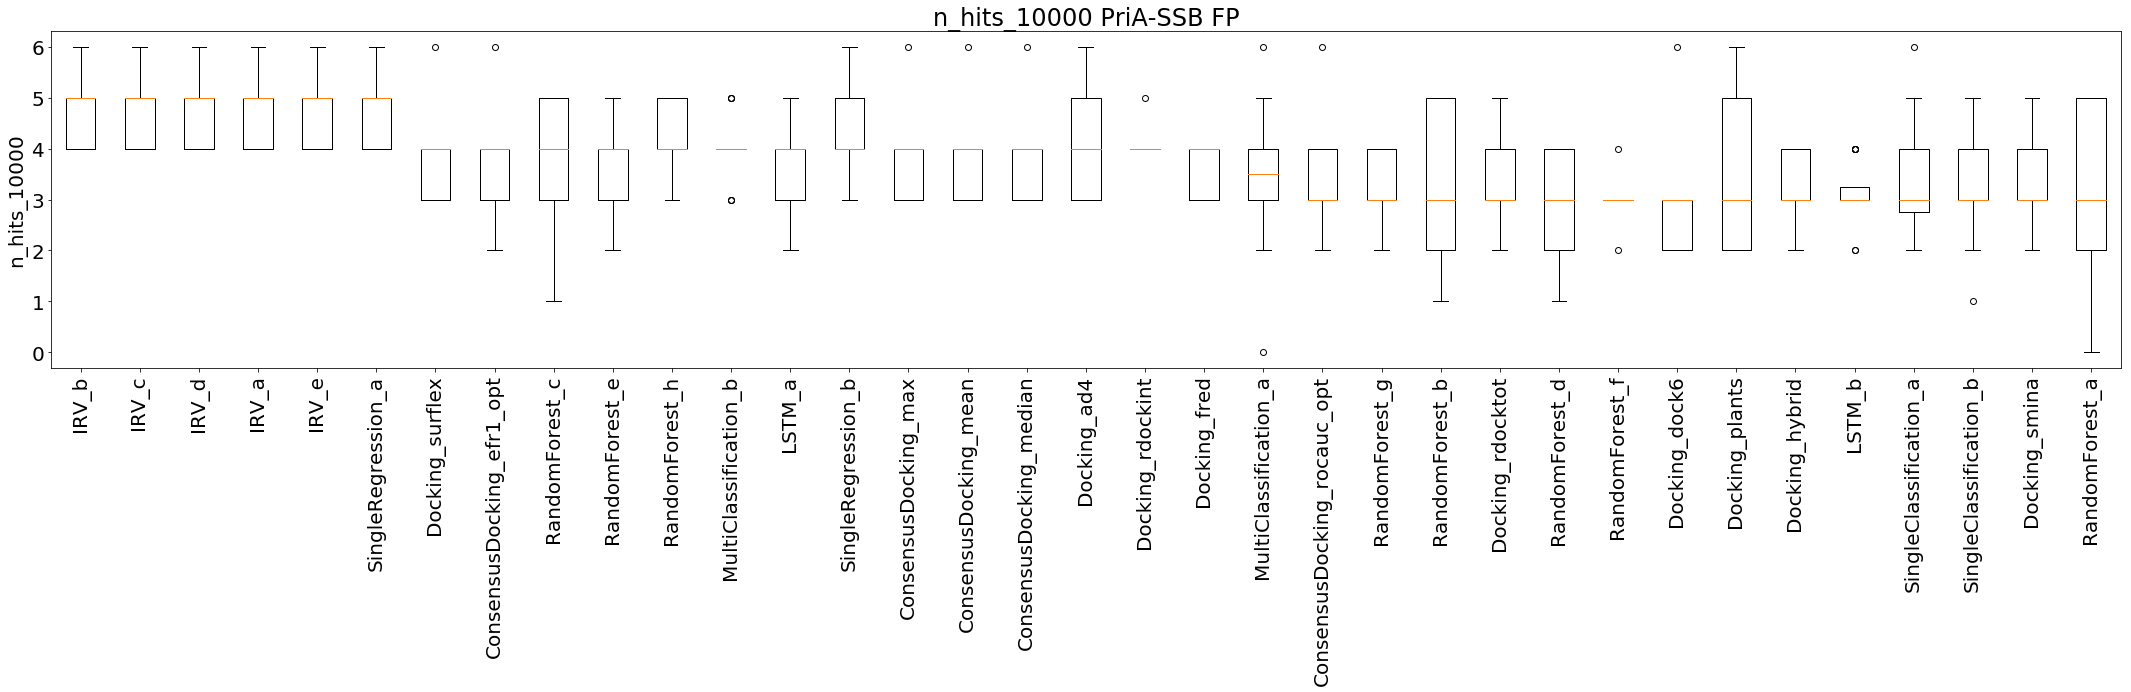

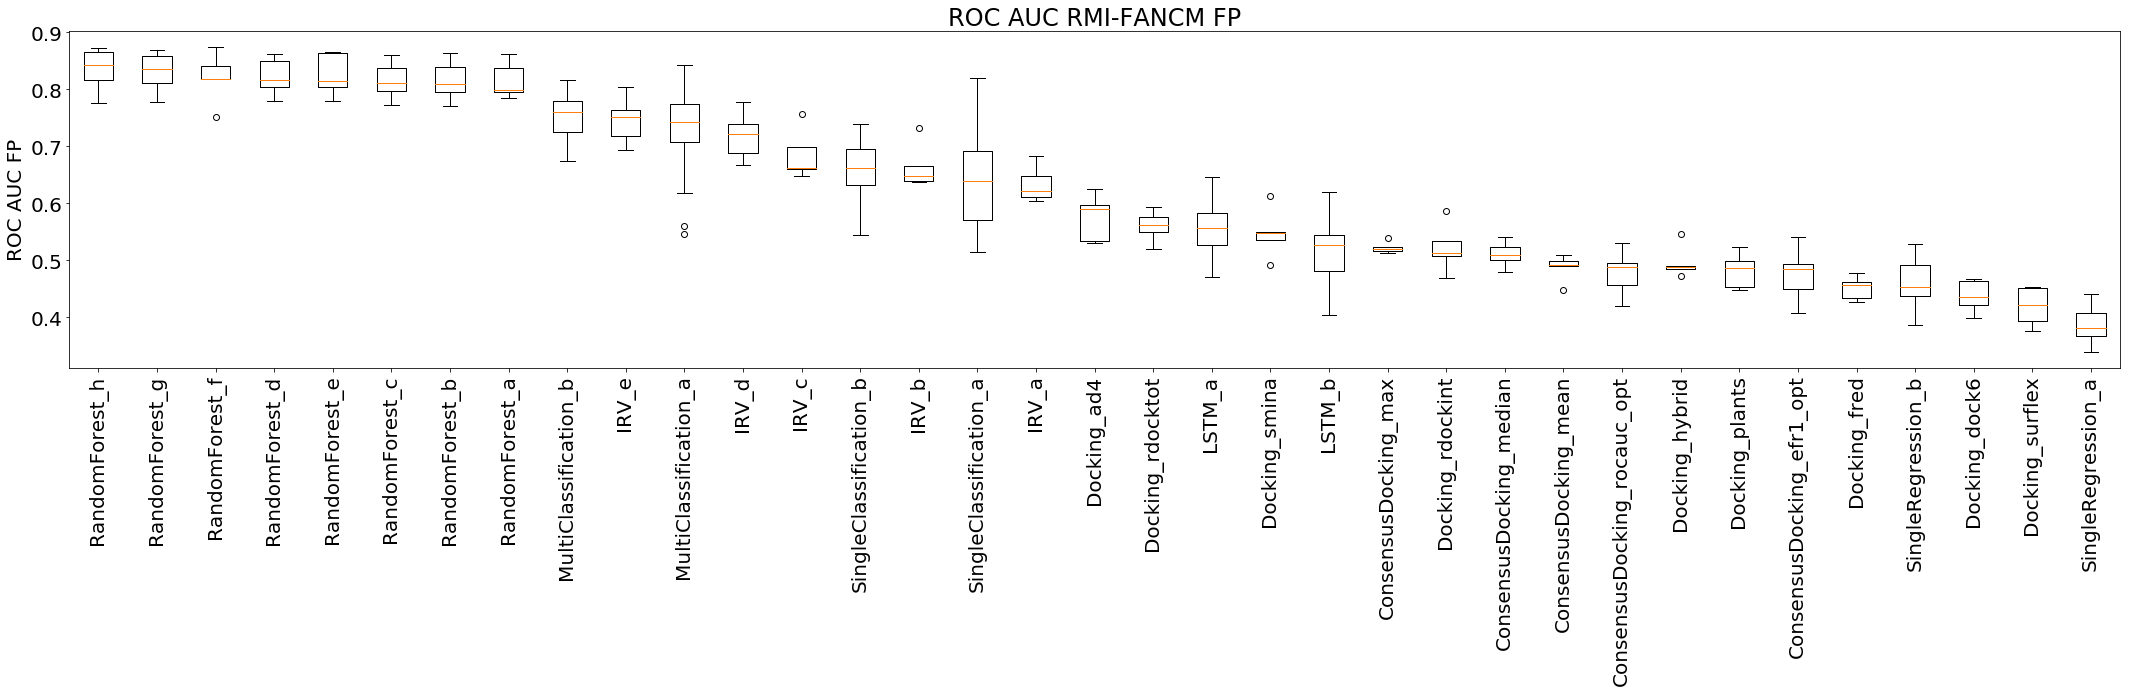

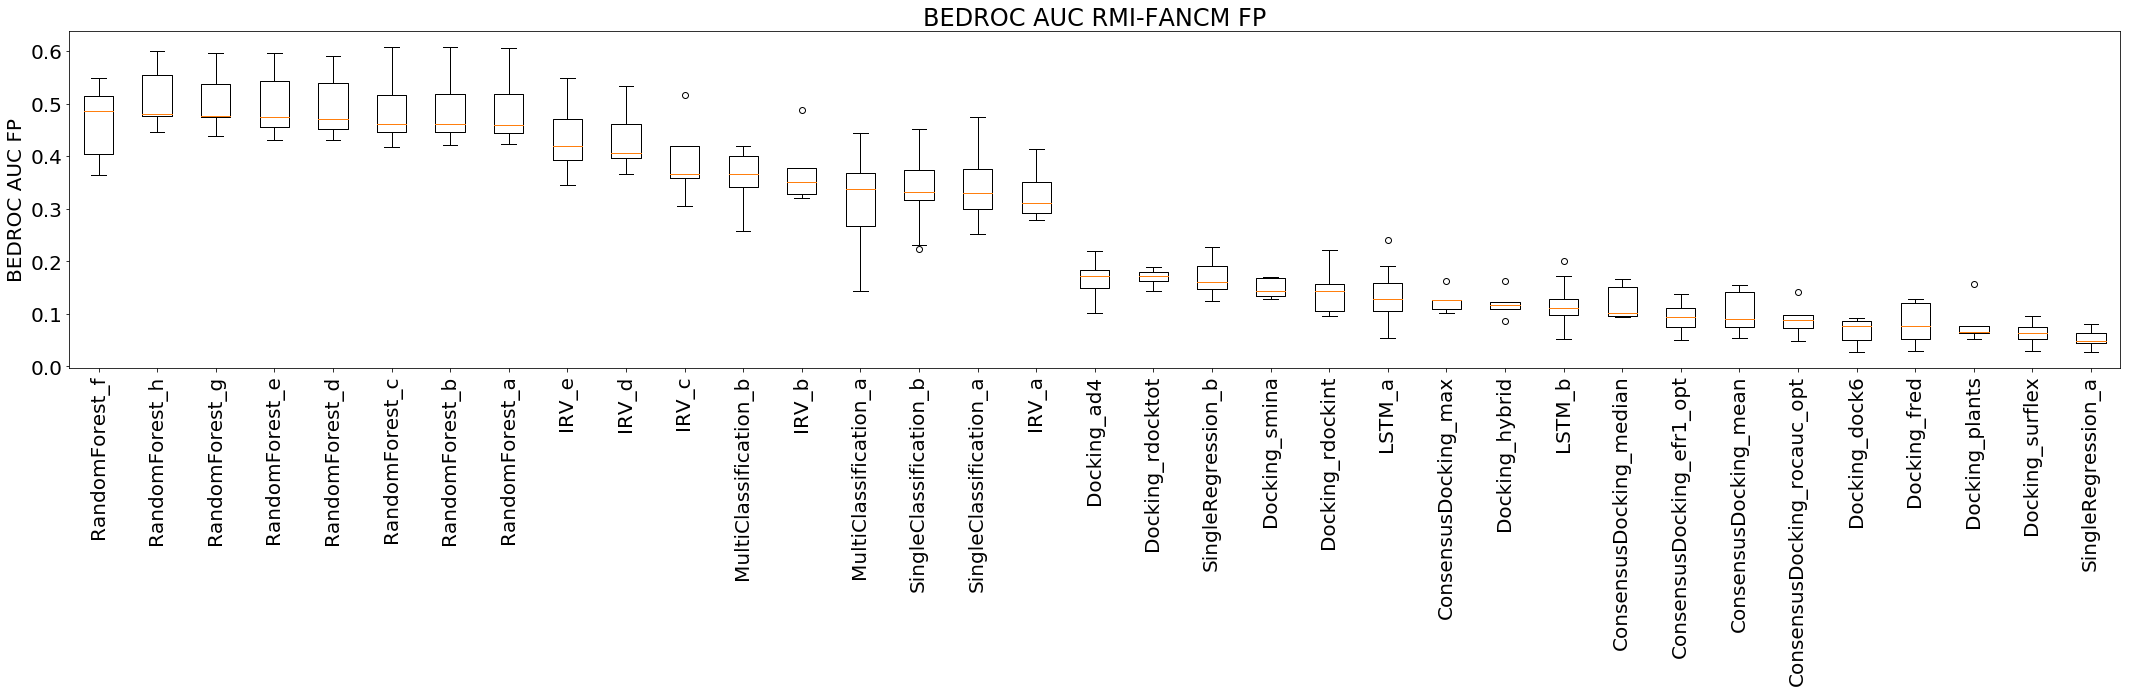

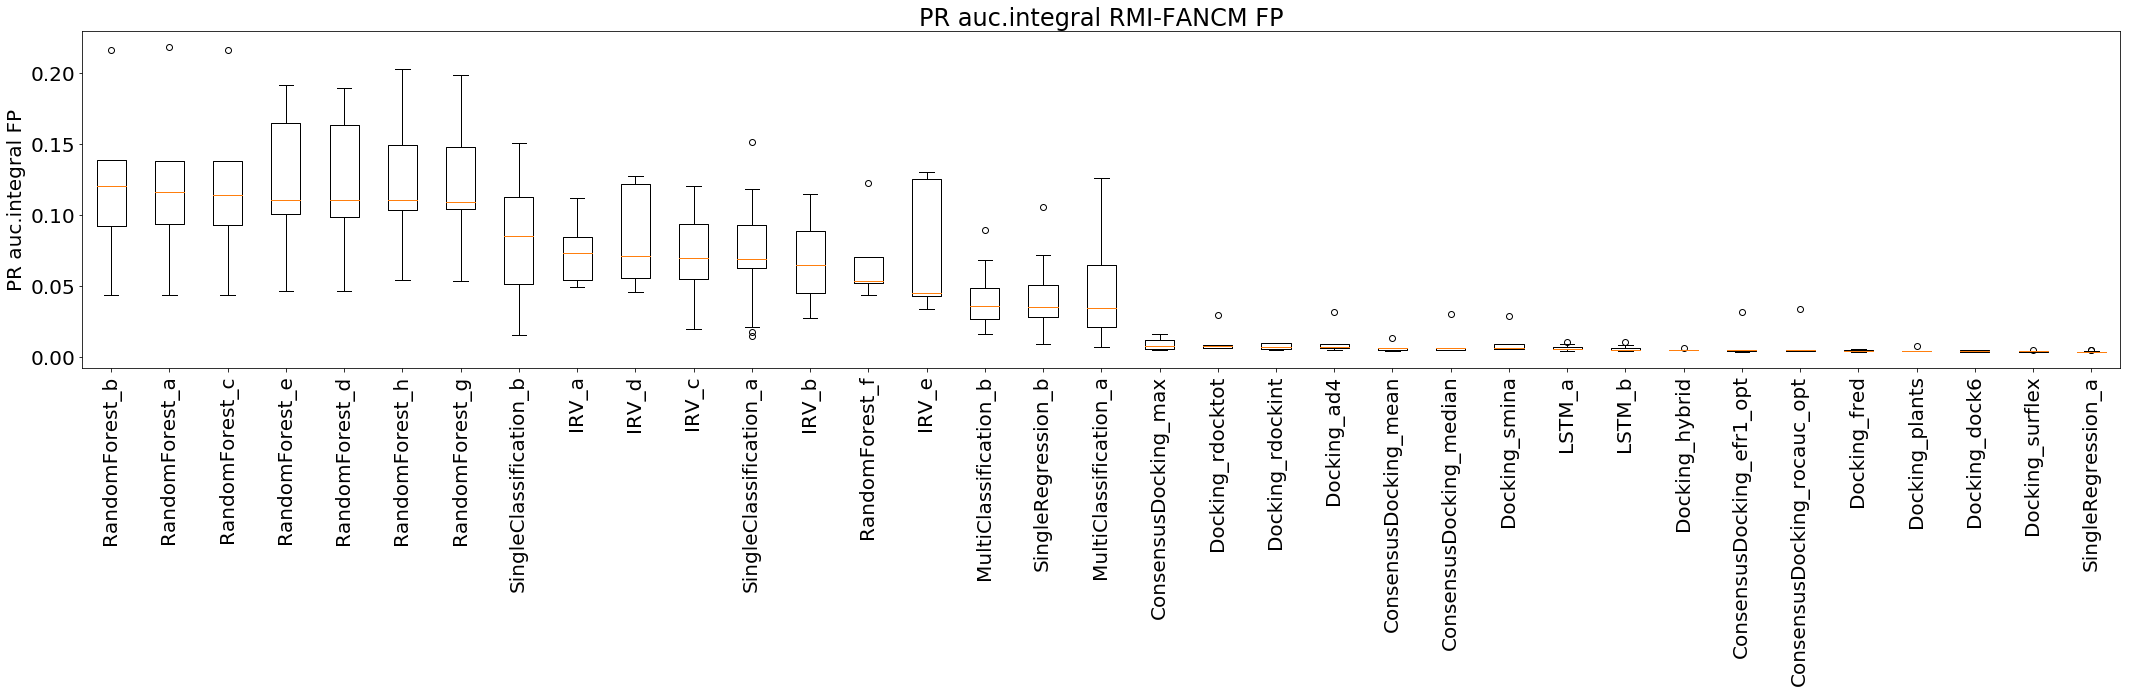

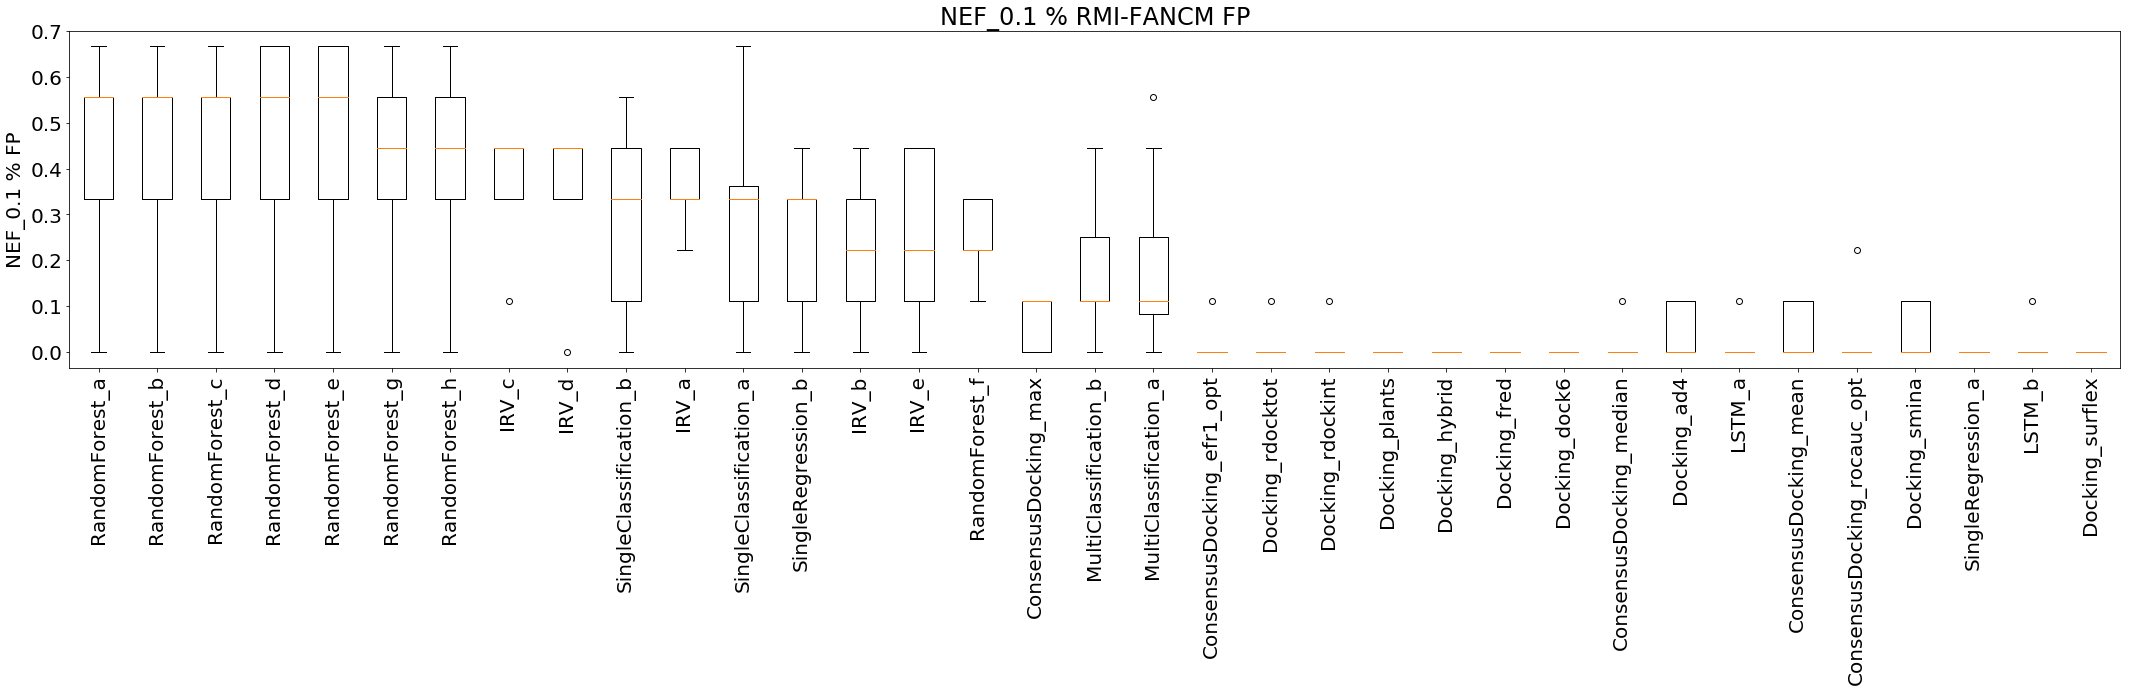

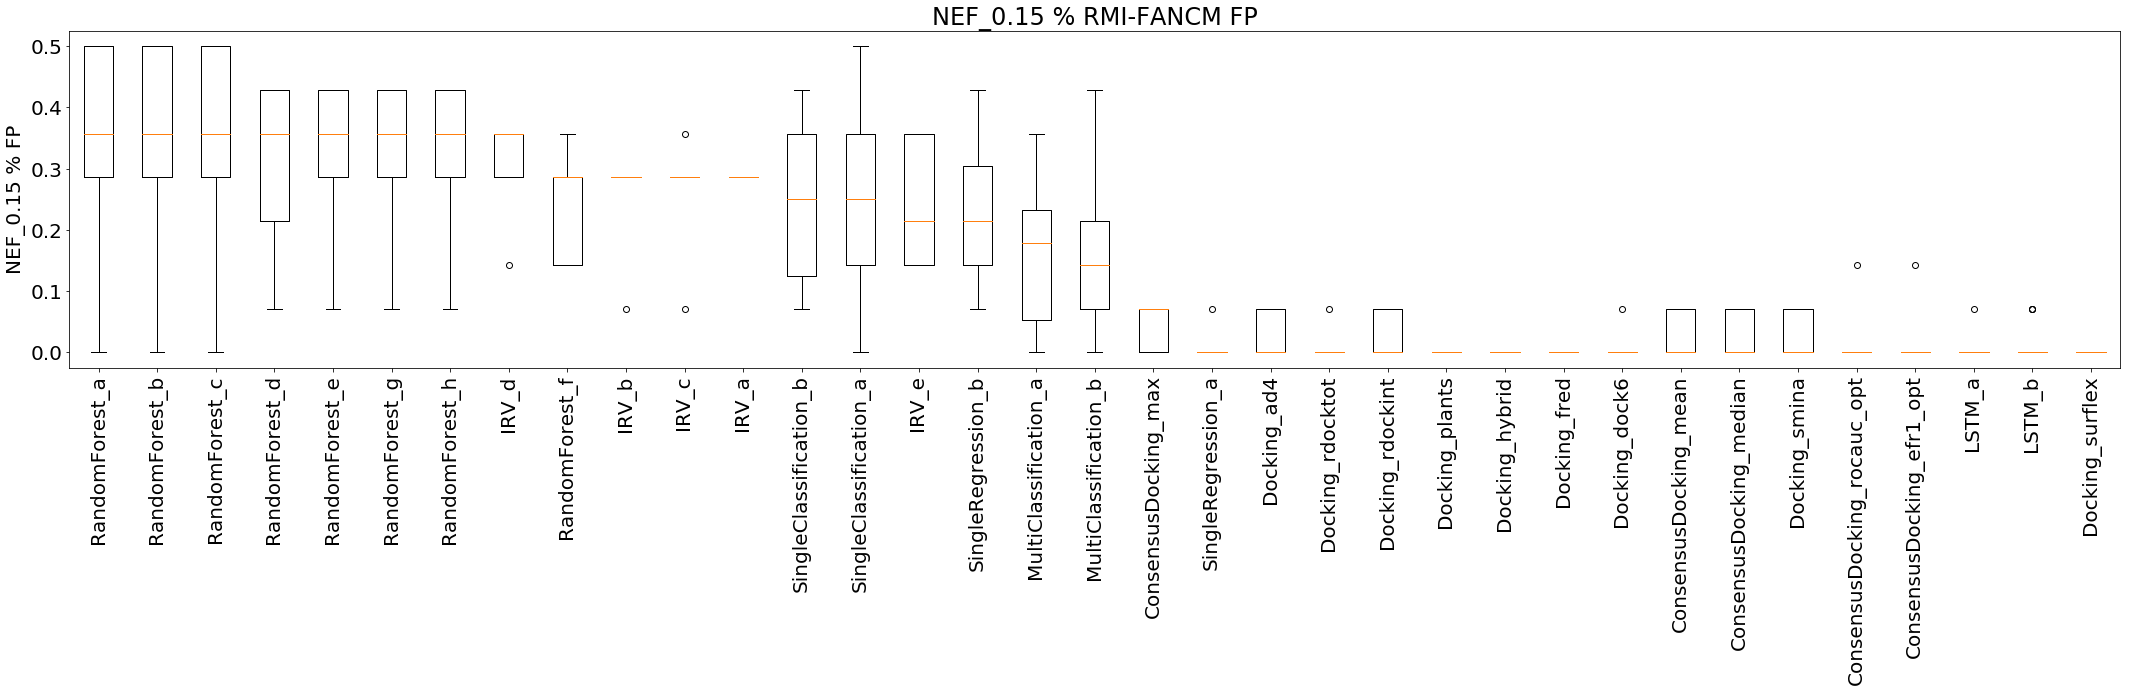

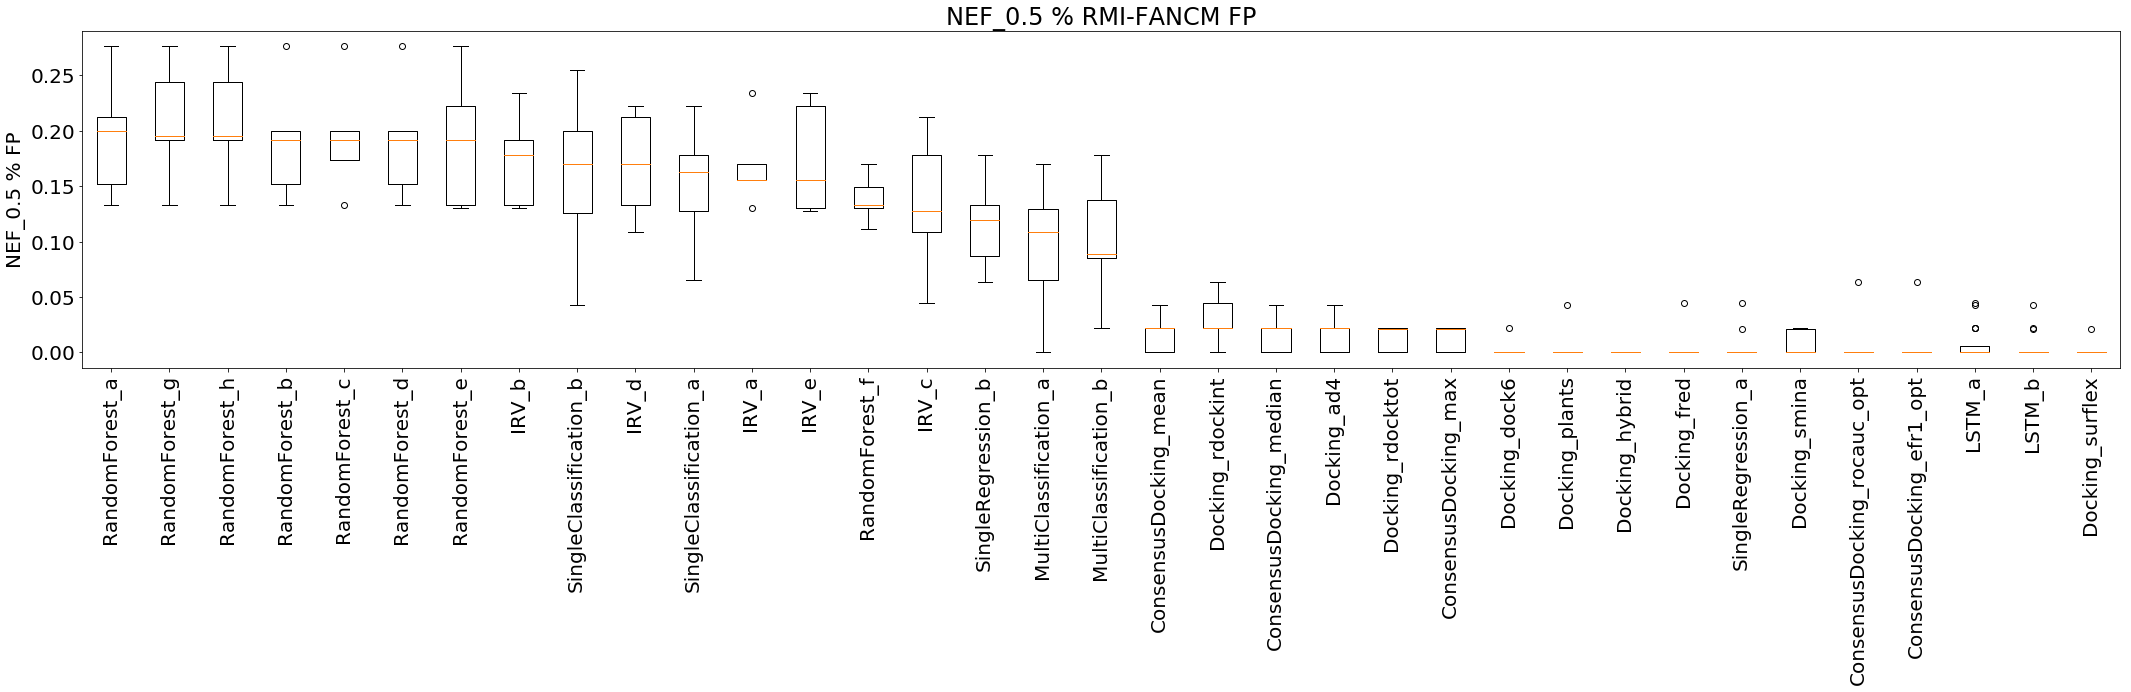

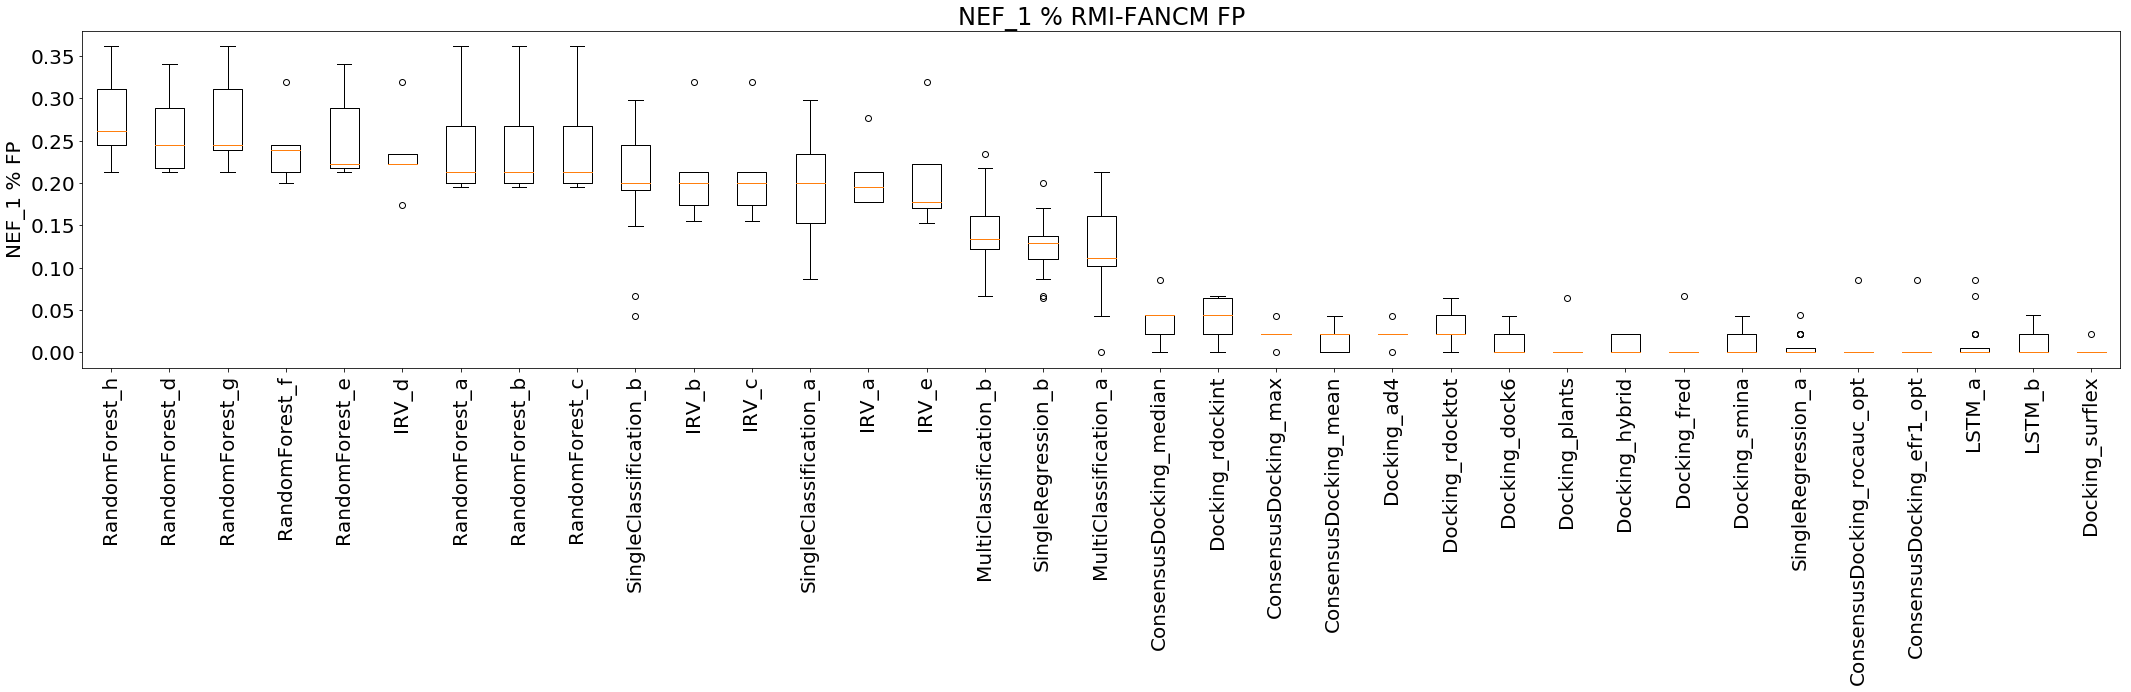

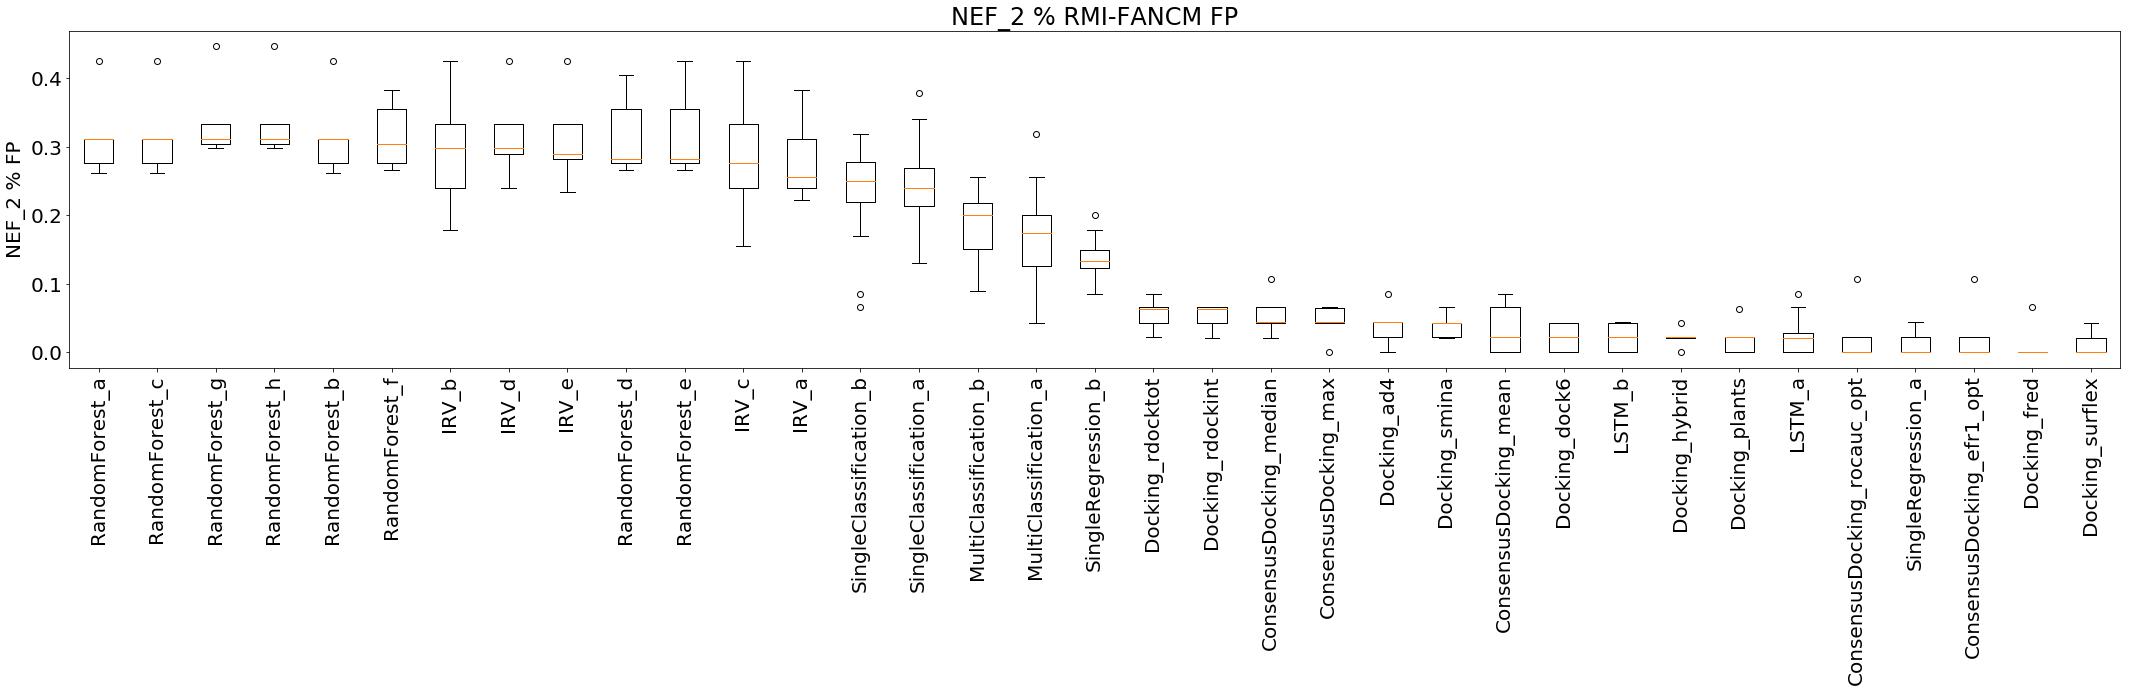

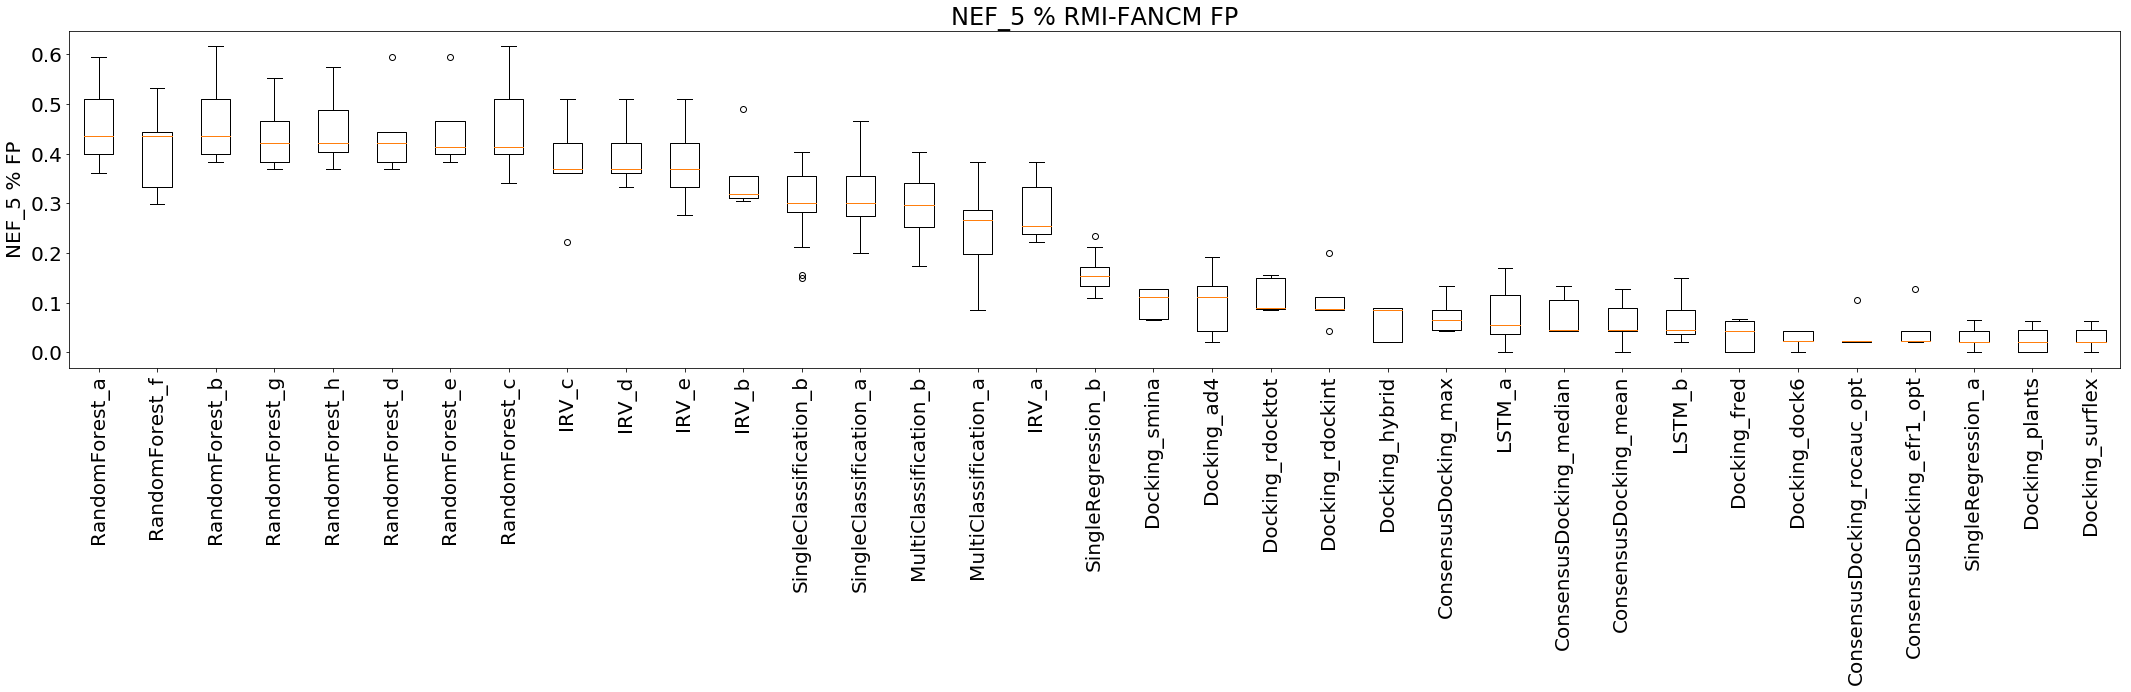

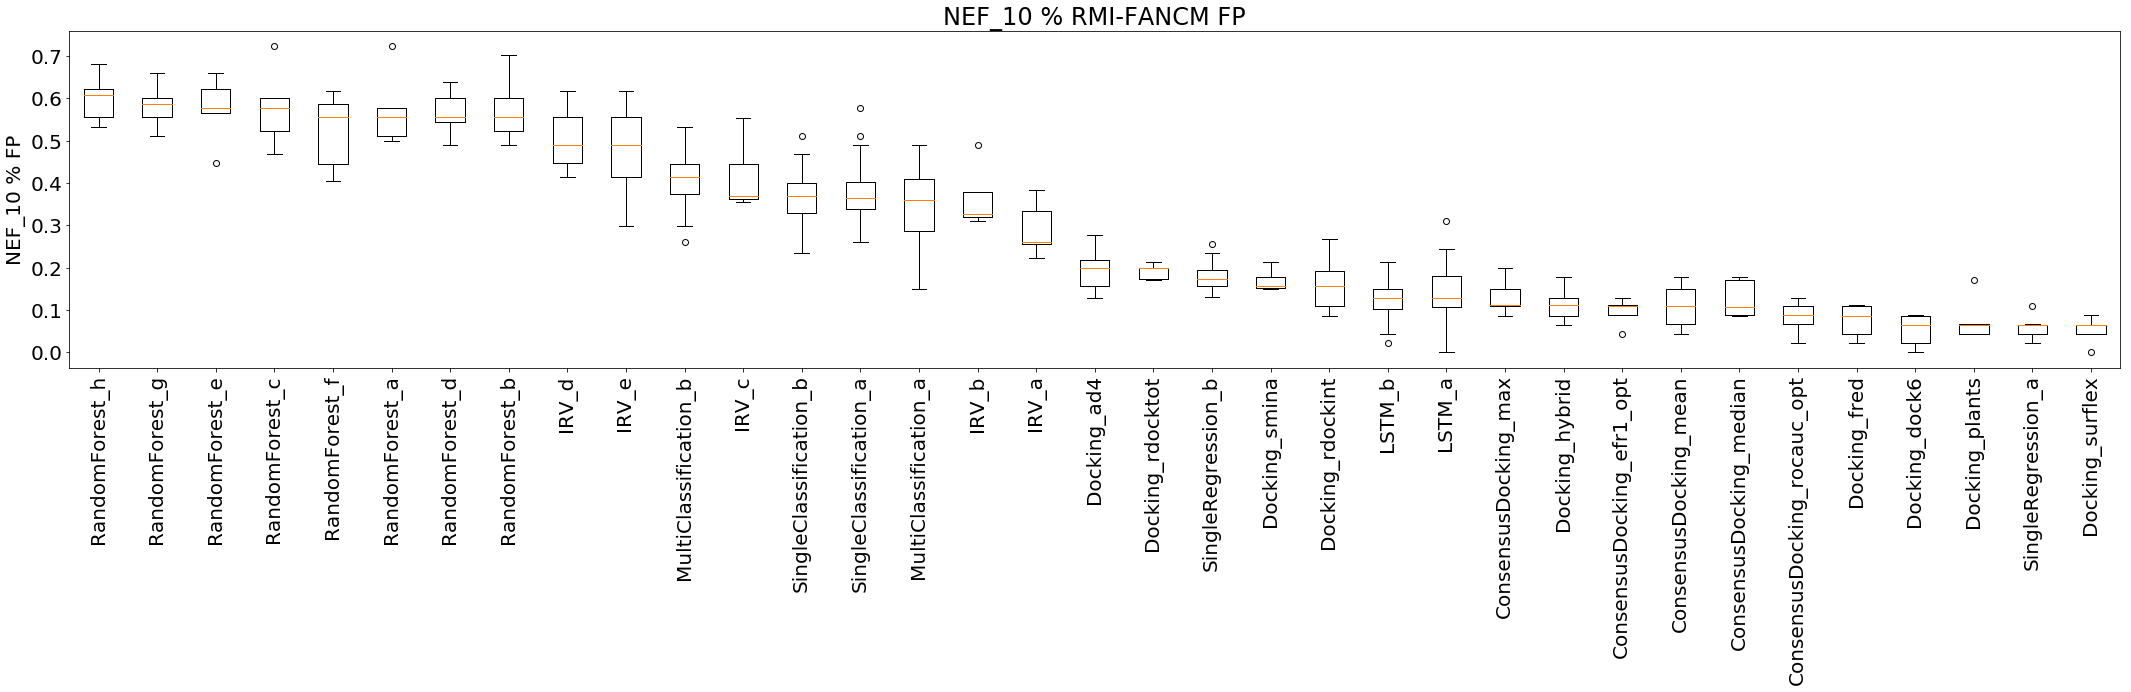

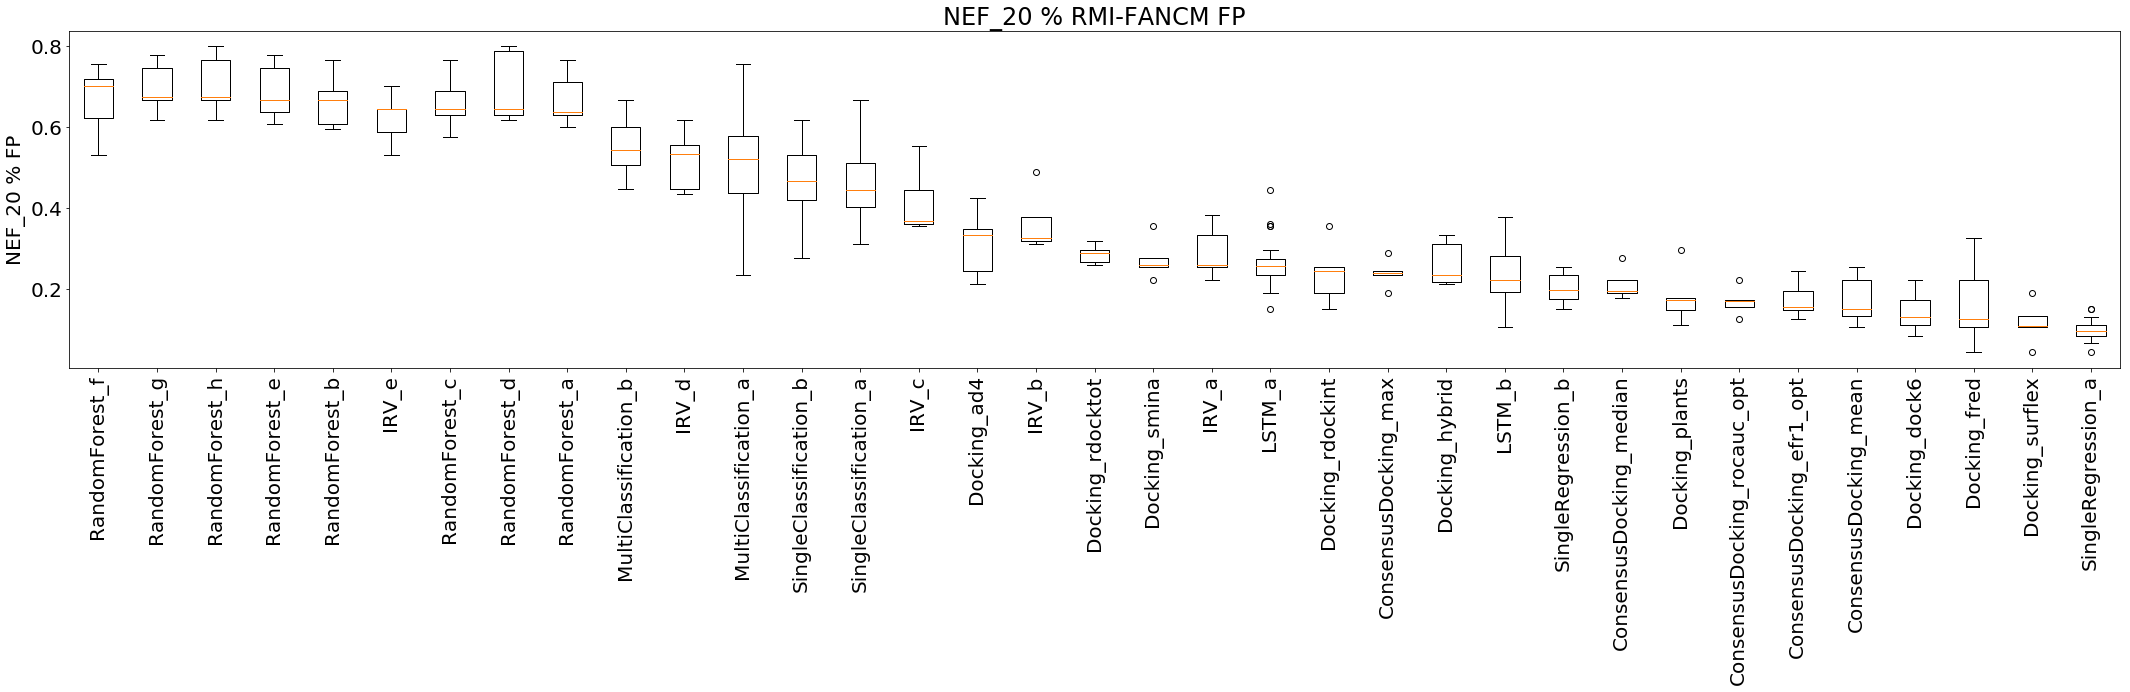

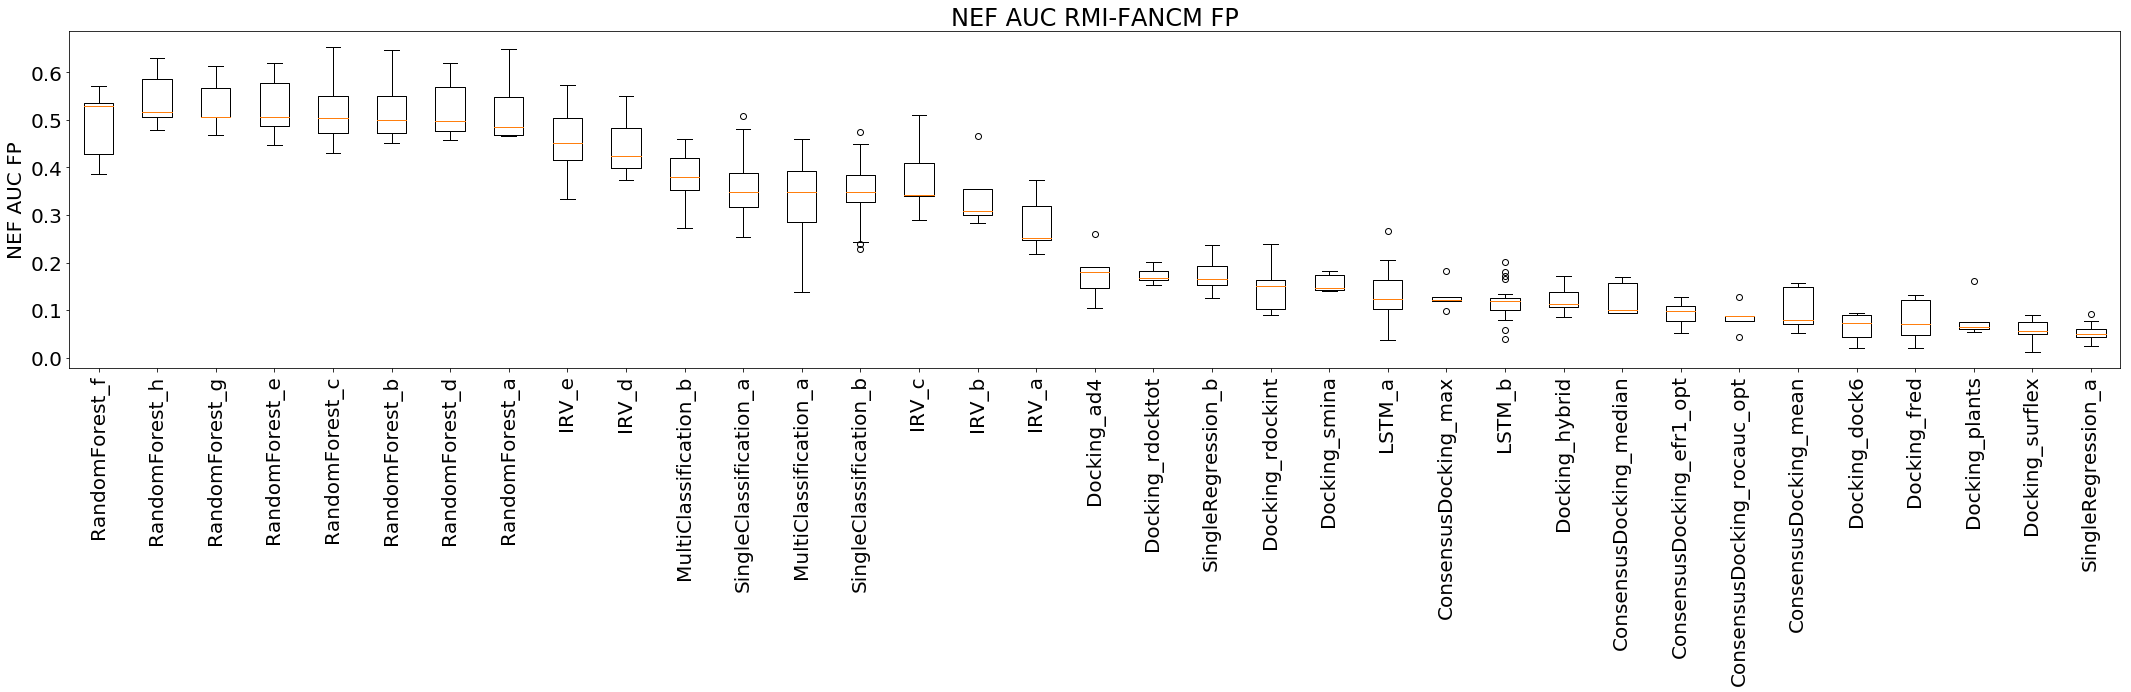

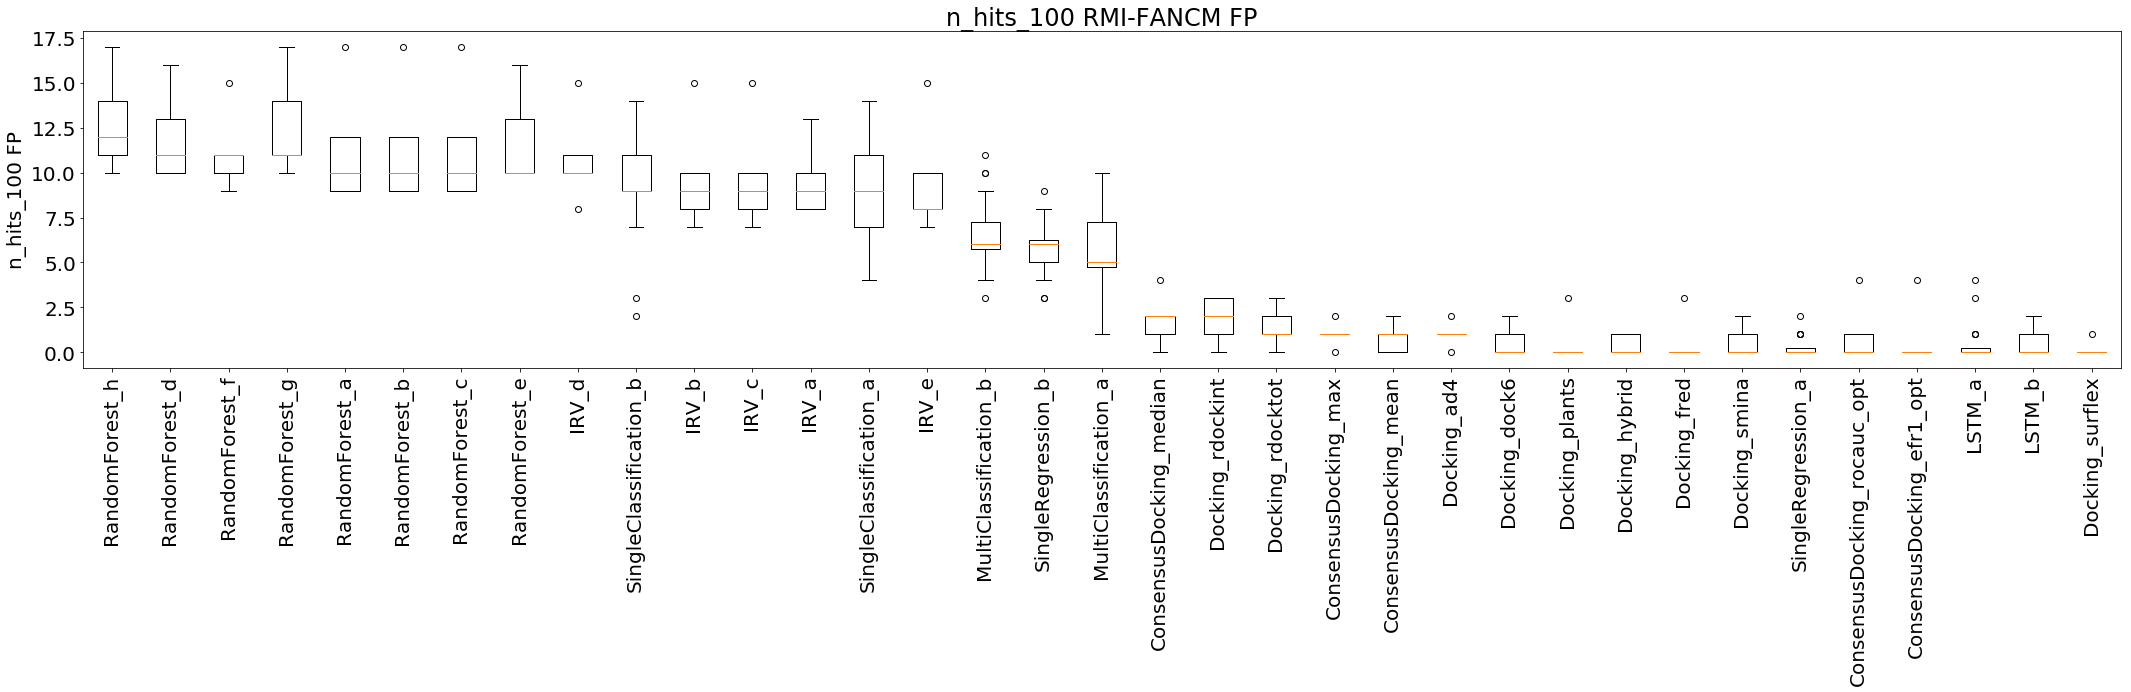

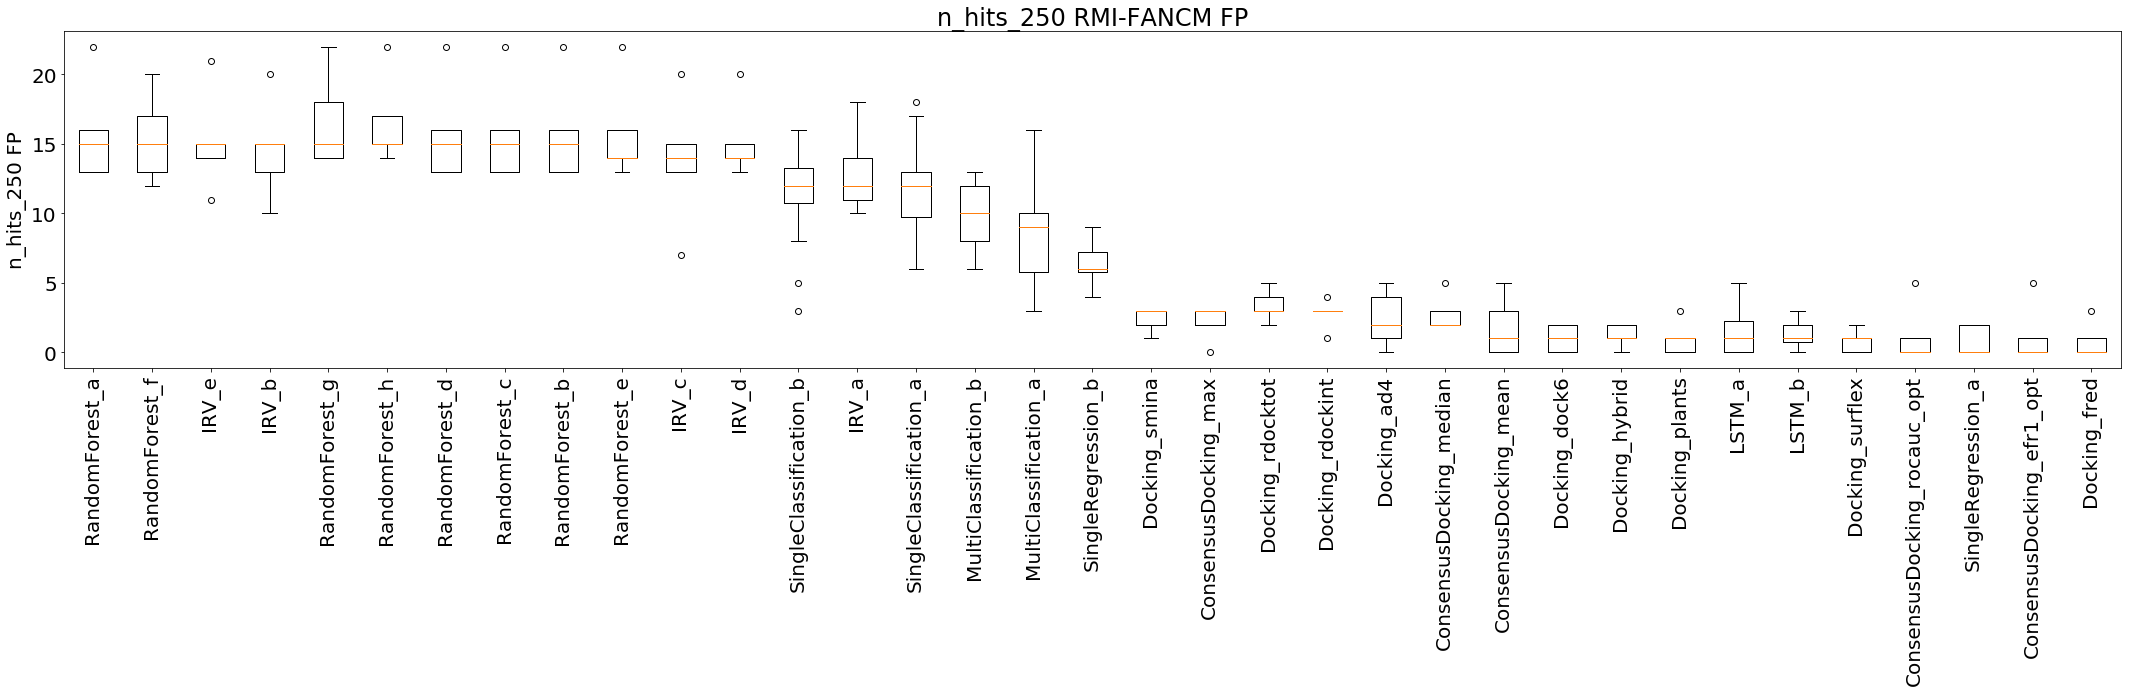

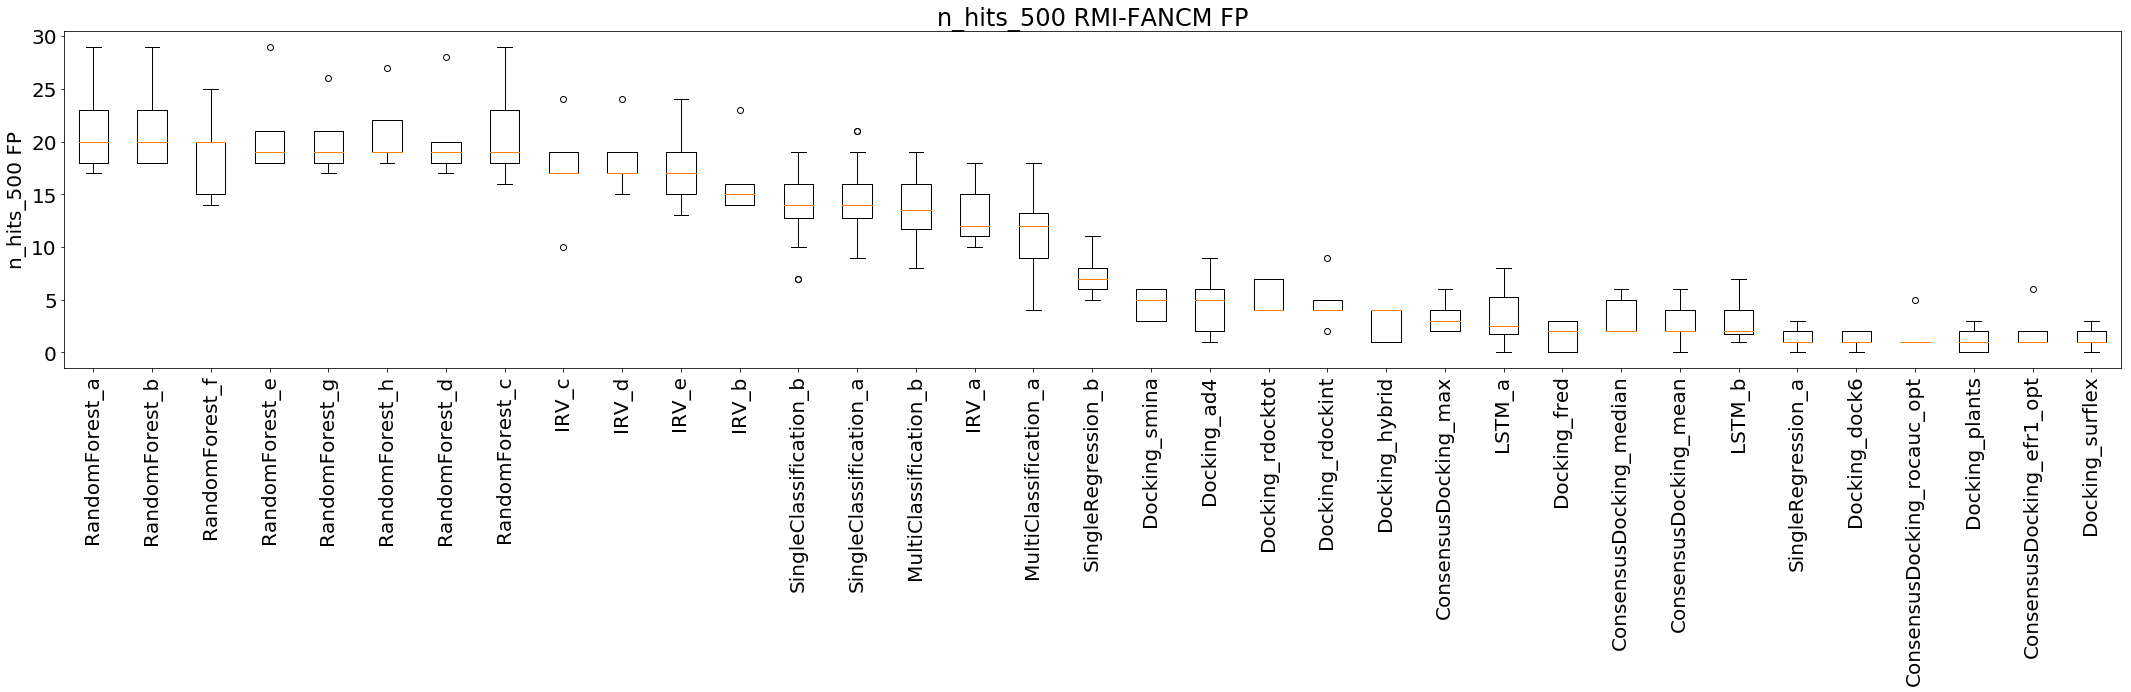

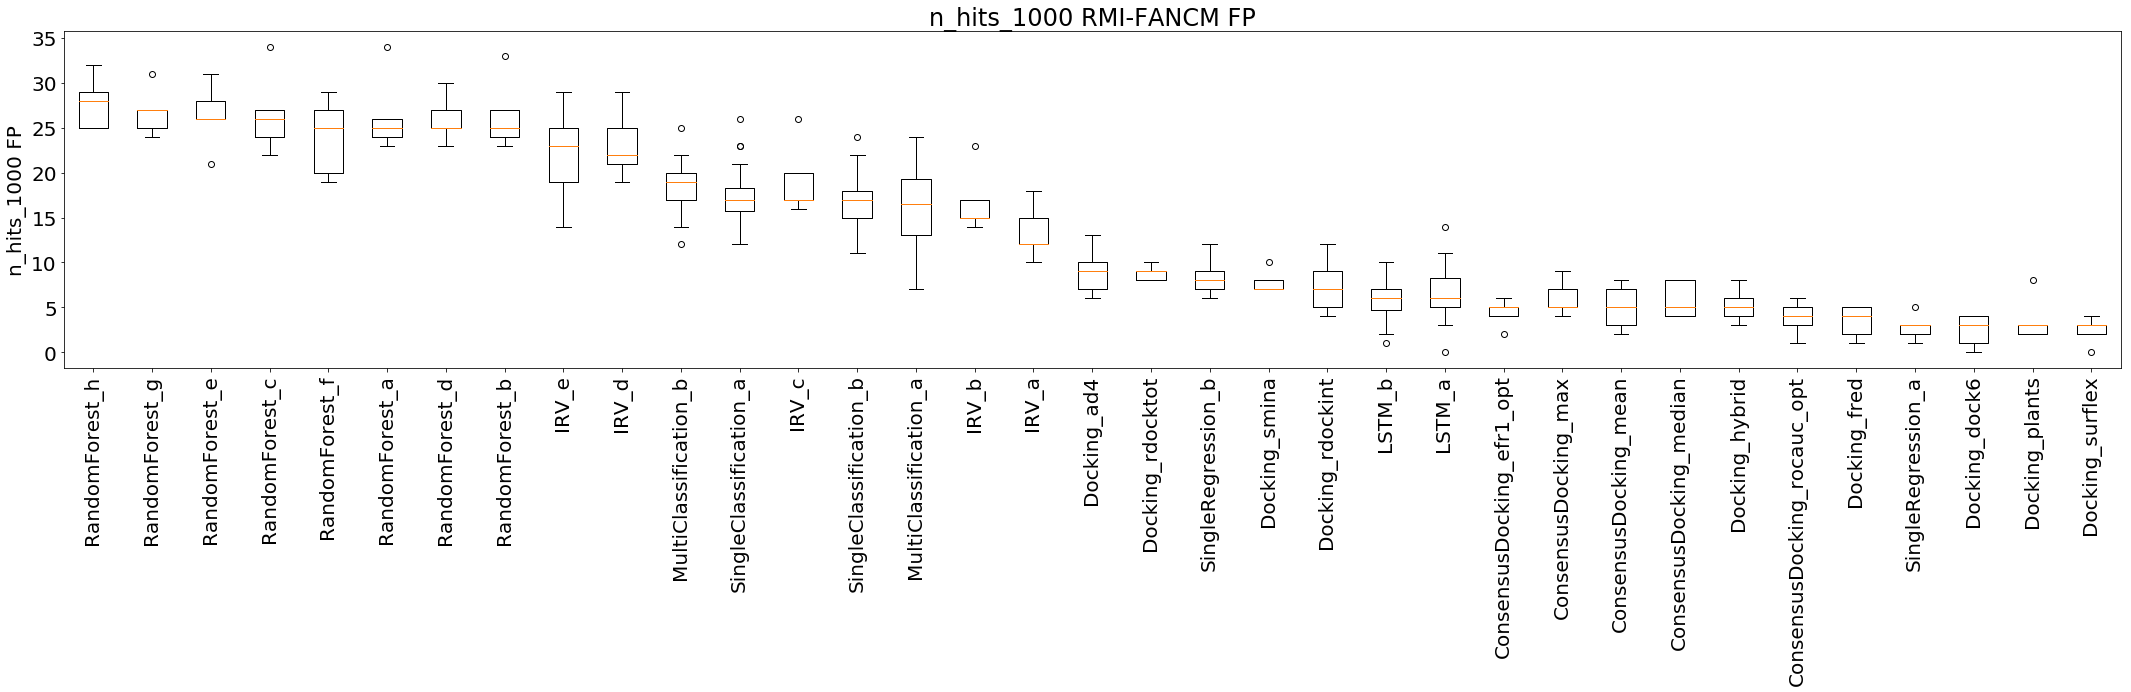

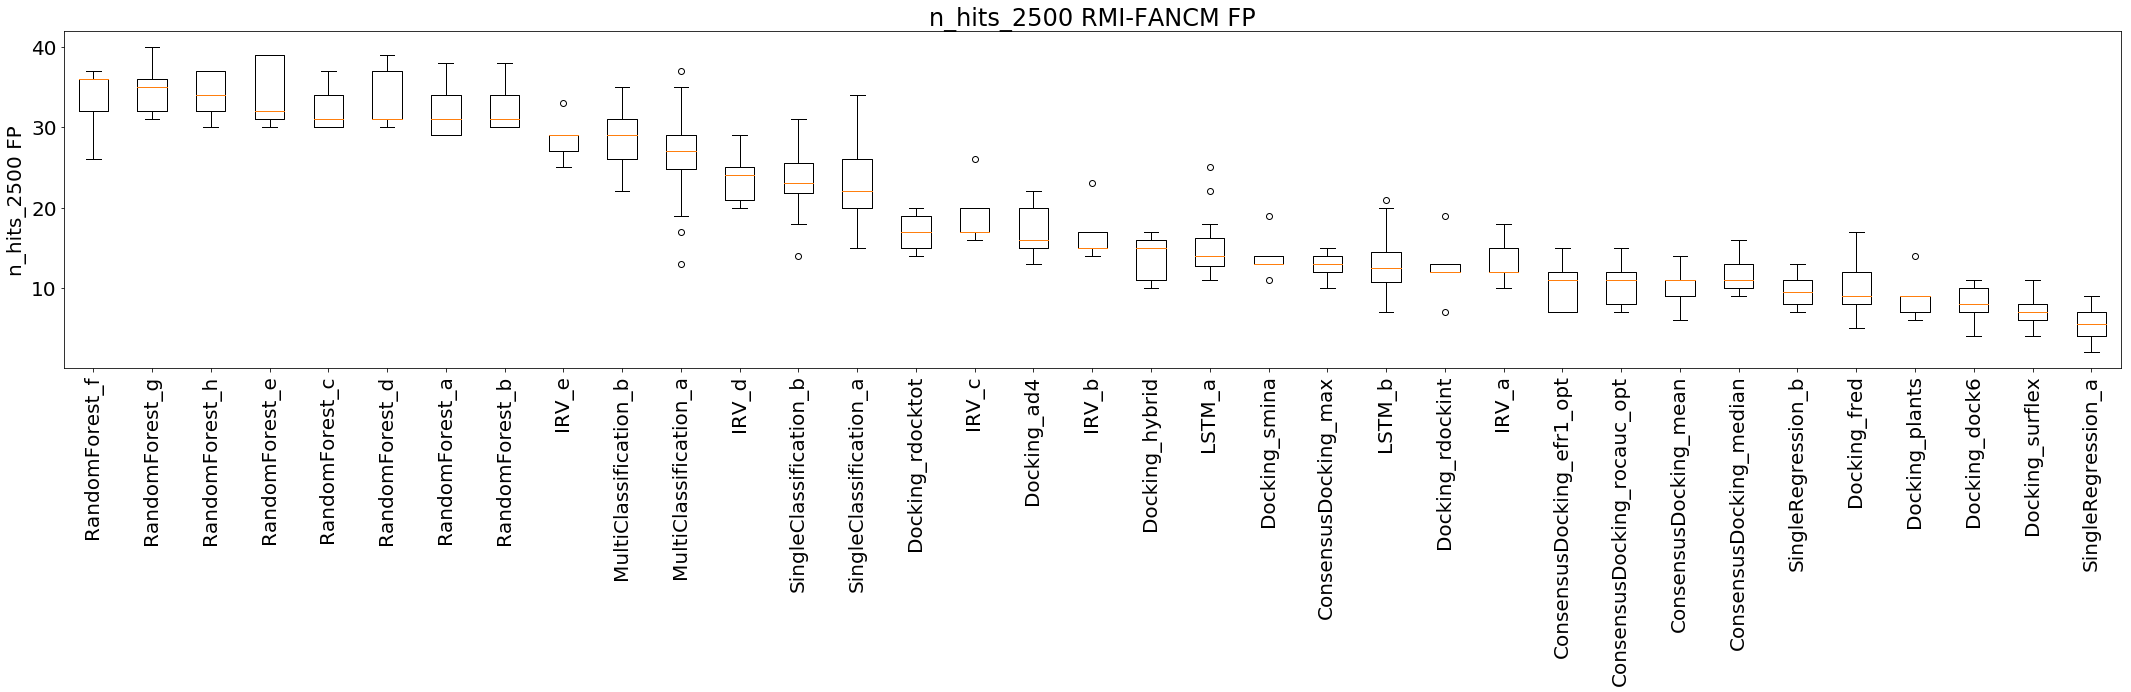

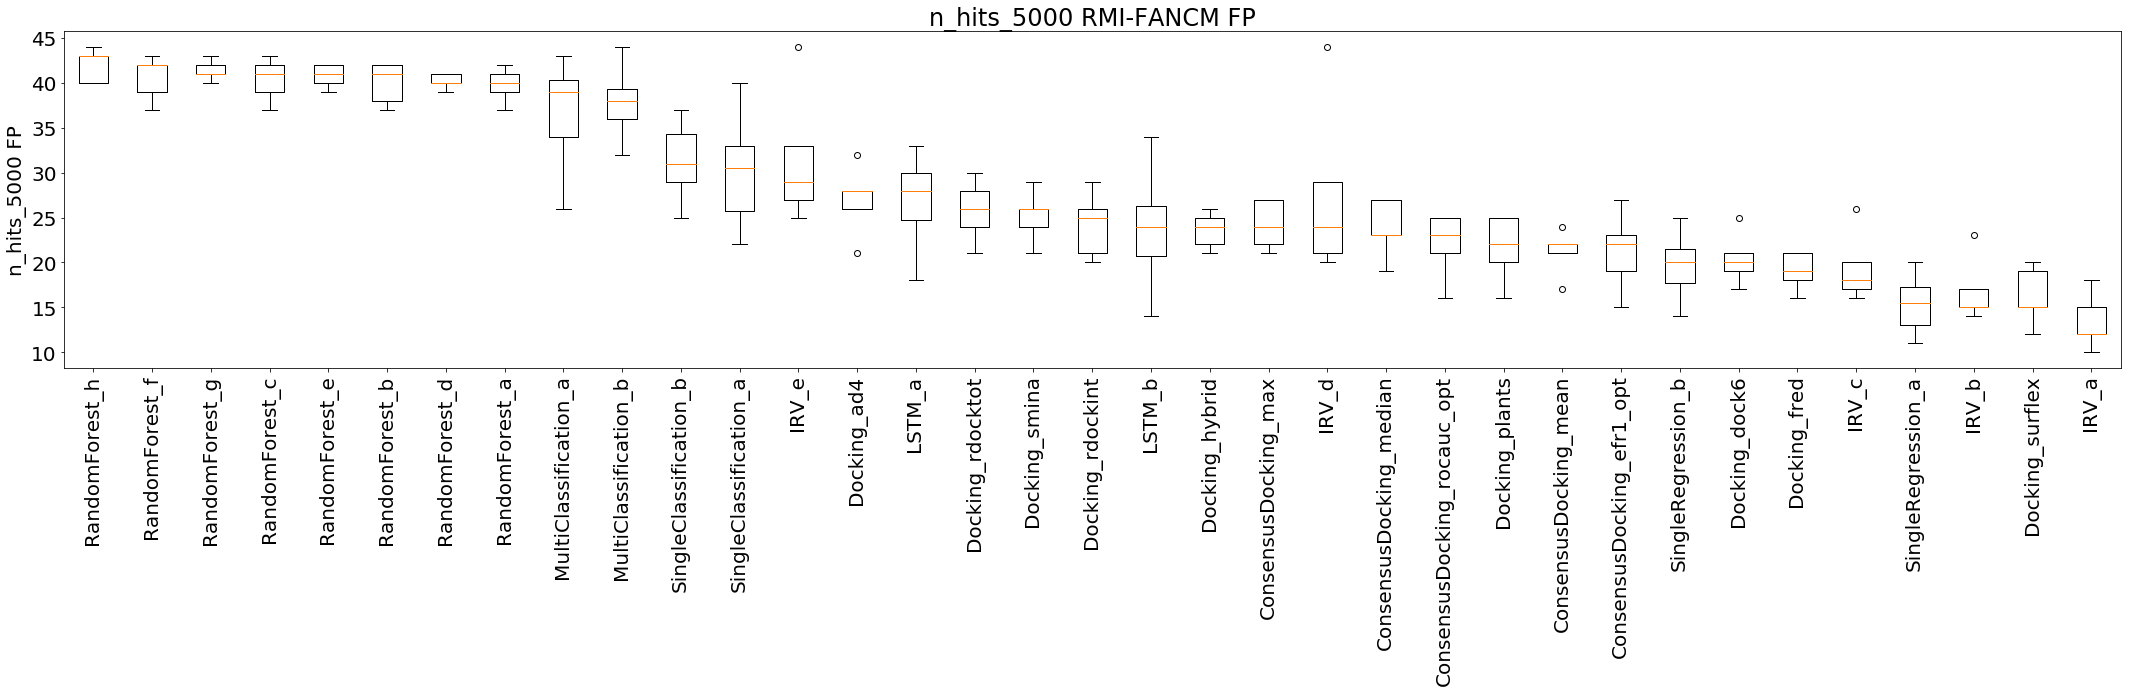

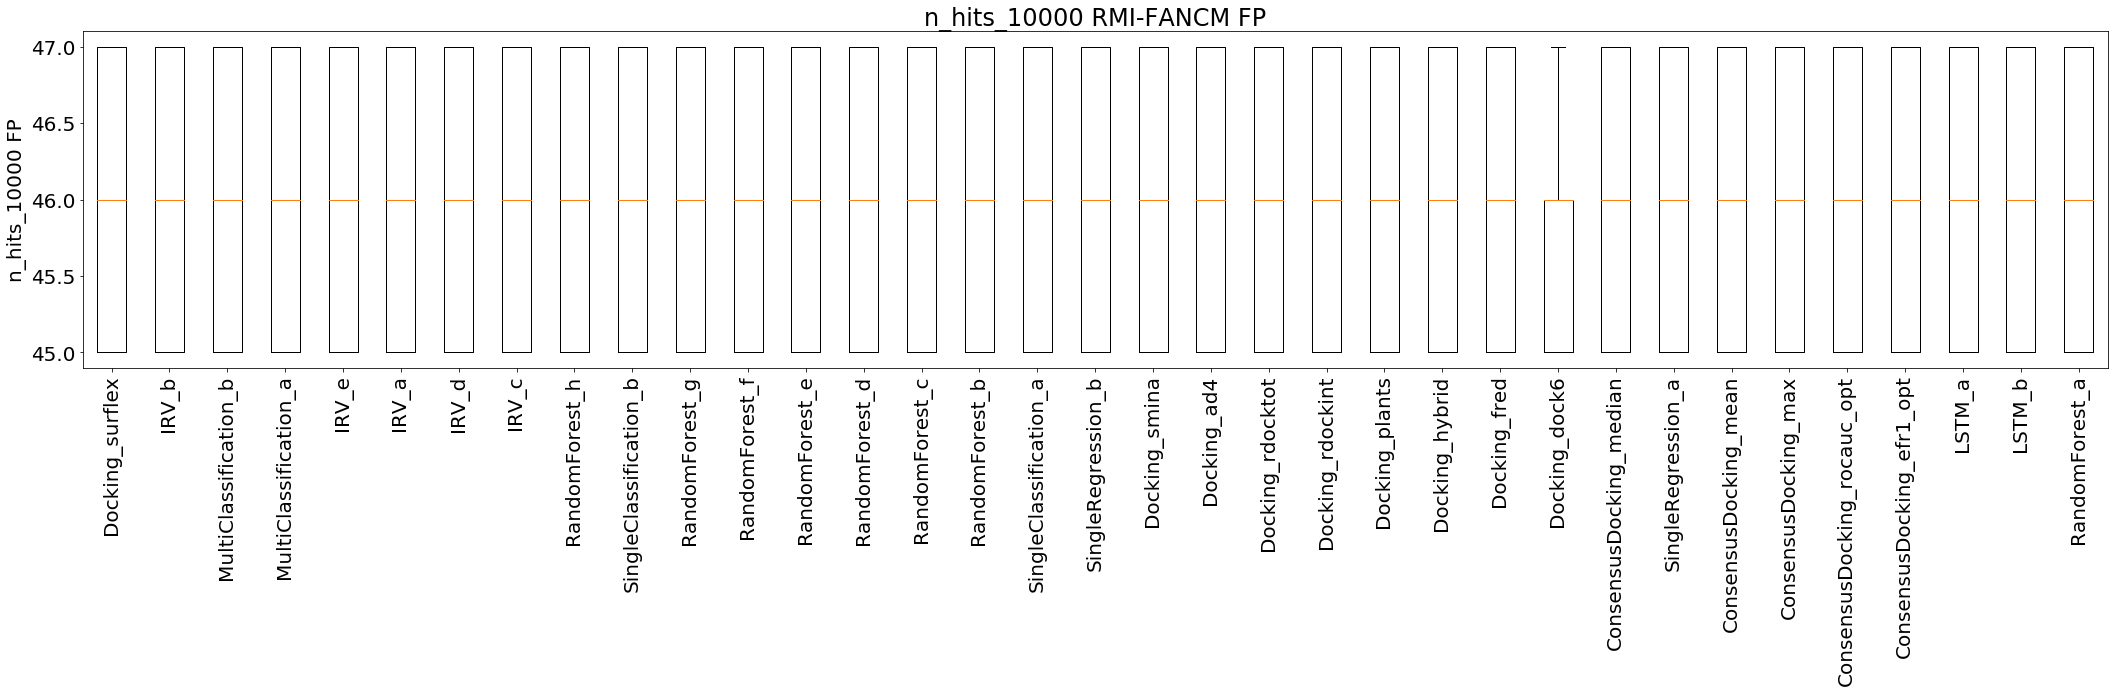

In [11]:
matplotlib.rcParams.update({'font.size': 20})
save_dir = './cv_ps_figures/cv_boxplots/'
labels=['PriA-SSB AS','PriA-SSB FP','RMI-FANCM']
plot_metrics_bp(gather_df, metric_names, labels, save_dir)

---
### DTK + Means Tables

In [12]:
agg_comp_dict_dtk_means = get_agg_comp(mm_comp_dicts, dtk_analysis_dict, mean_w=1, median_w=0, tukey_w=1)
ordered_df = get_model_ordering(agg_comp_dict_dtk_means, metric_names)
ordered_df

ROC AUC PriA-SSB AS                ROC AUC PriA-SSB FP               ROC AUC RMI-FANCM FP             BEDROC AUC PriA-SSB AS             BEDROC AUC PriA-SSB FP            BEDROC AUC RMI-FANCM FP        PR auc.integral PriA-SSB AS        PR auc.integral PriA-SSB FP       PR auc.integral RMI-FANCM FP              NEF_0.1 % PriA-SSB AS             NEF_0.1 % PriA-SSB FP             NEF_0.1 % RMI-FANCM FP             NEF_0.15 % PriA-SSB AS             NEF_0.15 % PriA-SSB FP            NEF_0.15 % RMI-FANCM FP              NEF_0.5 % PriA-SSB AS              NEF_0.5 % PriA-SSB FP             NEF_0.5 % RMI-FANCM FP                NEF_1 % PriA-SSB AS                NEF_1 % PriA-SSB FP               NEF_1 % RMI-FANCM FP                NEF_2 % PriA-SSB AS                NEF_2 % PriA-SSB FP               NEF_2 % RMI-FANCM FP                NEF_5 % PriA-SSB AS                NEF_5 % PriA-SSB FP               NEF_5 % RMI-FANCM FP               NEF_10 % PriA-SSB AS  \
0                 RandomForest_d, 1.0            SingleRegression_a, 1.0                RandomForest_h, 1.0                RandomForest_h, 1.0            SingleRegression_b, 1.0                RandomForest_h, 1.0        SingleClassification_b, 1.0            SingleRegression_b, 1.0        SingleClassification_b, 1.0                RandomForest_g, 1.0           SingleRegression_a, 1.0                         IRV_a, 1.0                RandomForest_h, 1.0                         IRV_c, 1.0                         IRV_a, 1.0                RandomForest_h, 1.0            SingleRegression_b, 1.0                RandomForest_h, 1.0                RandomForest_h, 1.0            SingleRegression_b, 1.0                RandomForest_h, 1.0                RandomForest_h, 1.0            SingleRegression_a, 1.0                RandomForest_h, 1.0                RandomForest_h, 1.0            SingleRegression_a, 1.0                RandomForest_b, 1.0                RandomForest_h, 1.0   
1                 RandomForest_e, 2.0            SingleRegression_b, 2.0                RandomForest_g, 2.0                RandomForest_g, 2.0            SingleRegression_a, 2.0                RandomForest_g, 2.0        SingleClassification_a, 2.0            SingleRegression_a, 2.0        SingleClassification_a, 2.0                RandomForest_h, 2.0                        IRV_b, 1.0                RandomForest_e, 2.0                RandomForest_b, 2.0                         IRV_d, 2.0                RandomForest_c, 2.0                RandomForest_g, 2.0                RandomForest_d, 2.0                RandomForest_g, 1.0                RandomForest_g, 2.0            SingleRegression_a, 2.0                RandomForest_g, 2.0                RandomForest_g, 2.0                         IRV_e, 1.0                RandomForest_g, 2.0                RandomForest_g, 1.0            SingleRegression_b, 2.0                RandomForest_h, 1.0                RandomForest_d, 1.0   
2                 RandomForest_h, 3.0                RandomForest_h, 3.0                RandomForest_e, 3.0                RandomForest_d, 3.0                RandomForest_g, 3.0                RandomForest_e, 3.0         MultiClassification_a, 3.0                RandomForest_g, 3.0                RandomForest_h, 2.0                RandomForest_a, 2.0       SingleClassification_b, 3.0                RandomForest_d, 2.0                RandomForest_c, 2.0                RandomForest_h, 2.0                RandomForest_a, 2.0                RandomForest_a, 3.0                RandomForest_h, 2.0                RandomForest_c, 3.0                RandomForest_d, 3.0                         IRV_e, 3.0                RandomForest_d, 3.0                RandomForest_d, 3.0            SingleRegression_b, 3.0                RandomForest_f, 3.0                RandomForest_e, 3.0                RandomForest_g, 3.0                RandomForest_a, 3.0                RandomForest_g, 3.0   
3                 RandomForest_g, 4.0                RandomForest_e, 4.0      